In [1]:
import keras
import pandas as pd
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from keras.callbacks import ModelCheckpoint, EarlyStopping
# %reload_ext mermaid
# import IPython
# IPython.load_ipython_extensions(["nb-mermaid/nb-mermaid"]);

Using TensorFlow backend.


In [2]:
import tensorflow  as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dropout,UpSampling2D, Dense, MaxPooling2D, BatchNormalization, Input, Flatten, Lambda
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import Adadelta, SGD, Adam
from keras.utils import to_categorical
import keras.backend as K

In [3]:
tf_config = tf.ConfigProto(allow_soft_placement=False)
tf_config.gpu_options.allow_growth = True
s = tf.Session(config=tf_config)
K.set_session(s)

In [4]:
csv_data = pd.read_csv('15features.csv')
display(csv_data.head()), display(csv_data.shape)
train_path = 'unseen-dataset/TrainingSet/'
train_images = os.listdir(train_path)

val_path = 'unseen-dataset/ValidationSet/'
val_images = os.listdir(val_path)
len(train_images)+len(val_images)

imagename  pen_pressure  letter_spacing  size  dimension  \
0  0968c_num1.png             2               2     2          1   
1  0809c_num2.png             2               2     2          2   
2  0237b_num6.png             2               2     2          2   
3  0069b_num2.png             2               2     2          1   
4  0966c_num4.png             2               2     2          2   

   is_lowercase  is_continuous  slantness  tilt  entry_stroke_a  staff_of_a  \
0             2              2          3     2               1           2   
1             2              2          3     1               1           2   
2             2              2          2     2               1           2   
3             2              2          1     1               1           1   
4             2              2          2     1               1           2   

   formation_n  staff_of_d  exit_stroke_d  word_formation  constancy  
0            2           3              2               2          1  
1            2           3              1               2          2  
2            2           2              2               2          2  
3            1           1              1               1          1  
4            2           2              2               2          2

(13570, 16)

13794

In [5]:
# len(list(set(list(x[:4] for x in images['image'])))), len(list(set(list(x[:4] for x in csv_data['ImageId']))))

In [6]:
dataset_columns = csv_data.columns
csv_data['imagename'] = csv_data['imagename'].astype('str')
display(csv_data.head(20))
csv_data.shape

imagename  pen_pressure  letter_spacing  size  dimension  \
0   0968c_num1.png             2               2     2          1   
1   0809c_num2.png             2               2     2          2   
2   0237b_num6.png             2               2     2          2   
3   0069b_num2.png             2               2     2          1   
4   0966c_num4.png             2               2     2          2   
5   1316a_num2.png             2               2     1          1   
6   1503c_num2.png             2               1     2          2   
7   0113c_num1.png             2               3     2          2   
8   0221a_num6.png             2               2     2          2   
9   0068a_num4.png             1               1     2          2   
10  1094b_num1.png             2               3     1          1   
11  0337c_num6.png             2               2     2          2   
12  0837a_num4.png             2               2     2          2   
13  0941b_num3.png             2               2     2          2   
14  0260a_num3.png             2               2     2          2   
15  0598c_num4.png             1               3     2          2   
16  0380a_num2.png             2               2     2          2   
17  0384b_num2.png             2               2     2          2   
18  1224a_num3.png             2               2     2          2   
19  1131b_num3.png             2               2     2          2   

    is_lowercase  is_continuous  slantness  tilt  entry_stroke_a  staff_of_a  \
0              2              2          3     2               1           2   
1              2              2          3     1               1           2   
2              2              2          2     2               1           2   
3              2              2          1     1               1           1   
4              2              2          2     1               1           2   
5              2              2          3     1               1           2   
6              2              2          2     1               1           3   
7              2              1          2     1               1           1   
8              2              1          1     1               1           4   
9              2              2          1     1               1           2   
10             2              2          2     1               1           1   
11             2              2          3     1               1           2   
12             2              2          1     1               1           3   
13             2              2          2     1               1           1   
14             2              2          2     1               1           2   
15             1              1          2     1               1           1   
16             2              2          4     1               1           2   
17             2              2          2     1               1           2   
18             2              2          1     1               1           4   
19             2              2          1     1               1           2   

    formation_n  staff_of_d  exit_stroke_d  word_formation  constancy  
0             2           3              2               2          1  
1             2           3              1               2          2  
2             2           2              2               2          2  
3             1           1              1               1          1  
4             2           2              2               2          2  
5             2           2              3               2          2  
6             2           2              3               2          2  
7             2           2              2               2          2  
8             1           2              3               1          2  
9             2           2              2               2          2  
10            1           3              2               1          1  
11            

(13570, 16)

In [7]:
# train_csv_data =  csv_data[:700]
# val_csv_data =  csv_data[700:]
# train_csv_data.shape, val_csv_data.shape

In [8]:
f = []
for col in dataset_columns[1:]:
    f.append(csv_data[col].unique().shape[0])
f,len(f)

([2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2], 15)

In [9]:

# model = Sequential()
input_layer = Input((64,64,1))
model = BatchNormalization()(input_layer)

model = Conv2D(activation='relu',filters=16, kernel_size=(32,32), padding='same')(model)
# model = Conv2D(activation='relu',filters=256, kernel_size=(8,8), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=32, kernel_size=(16,16), padding='same')(model)
# model = Conv2D(activation='relu',filters=64, kernel_size=(32,32), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=64, kernel_size=(8,8), padding='same')(model)
# model = Conv2D(activation='relu',filters=256, kernel_size=(16,16), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=128, kernel_size=(4,4), padding='same')(model)
# model = Conv2D(activation='relu',filters=256, kernel_size=(8,8), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=256, kernel_size=(2,2), padding='same')(model)
# model = Conv2D(activation='relu',filters=256, kernel_size=(8,8), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=512, kernel_size=(1,1), padding='same')(model)
# model = Conv2D(activation='relu',filters=256, kernel_size=(8,8), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)


# model = Flatten()(model)

dense_layer = Dense(512, activation='relu')(model)
dense_layer = Dropout(0.5)(dense_layer)
out_dense_layer=[]
for i in range(1,len(f)+1):
    out_dense_layer.append(Dense(f[i-1] , activation='softmax', name = 'out_feature_'+str(i))(Dense(128 , activation='relu', name = 'dense_layer_'+str(i))(Flatten(name='flatten_'+str(i))((dense_layer)))))

human_features = Model(inputs=[input_layer], outputs=out_dense_layer)
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   16400       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 

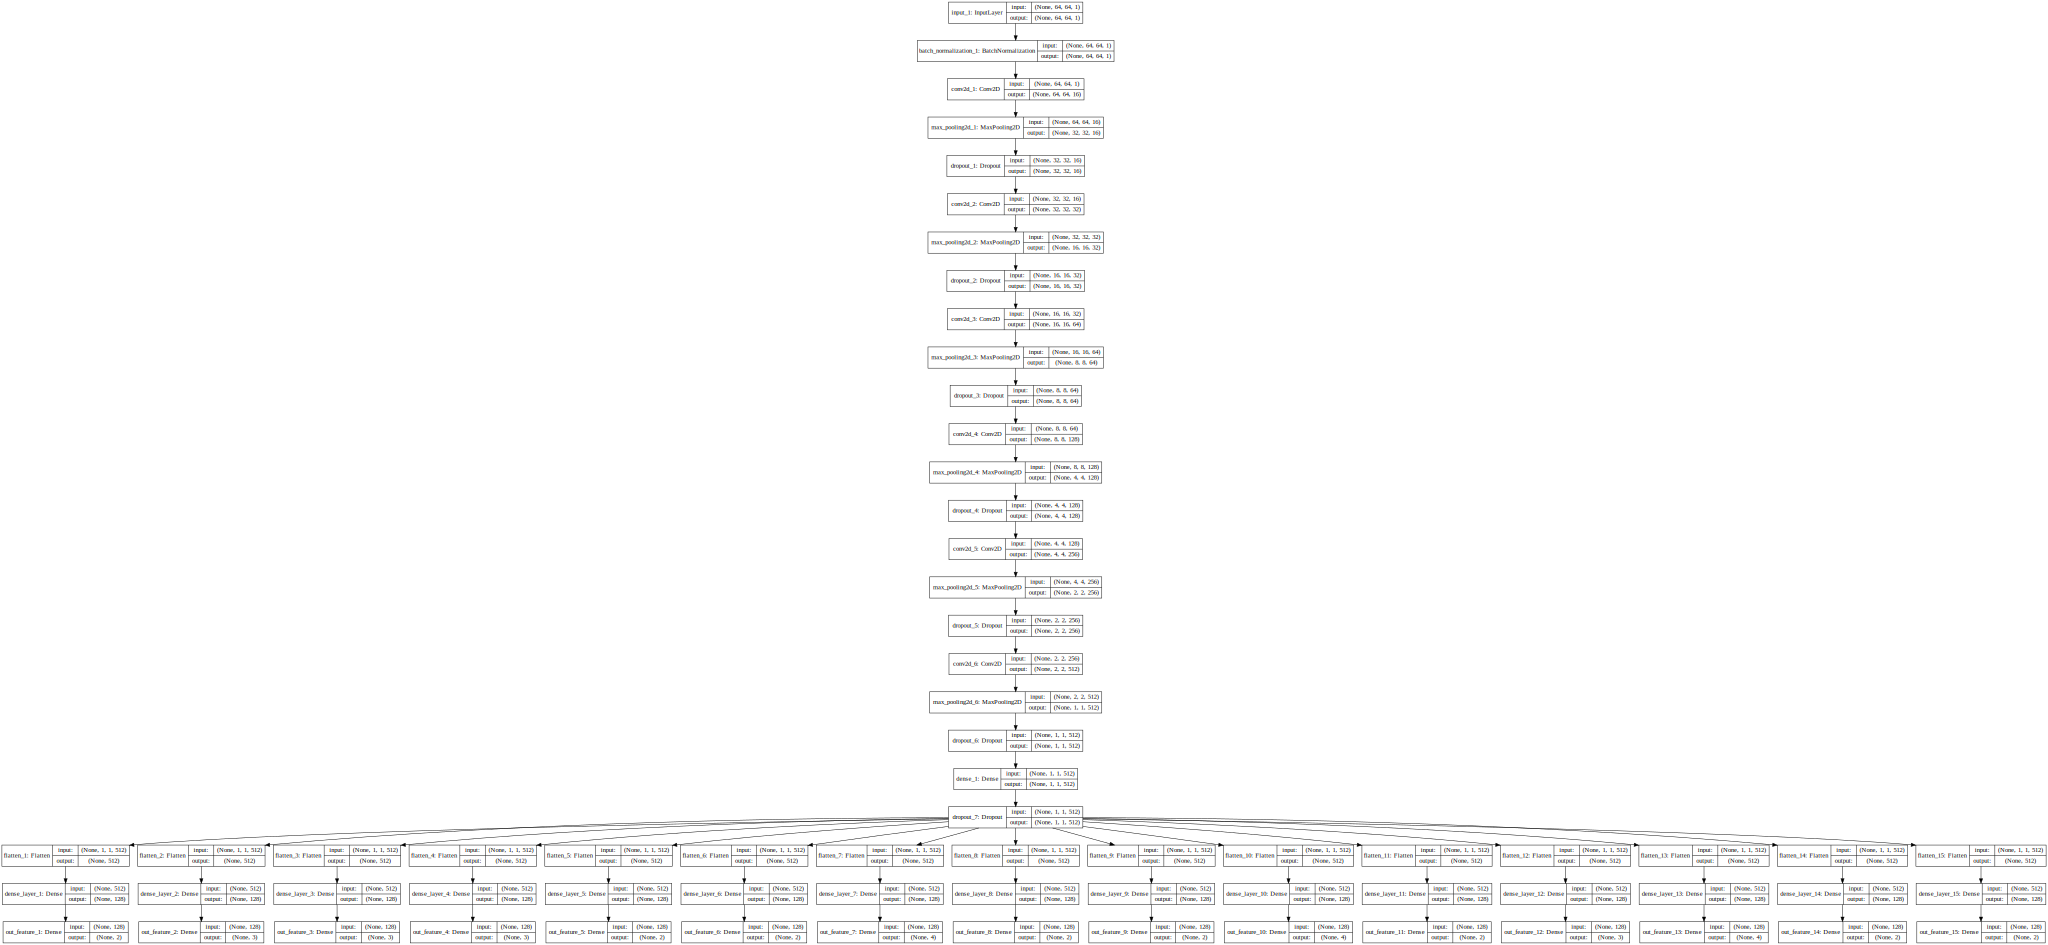

In [10]:
SVG(model_to_dot(human_features, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
feature_lengths = {}
for col in dataset_columns[1:]:
    feature_lengths[col] = len(csv_data[col].unique())
feature_lengths = list(feature_lengths.values())
feature_lengths

[2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2]

In [12]:
# df_data[df_data['f8']==2]

In [13]:
# im = images[images['image'].str.match('1229b')]
# im.iloc[0]['image']

In [14]:

# stop_at = 20
# identitycounter = 1
# unique_writers = list(set(list(x[:4] for x in df_data['ImageId'])))
# for writer in unique_writers:
#     print(identitycounter*100/stop_at, end='\r')
#     writer_samples = list(images[images['image'].str.match(writer)]['image'])
# #     print('lne',len(writer_samples))
#     f,ax = plt.subplots(1,len(writer_samples))
#     f.subplots_adjust(hspace = .5, wspace=.15)
#     f.set_size_inches(15,15)
#     imgcounter = 0
#     for sample in writer_samples:
#         imagepath = os.path.join(image_path,sample)
#         raw_img = cv2.imread(imagepath)
#         if len(writer_samples)>1:
#             ax[imgcounter].imshow(raw_img)
#             ax[imgcounter].set_title(writer+'\n'+sample)
#         else:
#             ax.imshow(raw_img)
#             ax.set_title(writer+'\n'+sample)
# #         ax[imgcounter].axis('off')
#         imgcounter+=1
#         if imgcounter == stop_at:
#             break
#     imgcounter=0
#     identitycounter += 1
#     if identitycounter == stop_at+1:
#         break

In [15]:
# csv_data[csv_data['ImageId'].str.match('1302c')]

In [16]:

def datagen(batch_size,image_path,list_of_writers, vshift = (-64,64) ,vis=False):
    counter = 0
    w_ids,ids,x,y,imagenames, feature_list = [],[],[],[],[],[]
    while True:
#         counter = 0
        # for writer in unique_writers:
        #     print(identitycounter*100/stop_at, end='\r')
        
        writer_index = np.random.randint(0,len(list_of_writers))
        
#         for writer_index in writer_indexes:
#             class_vectors = []
#             features = None
        imagename = list_of_writers[writer_index]
#             print('-->',csv_data['imagename'][0],imagename)
#             display(csv_data[csv_data['imagename']==imagename].values[0][1:])
        features = csv_data[csv_data['imagename']==imagename].values
        if len(features)==0:
#             print('no features', imagename)
            continue
        features = features[0][1:]-1
#             print(features)
#             print(writer)
#             writer_samples = list(images[images['image'].str.match(writer)]['image'])
#             print('writer:',writer,', writer_samples:',writer_samples)
#             if len(writer_samples) == 0:
#                 continue
#             writer_sample_index = np.random.randint(0,len(writer_samples))

#             #     unique_writers_count[writer] = len(writer_samples)
# #             print('writer_sample_index:',writer_sample_index)
#             csv_writer = writer_samples[writer_sample_index][:5]


        loaded_image = cv2.imread(os.path.join(image_path,imagename),0)
        rand = np.random.randint(vshift[0],vshift[1])
        loaded_image_shifted=np.roll(axis=0,a=loaded_image,shift=rand)

        x.append(255.0-loaded_image_shifted.reshape((64,64,1)))
        y.append(255.0-loaded_image.reshape((64,64,1)))
        w_ids.append(imagename[:4])
        imagenames.append(imagename)
        ids.append(writer_index)
        feature_list.append(features)
#         print(imagename)
        counter+=1
#         print('counter:', counter, end='\r')
        if counter == batch_size:
            counter=0
            feature_list = np.array(feature_list)
            feature_list = feature_list.transpose()
            out_cat_features = []
            for i in range(len(feature_list)):
#                 print(feature_list[1])
                out_cat_features.append(to_categorical(feature_list[i],num_classes=feature_lengths[i]))
            if vis== True:
                yield np.array(x)/255.0,[np.array(w_ids),np.array(imagenames)]
            else:
                yield np.array(x)/255.0,out_cat_features
            w_ids,ids,x,y,imagenames,feature_list =[], [],[], [],[],[]    

In [17]:

batch_size = 64

tg = datagen(batch_size,image_path=train_path,vshift=(-10,10),list_of_writers=train_images)
vg = datagen(batch_size,image_path=val_path,vshift=(-10,10), list_of_writers=val_images)


In [18]:
# images
inputs,o = next(tg)
print(inputs.shape)
for op in o:
    print((np.argmax(op, axis=1)+1)[0])
#     print('------')
# feature_list

(64, 64, 64, 1)
2
2
2
2
2
2
1
1
1
2
1
3
4
1
1


In [19]:
csv_data[csv_data['imagename']=='0066c_num3.png'].values[0][1:]

array([2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1], dtype=object)

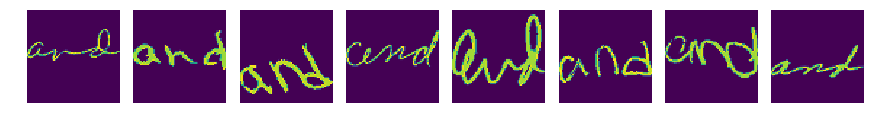

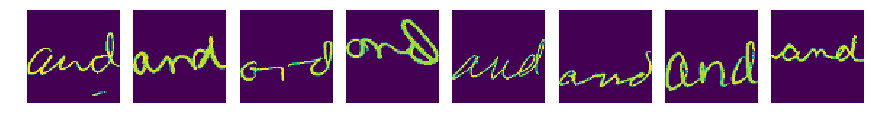

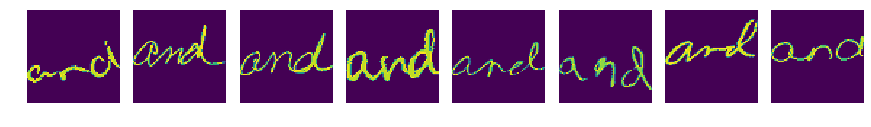

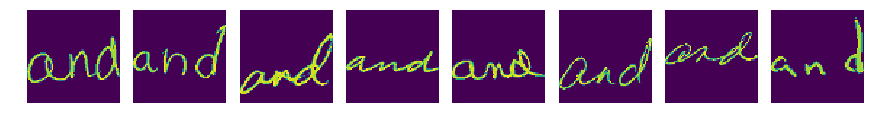

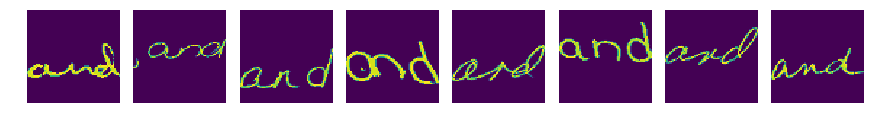

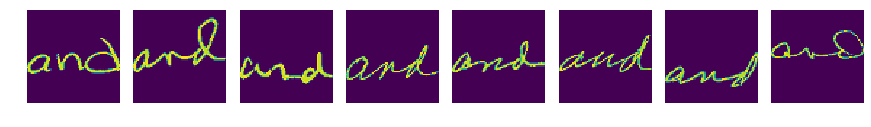

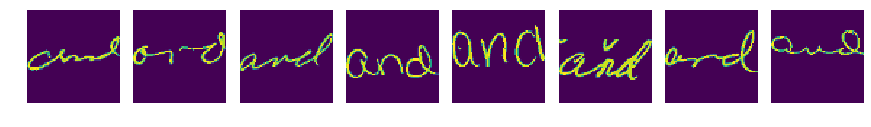

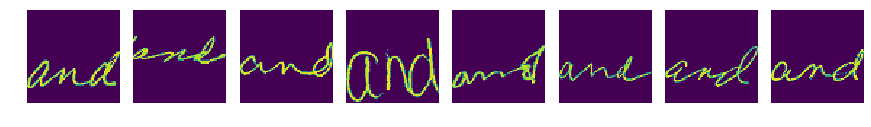

In [20]:
for r in range(8):
    f,ax = plt.subplots(1,8)
    f.subplots_adjust(hspace = .00, wspace=.15)
    f.set_size_inches(15,5)
    for c in range (8):
        ax[c].imshow(inputs[c+r*8].reshape((64,64)))
        ax[c].axis('off')

In [21]:
losses = {}
lossWeights = {}
for i in range(1,16):
    losses["out_feature_"+str(i)] = "categorical_crossentropy"
    lossWeights["out_feature_"+str(i)] = 1.0
# lossWeights["out_feature_1"] = 10.0
# lossWeights["out_feature_2"] = 8.0
# lossWeights["out_feature_3"] = 0.1
# lossWeights["out_feature_4"] = 8.0
# lossWeights["out_feature_5"] = 1.0
# lossWeights["out_feature_6"] = 5.0
# lossWeights["out_feature_7"] = 5.0
# lossWeights["out_feature_8"] = 10.0


In [22]:
mc = ModelCheckpoint(filepath='weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5', monitor='val_loss',period=1,save_best_only=True,save_weights_only=True,mode='auto',verbose=3)
es = EarlyStopping(patience=10000, monitor='val_loss', min_delta=0.0005, mode='auto')

In [23]:
EPOCHS = 50000
INIT_LR = 0.0001
# opt = SGD(lr=INIT_LR, decay=1e-6, momentum=0.95, nesterov=True)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
opt = Adadelta(lr=INIT_LR, decay=1e-04)

# feat_extractor.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])


human_features.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   16400       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 

In [24]:
# human_features.load_weights('human_features_weights_v3.h5')
# inputs,o = next(vg)
# for i in range(64):
#     print(i)
#     f_probs = human_features.predict(np.expand_dims(inputs[i],0))
# #     print(f_probs)
#     for prob in f_probs:
#         print(np.argmax(prob),end=',')
#     print('++++++++++++')
# human_features.load_weights('15_human_features_weights_unseen_v1.h5')

In [25]:

hist = human_features.fit_generator(tg, callbacks=[mc,es]
                                    , epochs=EPOCHS
                                    , steps_per_epoch = 1
                                    , validation_data = vg
                                    , validation_steps = 1
                                    , verbose = 3
                                    
                                   )

Epoch 1/50000

Epoch 00001: val_loss improved from inf to 14.04938, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 2/50000

Epoch 00002: val_loss improved from 14.04938 to 14.03864, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 3/50000

Epoch 00003: val_loss improved from 14.03864 to 14.02339, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 4/50000

Epoch 00004: val_loss did not improve from 14.02339
Epoch 5/50000

Epoch 00005: val_loss did not improve from 14.02339
Epoch 6/50000

Epoch 00006: val_loss improved from 14.02339 to 14.02070, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 7/50000

Epoch 00007: val_loss did not improve from 14.02070
Epoch 8/50000

Epoch 00008: val_loss did not improve from 14.02070
Epoch 9/50000

Epoch 00009: val_loss did not improve from 14.02070
Epoch 10/50000

Epoch 00010: val_loss did not improve from 14.02070
Epoch 11/5


Epoch 00111: val_loss did not improve from 13.99332
Epoch 112/50000

Epoch 00112: val_loss did not improve from 13.99332
Epoch 113/50000

Epoch 00113: val_loss did not improve from 13.99332
Epoch 114/50000

Epoch 00114: val_loss did not improve from 13.99332
Epoch 115/50000

Epoch 00115: val_loss did not improve from 13.99332
Epoch 116/50000

Epoch 00116: val_loss did not improve from 13.99332
Epoch 117/50000

Epoch 00117: val_loss did not improve from 13.99332
Epoch 118/50000

Epoch 00118: val_loss did not improve from 13.99332
Epoch 119/50000

Epoch 00119: val_loss did not improve from 13.99332
Epoch 120/50000

Epoch 00120: val_loss did not improve from 13.99332
Epoch 121/50000

Epoch 00121: val_loss did not improve from 13.99332
Epoch 122/50000

Epoch 00122: val_loss did not improve from 13.99332
Epoch 123/50000

Epoch 00123: val_loss did not improve from 13.99332
Epoch 124/50000

Epoch 00124: val_loss did not improve from 13.99332
Epoch 125/50000

Epoch 00125: val_loss did not imp


Epoch 00229: val_loss did not improve from 13.98922
Epoch 230/50000

Epoch 00230: val_loss did not improve from 13.98922
Epoch 231/50000

Epoch 00231: val_loss did not improve from 13.98922
Epoch 232/50000

Epoch 00232: val_loss did not improve from 13.98922
Epoch 233/50000

Epoch 00233: val_loss did not improve from 13.98922
Epoch 234/50000

Epoch 00234: val_loss did not improve from 13.98922
Epoch 235/50000

Epoch 00235: val_loss did not improve from 13.98922
Epoch 236/50000

Epoch 00236: val_loss did not improve from 13.98922
Epoch 237/50000

Epoch 00237: val_loss did not improve from 13.98922
Epoch 238/50000

Epoch 00238: val_loss did not improve from 13.98922
Epoch 239/50000

Epoch 00239: val_loss did not improve from 13.98922
Epoch 240/50000

Epoch 00240: val_loss did not improve from 13.98922
Epoch 241/50000

Epoch 00241: val_loss did not improve from 13.98922
Epoch 242/50000

Epoch 00242: val_loss did not improve from 13.98922
Epoch 243/50000

Epoch 00243: val_loss did not imp


Epoch 00347: val_loss did not improve from 13.98557
Epoch 348/50000

Epoch 00348: val_loss did not improve from 13.98557
Epoch 349/50000

Epoch 00349: val_loss did not improve from 13.98557
Epoch 350/50000

Epoch 00350: val_loss did not improve from 13.98557
Epoch 351/50000

Epoch 00351: val_loss did not improve from 13.98557
Epoch 352/50000

Epoch 00352: val_loss did not improve from 13.98557
Epoch 353/50000

Epoch 00353: val_loss did not improve from 13.98557
Epoch 354/50000

Epoch 00354: val_loss did not improve from 13.98557
Epoch 355/50000

Epoch 00355: val_loss did not improve from 13.98557
Epoch 356/50000

Epoch 00356: val_loss did not improve from 13.98557
Epoch 357/50000

Epoch 00357: val_loss did not improve from 13.98557
Epoch 358/50000

Epoch 00358: val_loss did not improve from 13.98557
Epoch 359/50000

Epoch 00359: val_loss did not improve from 13.98557
Epoch 360/50000

Epoch 00360: val_loss did not improve from 13.98557
Epoch 361/50000

Epoch 00361: val_loss did not imp


Epoch 00462: val_loss did not improve from 13.97113
Epoch 463/50000

Epoch 00463: val_loss did not improve from 13.97113
Epoch 464/50000

Epoch 00464: val_loss did not improve from 13.97113
Epoch 465/50000

Epoch 00465: val_loss did not improve from 13.97113
Epoch 466/50000

Epoch 00466: val_loss did not improve from 13.97113
Epoch 467/50000

Epoch 00467: val_loss did not improve from 13.97113
Epoch 468/50000

Epoch 00468: val_loss did not improve from 13.97113
Epoch 469/50000

Epoch 00469: val_loss did not improve from 13.97113
Epoch 470/50000

Epoch 00470: val_loss did not improve from 13.97113
Epoch 471/50000

Epoch 00471: val_loss did not improve from 13.97113
Epoch 472/50000

Epoch 00472: val_loss did not improve from 13.97113
Epoch 473/50000

Epoch 00473: val_loss did not improve from 13.97113
Epoch 474/50000

Epoch 00474: val_loss did not improve from 13.97113
Epoch 475/50000

Epoch 00475: val_loss did not improve from 13.97113
Epoch 476/50000

Epoch 00476: val_loss did not imp


Epoch 00579: val_loss did not improve from 13.96757
Epoch 580/50000

Epoch 00580: val_loss did not improve from 13.96757
Epoch 581/50000

Epoch 00581: val_loss did not improve from 13.96757
Epoch 582/50000

Epoch 00582: val_loss did not improve from 13.96757
Epoch 583/50000

Epoch 00583: val_loss did not improve from 13.96757
Epoch 584/50000

Epoch 00584: val_loss did not improve from 13.96757
Epoch 585/50000

Epoch 00585: val_loss did not improve from 13.96757
Epoch 586/50000

Epoch 00586: val_loss did not improve from 13.96757
Epoch 587/50000

Epoch 00587: val_loss did not improve from 13.96757
Epoch 588/50000

Epoch 00588: val_loss did not improve from 13.96757
Epoch 589/50000

Epoch 00589: val_loss did not improve from 13.96757
Epoch 590/50000

Epoch 00590: val_loss did not improve from 13.96757
Epoch 591/50000

Epoch 00591: val_loss did not improve from 13.96757
Epoch 592/50000

Epoch 00592: val_loss did not improve from 13.96757
Epoch 593/50000

Epoch 00593: val_loss did not imp


Epoch 00696: val_loss did not improve from 13.95800
Epoch 697/50000

Epoch 00697: val_loss did not improve from 13.95800
Epoch 698/50000

Epoch 00698: val_loss did not improve from 13.95800
Epoch 699/50000

Epoch 00699: val_loss did not improve from 13.95800
Epoch 700/50000

Epoch 00700: val_loss did not improve from 13.95800
Epoch 701/50000

Epoch 00701: val_loss did not improve from 13.95800
Epoch 702/50000

Epoch 00702: val_loss did not improve from 13.95800
Epoch 703/50000

Epoch 00703: val_loss did not improve from 13.95800
Epoch 704/50000

Epoch 00704: val_loss did not improve from 13.95800
Epoch 705/50000

Epoch 00705: val_loss did not improve from 13.95800
Epoch 706/50000

Epoch 00706: val_loss did not improve from 13.95800
Epoch 707/50000

Epoch 00707: val_loss did not improve from 13.95800
Epoch 708/50000

Epoch 00708: val_loss did not improve from 13.95800
Epoch 709/50000

Epoch 00709: val_loss did not improve from 13.95800
Epoch 710/50000

Epoch 00710: val_loss did not imp


Epoch 00814: val_loss did not improve from 13.95687
Epoch 815/50000

Epoch 00815: val_loss did not improve from 13.95687
Epoch 816/50000

Epoch 00816: val_loss did not improve from 13.95687
Epoch 817/50000

Epoch 00817: val_loss did not improve from 13.95687
Epoch 818/50000

Epoch 00818: val_loss did not improve from 13.95687
Epoch 819/50000

Epoch 00819: val_loss did not improve from 13.95687
Epoch 820/50000

Epoch 00820: val_loss did not improve from 13.95687
Epoch 821/50000

Epoch 00821: val_loss did not improve from 13.95687
Epoch 822/50000

Epoch 00822: val_loss did not improve from 13.95687
Epoch 823/50000

Epoch 00823: val_loss did not improve from 13.95687
Epoch 824/50000

Epoch 00824: val_loss did not improve from 13.95687
Epoch 825/50000

Epoch 00825: val_loss did not improve from 13.95687
Epoch 826/50000

Epoch 00826: val_loss did not improve from 13.95687
Epoch 827/50000

Epoch 00827: val_loss did not improve from 13.95687
Epoch 828/50000

Epoch 00828: val_loss did not imp


Epoch 00929: val_loss did not improve from 13.93491
Epoch 930/50000

Epoch 00930: val_loss did not improve from 13.93491
Epoch 931/50000

Epoch 00931: val_loss did not improve from 13.93491
Epoch 932/50000

Epoch 00932: val_loss did not improve from 13.93491
Epoch 933/50000

Epoch 00933: val_loss did not improve from 13.93491
Epoch 934/50000

Epoch 00934: val_loss did not improve from 13.93491
Epoch 935/50000

Epoch 00935: val_loss did not improve from 13.93491
Epoch 936/50000

Epoch 00936: val_loss did not improve from 13.93491
Epoch 937/50000

Epoch 00937: val_loss did not improve from 13.93491
Epoch 938/50000

Epoch 00938: val_loss did not improve from 13.93491
Epoch 939/50000

Epoch 00939: val_loss did not improve from 13.93491
Epoch 940/50000

Epoch 00940: val_loss did not improve from 13.93491
Epoch 941/50000

Epoch 00941: val_loss did not improve from 13.93491
Epoch 942/50000

Epoch 00942: val_loss did not improve from 13.93491
Epoch 943/50000

Epoch 00943: val_loss did not imp


Epoch 01046: val_loss did not improve from 13.92574
Epoch 1047/50000

Epoch 01047: val_loss did not improve from 13.92574
Epoch 1048/50000

Epoch 01048: val_loss did not improve from 13.92574
Epoch 1049/50000

Epoch 01049: val_loss did not improve from 13.92574
Epoch 1050/50000

Epoch 01050: val_loss did not improve from 13.92574
Epoch 1051/50000

Epoch 01051: val_loss did not improve from 13.92574
Epoch 1052/50000

Epoch 01052: val_loss did not improve from 13.92574
Epoch 1053/50000

Epoch 01053: val_loss did not improve from 13.92574
Epoch 1054/50000

Epoch 01054: val_loss did not improve from 13.92574
Epoch 1055/50000

Epoch 01055: val_loss did not improve from 13.92574
Epoch 1056/50000

Epoch 01056: val_loss did not improve from 13.92574
Epoch 1057/50000

Epoch 01057: val_loss did not improve from 13.92574
Epoch 1058/50000

Epoch 01058: val_loss did not improve from 13.92574
Epoch 1059/50000

Epoch 01059: val_loss did not improve from 13.92574
Epoch 1060/50000

Epoch 01060: val_lo


Epoch 01164: val_loss did not improve from 13.92574
Epoch 1165/50000

Epoch 01165: val_loss did not improve from 13.92574
Epoch 1166/50000

Epoch 01166: val_loss did not improve from 13.92574
Epoch 1167/50000

Epoch 01167: val_loss did not improve from 13.92574
Epoch 1168/50000

Epoch 01168: val_loss did not improve from 13.92574
Epoch 1169/50000

Epoch 01169: val_loss did not improve from 13.92574
Epoch 1170/50000

Epoch 01170: val_loss did not improve from 13.92574
Epoch 1171/50000

Epoch 01171: val_loss did not improve from 13.92574
Epoch 1172/50000

Epoch 01172: val_loss did not improve from 13.92574
Epoch 1173/50000

Epoch 01173: val_loss did not improve from 13.92574
Epoch 1174/50000

Epoch 01174: val_loss did not improve from 13.92574
Epoch 1175/50000

Epoch 01175: val_loss did not improve from 13.92574
Epoch 1176/50000

Epoch 01176: val_loss did not improve from 13.92574
Epoch 1177/50000

Epoch 01177: val_loss did not improve from 13.92574
Epoch 1178/50000

Epoch 01178: val_lo


Epoch 01279: val_loss did not improve from 13.90598
Epoch 1280/50000

Epoch 01280: val_loss did not improve from 13.90598
Epoch 1281/50000

Epoch 01281: val_loss did not improve from 13.90598
Epoch 1282/50000

Epoch 01282: val_loss did not improve from 13.90598
Epoch 1283/50000

Epoch 01283: val_loss did not improve from 13.90598
Epoch 1284/50000

Epoch 01284: val_loss did not improve from 13.90598
Epoch 1285/50000

Epoch 01285: val_loss did not improve from 13.90598
Epoch 1286/50000

Epoch 01286: val_loss did not improve from 13.90598
Epoch 1287/50000

Epoch 01287: val_loss did not improve from 13.90598
Epoch 1288/50000

Epoch 01288: val_loss did not improve from 13.90598
Epoch 1289/50000

Epoch 01289: val_loss did not improve from 13.90598
Epoch 1290/50000

Epoch 01290: val_loss did not improve from 13.90598
Epoch 1291/50000

Epoch 01291: val_loss did not improve from 13.90598
Epoch 1292/50000

Epoch 01292: val_loss did not improve from 13.90598
Epoch 1293/50000

Epoch 01293: val_lo


Epoch 01397: val_loss did not improve from 13.90598
Epoch 1398/50000

Epoch 01398: val_loss did not improve from 13.90598
Epoch 1399/50000

Epoch 01399: val_loss did not improve from 13.90598
Epoch 1400/50000

Epoch 01400: val_loss did not improve from 13.90598
Epoch 1401/50000

Epoch 01401: val_loss did not improve from 13.90598
Epoch 1402/50000

Epoch 01402: val_loss did not improve from 13.90598
Epoch 1403/50000

Epoch 01403: val_loss did not improve from 13.90598
Epoch 1404/50000

Epoch 01404: val_loss did not improve from 13.90598
Epoch 1405/50000

Epoch 01405: val_loss did not improve from 13.90598
Epoch 1406/50000

Epoch 01406: val_loss did not improve from 13.90598
Epoch 1407/50000

Epoch 01407: val_loss did not improve from 13.90598
Epoch 1408/50000

Epoch 01408: val_loss did not improve from 13.90598
Epoch 1409/50000

Epoch 01409: val_loss did not improve from 13.90598
Epoch 1410/50000

Epoch 01410: val_loss did not improve from 13.90598
Epoch 1411/50000

Epoch 01411: val_lo


Epoch 01513: val_loss did not improve from 13.89952
Epoch 1514/50000

Epoch 01514: val_loss did not improve from 13.89952
Epoch 1515/50000

Epoch 01515: val_loss did not improve from 13.89952
Epoch 1516/50000

Epoch 01516: val_loss did not improve from 13.89952
Epoch 1517/50000

Epoch 01517: val_loss did not improve from 13.89952
Epoch 1518/50000

Epoch 01518: val_loss did not improve from 13.89952
Epoch 1519/50000

Epoch 01519: val_loss did not improve from 13.89952
Epoch 1520/50000

Epoch 01520: val_loss did not improve from 13.89952
Epoch 1521/50000

Epoch 01521: val_loss did not improve from 13.89952
Epoch 1522/50000

Epoch 01522: val_loss did not improve from 13.89952
Epoch 1523/50000

Epoch 01523: val_loss did not improve from 13.89952
Epoch 1524/50000

Epoch 01524: val_loss did not improve from 13.89952
Epoch 1525/50000

Epoch 01525: val_loss did not improve from 13.89952
Epoch 1526/50000

Epoch 01526: val_loss did not improve from 13.89952
Epoch 1527/50000

Epoch 01527: val_lo


Epoch 01626: val_loss did not improve from 13.88301
Epoch 1627/50000

Epoch 01627: val_loss did not improve from 13.88301
Epoch 1628/50000

Epoch 01628: val_loss did not improve from 13.88301
Epoch 1629/50000

Epoch 01629: val_loss did not improve from 13.88301
Epoch 1630/50000

Epoch 01630: val_loss did not improve from 13.88301
Epoch 1631/50000

Epoch 01631: val_loss did not improve from 13.88301
Epoch 1632/50000

Epoch 01632: val_loss did not improve from 13.88301
Epoch 1633/50000

Epoch 01633: val_loss did not improve from 13.88301
Epoch 1634/50000

Epoch 01634: val_loss did not improve from 13.88301
Epoch 1635/50000

Epoch 01635: val_loss did not improve from 13.88301
Epoch 1636/50000

Epoch 01636: val_loss did not improve from 13.88301
Epoch 1637/50000

Epoch 01637: val_loss did not improve from 13.88301
Epoch 1638/50000

Epoch 01638: val_loss did not improve from 13.88301
Epoch 1639/50000

Epoch 01639: val_loss did not improve from 13.88301
Epoch 1640/50000

Epoch 01640: val_lo


Epoch 01742: val_loss did not improve from 13.87006
Epoch 1743/50000

Epoch 01743: val_loss did not improve from 13.87006
Epoch 1744/50000

Epoch 01744: val_loss did not improve from 13.87006
Epoch 1745/50000

Epoch 01745: val_loss did not improve from 13.87006
Epoch 1746/50000

Epoch 01746: val_loss did not improve from 13.87006
Epoch 1747/50000

Epoch 01747: val_loss did not improve from 13.87006
Epoch 1748/50000

Epoch 01748: val_loss did not improve from 13.87006
Epoch 1749/50000

Epoch 01749: val_loss did not improve from 13.87006
Epoch 1750/50000

Epoch 01750: val_loss did not improve from 13.87006
Epoch 1751/50000

Epoch 01751: val_loss did not improve from 13.87006
Epoch 1752/50000

Epoch 01752: val_loss did not improve from 13.87006
Epoch 1753/50000

Epoch 01753: val_loss did not improve from 13.87006
Epoch 1754/50000

Epoch 01754: val_loss did not improve from 13.87006
Epoch 1755/50000

Epoch 01755: val_loss did not improve from 13.87006
Epoch 1756/50000

Epoch 01756: val_lo


Epoch 01856: val_loss did not improve from 13.86013
Epoch 1857/50000

Epoch 01857: val_loss did not improve from 13.86013
Epoch 1858/50000

Epoch 01858: val_loss did not improve from 13.86013
Epoch 1859/50000

Epoch 01859: val_loss did not improve from 13.86013
Epoch 1860/50000

Epoch 01860: val_loss did not improve from 13.86013
Epoch 1861/50000

Epoch 01861: val_loss did not improve from 13.86013
Epoch 1862/50000

Epoch 01862: val_loss did not improve from 13.86013
Epoch 1863/50000

Epoch 01863: val_loss did not improve from 13.86013
Epoch 1864/50000

Epoch 01864: val_loss did not improve from 13.86013
Epoch 1865/50000

Epoch 01865: val_loss did not improve from 13.86013
Epoch 1866/50000

Epoch 01866: val_loss did not improve from 13.86013
Epoch 1867/50000

Epoch 01867: val_loss did not improve from 13.86013
Epoch 1868/50000

Epoch 01868: val_loss did not improve from 13.86013
Epoch 1869/50000

Epoch 01869: val_loss did not improve from 13.86013
Epoch 1870/50000

Epoch 01870: val_lo


Epoch 01970: val_loss did not improve from 13.84325
Epoch 1971/50000

Epoch 01971: val_loss did not improve from 13.84325
Epoch 1972/50000

Epoch 01972: val_loss did not improve from 13.84325
Epoch 1973/50000

Epoch 01973: val_loss did not improve from 13.84325
Epoch 1974/50000

Epoch 01974: val_loss did not improve from 13.84325
Epoch 1975/50000

Epoch 01975: val_loss did not improve from 13.84325
Epoch 1976/50000

Epoch 01976: val_loss did not improve from 13.84325
Epoch 1977/50000

Epoch 01977: val_loss did not improve from 13.84325
Epoch 1978/50000

Epoch 01978: val_loss did not improve from 13.84325
Epoch 1979/50000

Epoch 01979: val_loss did not improve from 13.84325
Epoch 1980/50000

Epoch 01980: val_loss did not improve from 13.84325
Epoch 1981/50000

Epoch 01981: val_loss did not improve from 13.84325
Epoch 1982/50000

Epoch 01982: val_loss did not improve from 13.84325
Epoch 1983/50000

Epoch 01983: val_loss did not improve from 13.84325
Epoch 1984/50000

Epoch 01984: val_lo


Epoch 02084: val_loss did not improve from 13.83673
Epoch 2085/50000

Epoch 02085: val_loss did not improve from 13.83673
Epoch 2086/50000

Epoch 02086: val_loss did not improve from 13.83673
Epoch 2087/50000

Epoch 02087: val_loss did not improve from 13.83673
Epoch 2088/50000

Epoch 02088: val_loss did not improve from 13.83673
Epoch 2089/50000

Epoch 02089: val_loss did not improve from 13.83673
Epoch 2090/50000

Epoch 02090: val_loss did not improve from 13.83673
Epoch 2091/50000

Epoch 02091: val_loss did not improve from 13.83673
Epoch 2092/50000

Epoch 02092: val_loss did not improve from 13.83673
Epoch 2093/50000

Epoch 02093: val_loss did not improve from 13.83673
Epoch 2094/50000

Epoch 02094: val_loss did not improve from 13.83673
Epoch 2095/50000

Epoch 02095: val_loss did not improve from 13.83673
Epoch 2096/50000

Epoch 02096: val_loss did not improve from 13.83673
Epoch 2097/50000

Epoch 02097: val_loss did not improve from 13.83673
Epoch 2098/50000

Epoch 02098: val_lo


Epoch 02199: val_loss did not improve from 13.83143
Epoch 2200/50000

Epoch 02200: val_loss did not improve from 13.83143
Epoch 2201/50000

Epoch 02201: val_loss did not improve from 13.83143
Epoch 2202/50000

Epoch 02202: val_loss did not improve from 13.83143
Epoch 2203/50000

Epoch 02203: val_loss did not improve from 13.83143
Epoch 2204/50000

Epoch 02204: val_loss did not improve from 13.83143
Epoch 2205/50000

Epoch 02205: val_loss did not improve from 13.83143
Epoch 2206/50000

Epoch 02206: val_loss did not improve from 13.83143
Epoch 2207/50000

Epoch 02207: val_loss improved from 13.83143 to 13.81555, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 2208/50000

Epoch 02208: val_loss did not improve from 13.81555
Epoch 2209/50000

Epoch 02209: val_loss did not improve from 13.81555
Epoch 2210/50000

Epoch 02210: val_loss did not improve from 13.81555
Epoch 2211/50000

Epoch 02211: val_loss did not improve from 13.81555
Epoch 2212/50000

Epoch 02


Epoch 02314: val_loss did not improve from 13.80526
Epoch 2315/50000

Epoch 02315: val_loss did not improve from 13.80526
Epoch 2316/50000

Epoch 02316: val_loss did not improve from 13.80526
Epoch 2317/50000

Epoch 02317: val_loss did not improve from 13.80526
Epoch 2318/50000

Epoch 02318: val_loss did not improve from 13.80526
Epoch 2319/50000

Epoch 02319: val_loss did not improve from 13.80526
Epoch 2320/50000

Epoch 02320: val_loss did not improve from 13.80526
Epoch 2321/50000

Epoch 02321: val_loss did not improve from 13.80526
Epoch 2322/50000

Epoch 02322: val_loss did not improve from 13.80526
Epoch 2323/50000

Epoch 02323: val_loss did not improve from 13.80526
Epoch 2324/50000

Epoch 02324: val_loss did not improve from 13.80526
Epoch 2325/50000

Epoch 02325: val_loss did not improve from 13.80526
Epoch 2326/50000

Epoch 02326: val_loss did not improve from 13.80526
Epoch 2327/50000

Epoch 02327: val_loss did not improve from 13.80526
Epoch 2328/50000

Epoch 02328: val_lo


Epoch 02431: val_loss did not improve from 13.80152
Epoch 2432/50000

Epoch 02432: val_loss did not improve from 13.80152
Epoch 2433/50000

Epoch 02433: val_loss did not improve from 13.80152
Epoch 2434/50000

Epoch 02434: val_loss did not improve from 13.80152
Epoch 2435/50000

Epoch 02435: val_loss improved from 13.80152 to 13.79161, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 2436/50000

Epoch 02436: val_loss did not improve from 13.79161
Epoch 2437/50000

Epoch 02437: val_loss did not improve from 13.79161
Epoch 2438/50000

Epoch 02438: val_loss did not improve from 13.79161
Epoch 2439/50000

Epoch 02439: val_loss did not improve from 13.79161
Epoch 2440/50000

Epoch 02440: val_loss did not improve from 13.79161
Epoch 2441/50000

Epoch 02441: val_loss did not improve from 13.79161
Epoch 2442/50000

Epoch 02442: val_loss did not improve from 13.79161
Epoch 2443/50000

Epoch 02443: val_loss did not improve from 13.79161
Epoch 2444/50000

Epoch 02


Epoch 02546: val_loss did not improve from 13.78024
Epoch 2547/50000

Epoch 02547: val_loss did not improve from 13.78024
Epoch 2548/50000

Epoch 02548: val_loss did not improve from 13.78024
Epoch 2549/50000

Epoch 02549: val_loss did not improve from 13.78024
Epoch 2550/50000

Epoch 02550: val_loss did not improve from 13.78024
Epoch 2551/50000

Epoch 02551: val_loss did not improve from 13.78024
Epoch 2552/50000

Epoch 02552: val_loss did not improve from 13.78024
Epoch 2553/50000

Epoch 02553: val_loss did not improve from 13.78024
Epoch 2554/50000

Epoch 02554: val_loss did not improve from 13.78024
Epoch 2555/50000

Epoch 02555: val_loss did not improve from 13.78024
Epoch 2556/50000

Epoch 02556: val_loss did not improve from 13.78024
Epoch 2557/50000

Epoch 02557: val_loss did not improve from 13.78024
Epoch 2558/50000

Epoch 02558: val_loss did not improve from 13.78024
Epoch 2559/50000

Epoch 02559: val_loss did not improve from 13.78024
Epoch 2560/50000

Epoch 02560: val_lo


Epoch 02661: val_loss did not improve from 13.76349
Epoch 2662/50000

Epoch 02662: val_loss did not improve from 13.76349
Epoch 2663/50000

Epoch 02663: val_loss did not improve from 13.76349
Epoch 2664/50000

Epoch 02664: val_loss did not improve from 13.76349
Epoch 2665/50000

Epoch 02665: val_loss did not improve from 13.76349
Epoch 2666/50000

Epoch 02666: val_loss did not improve from 13.76349
Epoch 2667/50000

Epoch 02667: val_loss did not improve from 13.76349
Epoch 2668/50000

Epoch 02668: val_loss did not improve from 13.76349
Epoch 2669/50000

Epoch 02669: val_loss did not improve from 13.76349
Epoch 2670/50000

Epoch 02670: val_loss did not improve from 13.76349
Epoch 2671/50000

Epoch 02671: val_loss did not improve from 13.76349
Epoch 2672/50000

Epoch 02672: val_loss did not improve from 13.76349
Epoch 2673/50000

Epoch 02673: val_loss did not improve from 13.76349
Epoch 2674/50000

Epoch 02674: val_loss did not improve from 13.76349
Epoch 2675/50000

Epoch 02675: val_lo


Epoch 02777: val_loss did not improve from 13.76096
Epoch 2778/50000

Epoch 02778: val_loss did not improve from 13.76096
Epoch 2779/50000

Epoch 02779: val_loss did not improve from 13.76096
Epoch 2780/50000

Epoch 02780: val_loss did not improve from 13.76096
Epoch 2781/50000

Epoch 02781: val_loss did not improve from 13.76096
Epoch 2782/50000

Epoch 02782: val_loss did not improve from 13.76096
Epoch 2783/50000

Epoch 02783: val_loss did not improve from 13.76096
Epoch 2784/50000

Epoch 02784: val_loss did not improve from 13.76096
Epoch 2785/50000

Epoch 02785: val_loss did not improve from 13.76096
Epoch 2786/50000

Epoch 02786: val_loss did not improve from 13.76096
Epoch 2787/50000

Epoch 02787: val_loss did not improve from 13.76096
Epoch 2788/50000

Epoch 02788: val_loss did not improve from 13.76096
Epoch 2789/50000

Epoch 02789: val_loss did not improve from 13.76096
Epoch 2790/50000

Epoch 02790: val_loss did not improve from 13.76096
Epoch 2791/50000

Epoch 02791: val_lo


Epoch 02892: val_loss did not improve from 13.72796
Epoch 2893/50000

Epoch 02893: val_loss did not improve from 13.72796
Epoch 2894/50000

Epoch 02894: val_loss did not improve from 13.72796
Epoch 2895/50000

Epoch 02895: val_loss did not improve from 13.72796
Epoch 2896/50000

Epoch 02896: val_loss did not improve from 13.72796
Epoch 2897/50000

Epoch 02897: val_loss did not improve from 13.72796
Epoch 2898/50000

Epoch 02898: val_loss did not improve from 13.72796
Epoch 2899/50000

Epoch 02899: val_loss did not improve from 13.72796
Epoch 2900/50000

Epoch 02900: val_loss did not improve from 13.72796
Epoch 2901/50000

Epoch 02901: val_loss did not improve from 13.72796
Epoch 2902/50000

Epoch 02902: val_loss did not improve from 13.72796
Epoch 2903/50000

Epoch 02903: val_loss did not improve from 13.72796
Epoch 2904/50000

Epoch 02904: val_loss did not improve from 13.72796
Epoch 2905/50000

Epoch 02905: val_loss did not improve from 13.72796
Epoch 2906/50000

Epoch 02906: val_lo


Epoch 03008: val_loss did not improve from 13.72377
Epoch 3009/50000

Epoch 03009: val_loss did not improve from 13.72377
Epoch 3010/50000

Epoch 03010: val_loss did not improve from 13.72377
Epoch 3011/50000

Epoch 03011: val_loss did not improve from 13.72377
Epoch 3012/50000

Epoch 03012: val_loss did not improve from 13.72377
Epoch 3013/50000

Epoch 03013: val_loss did not improve from 13.72377
Epoch 3014/50000

Epoch 03014: val_loss did not improve from 13.72377
Epoch 3015/50000

Epoch 03015: val_loss did not improve from 13.72377
Epoch 3016/50000

Epoch 03016: val_loss did not improve from 13.72377
Epoch 3017/50000

Epoch 03017: val_loss did not improve from 13.72377
Epoch 3018/50000

Epoch 03018: val_loss improved from 13.72377 to 13.71585, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 3019/50000

Epoch 03019: val_loss did not improve from 13.71585
Epoch 3020/50000

Epoch 03020: val_loss did not improve from 13.71585
Epoch 3021/50000

Epoch 03


Epoch 03124: val_loss did not improve from 13.71585
Epoch 3125/50000

Epoch 03125: val_loss did not improve from 13.71585
Epoch 3126/50000

Epoch 03126: val_loss did not improve from 13.71585
Epoch 3127/50000

Epoch 03127: val_loss did not improve from 13.71585
Epoch 3128/50000

Epoch 03128: val_loss did not improve from 13.71585
Epoch 3129/50000

Epoch 03129: val_loss did not improve from 13.71585
Epoch 3130/50000

Epoch 03130: val_loss did not improve from 13.71585
Epoch 3131/50000

Epoch 03131: val_loss did not improve from 13.71585
Epoch 3132/50000

Epoch 03132: val_loss did not improve from 13.71585
Epoch 3133/50000

Epoch 03133: val_loss did not improve from 13.71585
Epoch 3134/50000

Epoch 03134: val_loss did not improve from 13.71585
Epoch 3135/50000

Epoch 03135: val_loss did not improve from 13.71585
Epoch 3136/50000

Epoch 03136: val_loss did not improve from 13.71585
Epoch 3137/50000

Epoch 03137: val_loss did not improve from 13.71585
Epoch 3138/50000

Epoch 03138: val_lo


Epoch 03237: val_loss did not improve from 13.67180
Epoch 3238/50000

Epoch 03238: val_loss did not improve from 13.67180
Epoch 3239/50000

Epoch 03239: val_loss did not improve from 13.67180
Epoch 3240/50000

Epoch 03240: val_loss did not improve from 13.67180
Epoch 3241/50000

Epoch 03241: val_loss did not improve from 13.67180
Epoch 3242/50000

Epoch 03242: val_loss did not improve from 13.67180
Epoch 3243/50000

Epoch 03243: val_loss did not improve from 13.67180
Epoch 3244/50000

Epoch 03244: val_loss did not improve from 13.67180
Epoch 3245/50000

Epoch 03245: val_loss did not improve from 13.67180
Epoch 3246/50000

Epoch 03246: val_loss did not improve from 13.67180
Epoch 3247/50000

Epoch 03247: val_loss did not improve from 13.67180
Epoch 3248/50000

Epoch 03248: val_loss did not improve from 13.67180
Epoch 3249/50000

Epoch 03249: val_loss did not improve from 13.67180
Epoch 3250/50000

Epoch 03250: val_loss did not improve from 13.67180
Epoch 3251/50000

Epoch 03251: val_lo


Epoch 03355: val_loss did not improve from 13.67180
Epoch 3356/50000

Epoch 03356: val_loss did not improve from 13.67180
Epoch 3357/50000

Epoch 03357: val_loss did not improve from 13.67180
Epoch 3358/50000

Epoch 03358: val_loss did not improve from 13.67180
Epoch 3359/50000

Epoch 03359: val_loss did not improve from 13.67180
Epoch 3360/50000

Epoch 03360: val_loss did not improve from 13.67180
Epoch 3361/50000

Epoch 03361: val_loss did not improve from 13.67180
Epoch 3362/50000

Epoch 03362: val_loss did not improve from 13.67180
Epoch 3363/50000

Epoch 03363: val_loss did not improve from 13.67180
Epoch 3364/50000

Epoch 03364: val_loss did not improve from 13.67180
Epoch 3365/50000

Epoch 03365: val_loss did not improve from 13.67180
Epoch 3366/50000

Epoch 03366: val_loss did not improve from 13.67180
Epoch 3367/50000

Epoch 03367: val_loss did not improve from 13.67180
Epoch 3368/50000

Epoch 03368: val_loss did not improve from 13.67180
Epoch 3369/50000

Epoch 03369: val_lo


Epoch 03470: val_loss did not improve from 13.62505
Epoch 3471/50000

Epoch 03471: val_loss did not improve from 13.62505
Epoch 3472/50000

Epoch 03472: val_loss did not improve from 13.62505
Epoch 3473/50000

Epoch 03473: val_loss did not improve from 13.62505
Epoch 3474/50000

Epoch 03474: val_loss did not improve from 13.62505
Epoch 3475/50000

Epoch 03475: val_loss did not improve from 13.62505
Epoch 3476/50000

Epoch 03476: val_loss did not improve from 13.62505
Epoch 3477/50000

Epoch 03477: val_loss did not improve from 13.62505
Epoch 3478/50000

Epoch 03478: val_loss did not improve from 13.62505
Epoch 3479/50000

Epoch 03479: val_loss did not improve from 13.62505
Epoch 3480/50000

Epoch 03480: val_loss did not improve from 13.62505
Epoch 3481/50000

Epoch 03481: val_loss did not improve from 13.62505
Epoch 3482/50000

Epoch 03482: val_loss did not improve from 13.62505
Epoch 3483/50000

Epoch 03483: val_loss did not improve from 13.62505
Epoch 3484/50000

Epoch 03484: val_lo


Epoch 03588: val_loss did not improve from 13.62505
Epoch 3589/50000

Epoch 03589: val_loss did not improve from 13.62505
Epoch 3590/50000

Epoch 03590: val_loss did not improve from 13.62505
Epoch 3591/50000

Epoch 03591: val_loss did not improve from 13.62505
Epoch 3592/50000

Epoch 03592: val_loss did not improve from 13.62505
Epoch 3593/50000

Epoch 03593: val_loss did not improve from 13.62505
Epoch 3594/50000

Epoch 03594: val_loss did not improve from 13.62505
Epoch 3595/50000

Epoch 03595: val_loss did not improve from 13.62505
Epoch 3596/50000

Epoch 03596: val_loss did not improve from 13.62505
Epoch 3597/50000

Epoch 03597: val_loss did not improve from 13.62505
Epoch 3598/50000

Epoch 03598: val_loss did not improve from 13.62505
Epoch 3599/50000

Epoch 03599: val_loss did not improve from 13.62505
Epoch 3600/50000

Epoch 03600: val_loss did not improve from 13.62505
Epoch 3601/50000

Epoch 03601: val_loss did not improve from 13.62505
Epoch 3602/50000

Epoch 03602: val_lo


Epoch 03706: val_loss did not improve from 13.62505
Epoch 3707/50000

Epoch 03707: val_loss did not improve from 13.62505
Epoch 3708/50000

Epoch 03708: val_loss did not improve from 13.62505
Epoch 3709/50000

Epoch 03709: val_loss did not improve from 13.62505
Epoch 3710/50000

Epoch 03710: val_loss did not improve from 13.62505
Epoch 3711/50000

Epoch 03711: val_loss did not improve from 13.62505
Epoch 3712/50000

Epoch 03712: val_loss did not improve from 13.62505
Epoch 3713/50000

Epoch 03713: val_loss did not improve from 13.62505
Epoch 3714/50000

Epoch 03714: val_loss did not improve from 13.62505
Epoch 3715/50000

Epoch 03715: val_loss did not improve from 13.62505
Epoch 3716/50000

Epoch 03716: val_loss did not improve from 13.62505
Epoch 3717/50000

Epoch 03717: val_loss did not improve from 13.62505
Epoch 3718/50000

Epoch 03718: val_loss did not improve from 13.62505
Epoch 3719/50000

Epoch 03719: val_loss did not improve from 13.62505
Epoch 3720/50000

Epoch 03720: val_lo


Epoch 03820: val_loss did not improve from 13.59440
Epoch 3821/50000

Epoch 03821: val_loss did not improve from 13.59440
Epoch 3822/50000

Epoch 03822: val_loss did not improve from 13.59440
Epoch 3823/50000

Epoch 03823: val_loss did not improve from 13.59440
Epoch 3824/50000

Epoch 03824: val_loss did not improve from 13.59440
Epoch 3825/50000

Epoch 03825: val_loss did not improve from 13.59440
Epoch 3826/50000

Epoch 03826: val_loss did not improve from 13.59440
Epoch 3827/50000

Epoch 03827: val_loss did not improve from 13.59440
Epoch 3828/50000

Epoch 03828: val_loss did not improve from 13.59440
Epoch 3829/50000

Epoch 03829: val_loss did not improve from 13.59440
Epoch 3830/50000

Epoch 03830: val_loss did not improve from 13.59440
Epoch 3831/50000

Epoch 03831: val_loss did not improve from 13.59440
Epoch 3832/50000

Epoch 03832: val_loss did not improve from 13.59440
Epoch 3833/50000

Epoch 03833: val_loss did not improve from 13.59440
Epoch 3834/50000

Epoch 03834: val_lo

Epoch 3935/50000

Epoch 03935: val_loss did not improve from 13.58246
Epoch 3936/50000

Epoch 03936: val_loss did not improve from 13.58246
Epoch 3937/50000

Epoch 03937: val_loss did not improve from 13.58246
Epoch 3938/50000

Epoch 03938: val_loss did not improve from 13.58246
Epoch 3939/50000

Epoch 03939: val_loss did not improve from 13.58246
Epoch 3940/50000

Epoch 03940: val_loss did not improve from 13.58246
Epoch 3941/50000

Epoch 03941: val_loss did not improve from 13.58246
Epoch 3942/50000

Epoch 03942: val_loss did not improve from 13.58246
Epoch 3943/50000

Epoch 03943: val_loss did not improve from 13.58246
Epoch 3944/50000

Epoch 03944: val_loss did not improve from 13.58246
Epoch 3945/50000

Epoch 03945: val_loss did not improve from 13.58246
Epoch 3946/50000

Epoch 03946: val_loss did not improve from 13.58246
Epoch 3947/50000

Epoch 03947: val_loss did not improve from 13.58246
Epoch 3948/50000

Epoch 03948: val_loss did not improve from 13.58246
Epoch 3949/50000

Ep


Epoch 04048: val_loss did not improve from 13.55683
Epoch 4049/50000

Epoch 04049: val_loss did not improve from 13.55683
Epoch 4050/50000

Epoch 04050: val_loss did not improve from 13.55683
Epoch 4051/50000

Epoch 04051: val_loss did not improve from 13.55683
Epoch 4052/50000

Epoch 04052: val_loss did not improve from 13.55683
Epoch 4053/50000

Epoch 04053: val_loss did not improve from 13.55683
Epoch 4054/50000

Epoch 04054: val_loss did not improve from 13.55683
Epoch 4055/50000

Epoch 04055: val_loss did not improve from 13.55683
Epoch 4056/50000

Epoch 04056: val_loss did not improve from 13.55683
Epoch 4057/50000

Epoch 04057: val_loss did not improve from 13.55683
Epoch 4058/50000

Epoch 04058: val_loss did not improve from 13.55683
Epoch 4059/50000

Epoch 04059: val_loss did not improve from 13.55683
Epoch 4060/50000

Epoch 04060: val_loss did not improve from 13.55683
Epoch 4061/50000

Epoch 04061: val_loss did not improve from 13.55683
Epoch 4062/50000

Epoch 04062: val_lo


Epoch 04162: val_loss did not improve from 13.51839
Epoch 4163/50000

Epoch 04163: val_loss did not improve from 13.51839
Epoch 4164/50000

Epoch 04164: val_loss did not improve from 13.51839
Epoch 4165/50000

Epoch 04165: val_loss did not improve from 13.51839
Epoch 4166/50000

Epoch 04166: val_loss did not improve from 13.51839
Epoch 4167/50000

Epoch 04167: val_loss did not improve from 13.51839
Epoch 4168/50000

Epoch 04168: val_loss did not improve from 13.51839
Epoch 4169/50000

Epoch 04169: val_loss did not improve from 13.51839
Epoch 4170/50000

Epoch 04170: val_loss did not improve from 13.51839
Epoch 4171/50000

Epoch 04171: val_loss did not improve from 13.51839
Epoch 4172/50000

Epoch 04172: val_loss did not improve from 13.51839
Epoch 4173/50000

Epoch 04173: val_loss did not improve from 13.51839
Epoch 4174/50000

Epoch 04174: val_loss did not improve from 13.51839
Epoch 4175/50000

Epoch 04175: val_loss did not improve from 13.51839
Epoch 4176/50000

Epoch 04176: val_lo


Epoch 04278: val_loss did not improve from 13.50661
Epoch 4279/50000

Epoch 04279: val_loss did not improve from 13.50661
Epoch 4280/50000

Epoch 04280: val_loss did not improve from 13.50661
Epoch 4281/50000

Epoch 04281: val_loss did not improve from 13.50661
Epoch 4282/50000

Epoch 04282: val_loss did not improve from 13.50661
Epoch 4283/50000

Epoch 04283: val_loss did not improve from 13.50661
Epoch 4284/50000

Epoch 04284: val_loss did not improve from 13.50661
Epoch 4285/50000

Epoch 04285: val_loss did not improve from 13.50661
Epoch 4286/50000

Epoch 04286: val_loss did not improve from 13.50661
Epoch 4287/50000

Epoch 04287: val_loss did not improve from 13.50661
Epoch 4288/50000

Epoch 04288: val_loss did not improve from 13.50661
Epoch 4289/50000

Epoch 04289: val_loss did not improve from 13.50661
Epoch 4290/50000

Epoch 04290: val_loss did not improve from 13.50661
Epoch 4291/50000

Epoch 04291: val_loss did not improve from 13.50661
Epoch 4292/50000

Epoch 04292: val_lo


Epoch 04394: val_loss did not improve from 13.50076
Epoch 4395/50000

Epoch 04395: val_loss did not improve from 13.50076
Epoch 4396/50000

Epoch 04396: val_loss did not improve from 13.50076
Epoch 4397/50000

Epoch 04397: val_loss did not improve from 13.50076
Epoch 4398/50000

Epoch 04398: val_loss did not improve from 13.50076
Epoch 4399/50000

Epoch 04399: val_loss did not improve from 13.50076
Epoch 4400/50000

Epoch 04400: val_loss did not improve from 13.50076
Epoch 4401/50000

Epoch 04401: val_loss did not improve from 13.50076
Epoch 4402/50000

Epoch 04402: val_loss did not improve from 13.50076
Epoch 4403/50000

Epoch 04403: val_loss did not improve from 13.50076
Epoch 4404/50000

Epoch 04404: val_loss did not improve from 13.50076
Epoch 4405/50000

Epoch 04405: val_loss did not improve from 13.50076
Epoch 4406/50000

Epoch 04406: val_loss did not improve from 13.50076
Epoch 4407/50000

Epoch 04407: val_loss did not improve from 13.50076
Epoch 4408/50000

Epoch 04408: val_lo


Epoch 04510: val_loss did not improve from 13.49215
Epoch 4511/50000

Epoch 04511: val_loss improved from 13.49215 to 13.48113, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 4512/50000

Epoch 04512: val_loss did not improve from 13.48113
Epoch 4513/50000

Epoch 04513: val_loss did not improve from 13.48113
Epoch 4514/50000

Epoch 04514: val_loss did not improve from 13.48113
Epoch 4515/50000

Epoch 04515: val_loss did not improve from 13.48113
Epoch 4516/50000

Epoch 04516: val_loss did not improve from 13.48113
Epoch 4517/50000

Epoch 04517: val_loss did not improve from 13.48113
Epoch 4518/50000

Epoch 04518: val_loss did not improve from 13.48113
Epoch 4519/50000

Epoch 04519: val_loss did not improve from 13.48113
Epoch 4520/50000

Epoch 04520: val_loss did not improve from 13.48113
Epoch 4521/50000

Epoch 04521: val_loss did not improve from 13.48113
Epoch 4522/50000

Epoch 04522: val_loss did not improve from 13.48113
Epoch 4523/50000

Epoch 04


Epoch 04625: val_loss did not improve from 13.47257
Epoch 4626/50000

Epoch 04626: val_loss did not improve from 13.47257
Epoch 4627/50000

Epoch 04627: val_loss did not improve from 13.47257
Epoch 4628/50000

Epoch 04628: val_loss did not improve from 13.47257
Epoch 4629/50000

Epoch 04629: val_loss did not improve from 13.47257
Epoch 4630/50000

Epoch 04630: val_loss did not improve from 13.47257
Epoch 4631/50000

Epoch 04631: val_loss improved from 13.47257 to 13.46984, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 4632/50000

Epoch 04632: val_loss did not improve from 13.46984
Epoch 4633/50000

Epoch 04633: val_loss did not improve from 13.46984
Epoch 4634/50000

Epoch 04634: val_loss did not improve from 13.46984
Epoch 4635/50000

Epoch 04635: val_loss did not improve from 13.46984
Epoch 4636/50000

Epoch 04636: val_loss did not improve from 13.46984
Epoch 4637/50000

Epoch 04637: val_loss did not improve from 13.46984
Epoch 4638/50000

Epoch 04


Epoch 04739: val_loss did not improve from 13.44035
Epoch 4740/50000

Epoch 04740: val_loss did not improve from 13.44035
Epoch 4741/50000

Epoch 04741: val_loss did not improve from 13.44035
Epoch 4742/50000

Epoch 04742: val_loss did not improve from 13.44035
Epoch 4743/50000

Epoch 04743: val_loss did not improve from 13.44035
Epoch 4744/50000

Epoch 04744: val_loss did not improve from 13.44035
Epoch 4745/50000

Epoch 04745: val_loss did not improve from 13.44035
Epoch 4746/50000

Epoch 04746: val_loss did not improve from 13.44035
Epoch 4747/50000

Epoch 04747: val_loss did not improve from 13.44035
Epoch 4748/50000

Epoch 04748: val_loss did not improve from 13.44035
Epoch 4749/50000

Epoch 04749: val_loss did not improve from 13.44035
Epoch 4750/50000

Epoch 04750: val_loss improved from 13.44035 to 13.43130, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 4751/50000

Epoch 04751: val_loss did not improve from 13.43130
Epoch 4752/50000

Epoch 04


Epoch 04855: val_loss did not improve from 13.43130
Epoch 4856/50000

Epoch 04856: val_loss did not improve from 13.43130
Epoch 4857/50000

Epoch 04857: val_loss did not improve from 13.43130
Epoch 4858/50000

Epoch 04858: val_loss did not improve from 13.43130
Epoch 4859/50000

Epoch 04859: val_loss did not improve from 13.43130
Epoch 4860/50000

Epoch 04860: val_loss did not improve from 13.43130
Epoch 4861/50000

Epoch 04861: val_loss did not improve from 13.43130
Epoch 4862/50000

Epoch 04862: val_loss did not improve from 13.43130
Epoch 4863/50000

Epoch 04863: val_loss did not improve from 13.43130
Epoch 4864/50000

Epoch 04864: val_loss did not improve from 13.43130
Epoch 4865/50000

Epoch 04865: val_loss did not improve from 13.43130
Epoch 4866/50000

Epoch 04866: val_loss did not improve from 13.43130
Epoch 4867/50000

Epoch 04867: val_loss did not improve from 13.43130
Epoch 4868/50000

Epoch 04868: val_loss did not improve from 13.43130
Epoch 4869/50000

Epoch 04869: val_lo


Epoch 04971: val_loss did not improve from 13.41078
Epoch 4972/50000

Epoch 04972: val_loss did not improve from 13.41078
Epoch 4973/50000

Epoch 04973: val_loss did not improve from 13.41078
Epoch 4974/50000

Epoch 04974: val_loss did not improve from 13.41078
Epoch 4975/50000

Epoch 04975: val_loss did not improve from 13.41078
Epoch 4976/50000

Epoch 04976: val_loss did not improve from 13.41078
Epoch 4977/50000

Epoch 04977: val_loss did not improve from 13.41078
Epoch 4978/50000

Epoch 04978: val_loss did not improve from 13.41078
Epoch 4979/50000

Epoch 04979: val_loss did not improve from 13.41078
Epoch 4980/50000

Epoch 04980: val_loss did not improve from 13.41078
Epoch 4981/50000

Epoch 04981: val_loss did not improve from 13.41078
Epoch 4982/50000

Epoch 04982: val_loss did not improve from 13.41078
Epoch 4983/50000

Epoch 04983: val_loss did not improve from 13.41078
Epoch 4984/50000

Epoch 04984: val_loss did not improve from 13.41078
Epoch 4985/50000

Epoch 04985: val_lo


Epoch 05085: val_loss did not improve from 13.40926
Epoch 5086/50000

Epoch 05086: val_loss did not improve from 13.40926
Epoch 5087/50000

Epoch 05087: val_loss did not improve from 13.40926
Epoch 5088/50000

Epoch 05088: val_loss did not improve from 13.40926
Epoch 5089/50000

Epoch 05089: val_loss did not improve from 13.40926
Epoch 5090/50000

Epoch 05090: val_loss did not improve from 13.40926
Epoch 5091/50000

Epoch 05091: val_loss did not improve from 13.40926
Epoch 5092/50000

Epoch 05092: val_loss did not improve from 13.40926
Epoch 5093/50000

Epoch 05093: val_loss did not improve from 13.40926
Epoch 5094/50000

Epoch 05094: val_loss did not improve from 13.40926
Epoch 5095/50000

Epoch 05095: val_loss did not improve from 13.40926
Epoch 5096/50000

Epoch 05096: val_loss did not improve from 13.40926
Epoch 5097/50000

Epoch 05097: val_loss did not improve from 13.40926
Epoch 5098/50000

Epoch 05098: val_loss did not improve from 13.40926
Epoch 5099/50000

Epoch 05099: val_lo


Epoch 05200: val_loss did not improve from 13.38783
Epoch 5201/50000

Epoch 05201: val_loss did not improve from 13.38783
Epoch 5202/50000

Epoch 05202: val_loss did not improve from 13.38783
Epoch 5203/50000

Epoch 05203: val_loss did not improve from 13.38783
Epoch 5204/50000

Epoch 05204: val_loss did not improve from 13.38783
Epoch 5205/50000

Epoch 05205: val_loss did not improve from 13.38783
Epoch 5206/50000

Epoch 05206: val_loss did not improve from 13.38783
Epoch 5207/50000

Epoch 05207: val_loss did not improve from 13.38783
Epoch 5208/50000

Epoch 05208: val_loss did not improve from 13.38783
Epoch 5209/50000

Epoch 05209: val_loss did not improve from 13.38783
Epoch 5210/50000

Epoch 05210: val_loss did not improve from 13.38783
Epoch 5211/50000

Epoch 05211: val_loss did not improve from 13.38783
Epoch 5212/50000

Epoch 05212: val_loss did not improve from 13.38783
Epoch 5213/50000

Epoch 05213: val_loss did not improve from 13.38783
Epoch 5214/50000

Epoch 05214: val_lo


Epoch 05316: val_loss did not improve from 13.35069
Epoch 5317/50000

Epoch 05317: val_loss did not improve from 13.35069
Epoch 5318/50000

Epoch 05318: val_loss did not improve from 13.35069
Epoch 5319/50000

Epoch 05319: val_loss did not improve from 13.35069
Epoch 5320/50000

Epoch 05320: val_loss did not improve from 13.35069
Epoch 5321/50000

Epoch 05321: val_loss did not improve from 13.35069
Epoch 5322/50000

Epoch 05322: val_loss did not improve from 13.35069
Epoch 5323/50000

Epoch 05323: val_loss did not improve from 13.35069
Epoch 5324/50000

Epoch 05324: val_loss did not improve from 13.35069
Epoch 5325/50000

Epoch 05325: val_loss did not improve from 13.35069
Epoch 5326/50000

Epoch 05326: val_loss did not improve from 13.35069
Epoch 5327/50000

Epoch 05327: val_loss did not improve from 13.35069
Epoch 5328/50000

Epoch 05328: val_loss did not improve from 13.35069
Epoch 5329/50000

Epoch 05329: val_loss did not improve from 13.35069
Epoch 5330/50000

Epoch 05330: val_lo


Epoch 05432: val_loss did not improve from 13.33448
Epoch 5433/50000

Epoch 05433: val_loss did not improve from 13.33448
Epoch 5434/50000

Epoch 05434: val_loss did not improve from 13.33448
Epoch 5435/50000

Epoch 05435: val_loss did not improve from 13.33448
Epoch 5436/50000

Epoch 05436: val_loss did not improve from 13.33448
Epoch 5437/50000

Epoch 05437: val_loss did not improve from 13.33448
Epoch 5438/50000

Epoch 05438: val_loss did not improve from 13.33448
Epoch 5439/50000

Epoch 05439: val_loss did not improve from 13.33448
Epoch 5440/50000

Epoch 05440: val_loss did not improve from 13.33448
Epoch 5441/50000

Epoch 05441: val_loss did not improve from 13.33448
Epoch 5442/50000

Epoch 05442: val_loss did not improve from 13.33448
Epoch 5443/50000

Epoch 05443: val_loss did not improve from 13.33448
Epoch 5444/50000

Epoch 05444: val_loss did not improve from 13.33448
Epoch 5445/50000

Epoch 05445: val_loss did not improve from 13.33448
Epoch 5446/50000

Epoch 05446: val_lo


Epoch 05550: val_loss did not improve from 13.33448
Epoch 5551/50000

Epoch 05551: val_loss did not improve from 13.33448
Epoch 5552/50000

Epoch 05552: val_loss did not improve from 13.33448
Epoch 5553/50000

Epoch 05553: val_loss did not improve from 13.33448
Epoch 5554/50000

Epoch 05554: val_loss did not improve from 13.33448
Epoch 5555/50000

Epoch 05555: val_loss did not improve from 13.33448
Epoch 5556/50000

Epoch 05556: val_loss did not improve from 13.33448
Epoch 5557/50000

Epoch 05557: val_loss did not improve from 13.33448
Epoch 5558/50000

Epoch 05558: val_loss did not improve from 13.33448
Epoch 5559/50000

Epoch 05559: val_loss did not improve from 13.33448
Epoch 5560/50000

Epoch 05560: val_loss did not improve from 13.33448
Epoch 5561/50000

Epoch 05561: val_loss did not improve from 13.33448
Epoch 5562/50000

Epoch 05562: val_loss did not improve from 13.33448
Epoch 5563/50000

Epoch 05563: val_loss did not improve from 13.33448
Epoch 5564/50000

Epoch 05564: val_lo


Epoch 05665: val_loss did not improve from 13.29956
Epoch 5666/50000

Epoch 05666: val_loss did not improve from 13.29956
Epoch 5667/50000

Epoch 05667: val_loss did not improve from 13.29956
Epoch 5668/50000

Epoch 05668: val_loss did not improve from 13.29956
Epoch 5669/50000

Epoch 05669: val_loss did not improve from 13.29956
Epoch 5670/50000

Epoch 05670: val_loss did not improve from 13.29956
Epoch 5671/50000

Epoch 05671: val_loss did not improve from 13.29956
Epoch 5672/50000

Epoch 05672: val_loss did not improve from 13.29956
Epoch 5673/50000

Epoch 05673: val_loss did not improve from 13.29956
Epoch 5674/50000

Epoch 05674: val_loss did not improve from 13.29956
Epoch 5675/50000

Epoch 05675: val_loss did not improve from 13.29956
Epoch 5676/50000

Epoch 05676: val_loss did not improve from 13.29956
Epoch 5677/50000

Epoch 05677: val_loss did not improve from 13.29956
Epoch 5678/50000

Epoch 05678: val_loss did not improve from 13.29956
Epoch 5679/50000

Epoch 05679: val_lo


Epoch 05781: val_loss did not improve from 13.28543
Epoch 5782/50000

Epoch 05782: val_loss did not improve from 13.28543
Epoch 5783/50000

Epoch 05783: val_loss did not improve from 13.28543
Epoch 5784/50000

Epoch 05784: val_loss did not improve from 13.28543
Epoch 5785/50000

Epoch 05785: val_loss did not improve from 13.28543
Epoch 5786/50000

Epoch 05786: val_loss did not improve from 13.28543
Epoch 5787/50000

Epoch 05787: val_loss did not improve from 13.28543
Epoch 5788/50000

Epoch 05788: val_loss did not improve from 13.28543
Epoch 5789/50000

Epoch 05789: val_loss did not improve from 13.28543
Epoch 5790/50000

Epoch 05790: val_loss did not improve from 13.28543
Epoch 5791/50000

Epoch 05791: val_loss did not improve from 13.28543
Epoch 5792/50000

Epoch 05792: val_loss did not improve from 13.28543
Epoch 5793/50000

Epoch 05793: val_loss did not improve from 13.28543
Epoch 5794/50000

Epoch 05794: val_loss did not improve from 13.28543
Epoch 5795/50000

Epoch 05795: val_lo


Epoch 05896: val_loss did not improve from 13.25463
Epoch 5897/50000

Epoch 05897: val_loss did not improve from 13.25463
Epoch 5898/50000

Epoch 05898: val_loss did not improve from 13.25463
Epoch 5899/50000

Epoch 05899: val_loss did not improve from 13.25463
Epoch 5900/50000

Epoch 05900: val_loss did not improve from 13.25463
Epoch 5901/50000

Epoch 05901: val_loss did not improve from 13.25463
Epoch 5902/50000

Epoch 05902: val_loss did not improve from 13.25463
Epoch 5903/50000

Epoch 05903: val_loss did not improve from 13.25463
Epoch 5904/50000

Epoch 05904: val_loss did not improve from 13.25463
Epoch 5905/50000

Epoch 05905: val_loss did not improve from 13.25463
Epoch 5906/50000

Epoch 05906: val_loss did not improve from 13.25463
Epoch 5907/50000

Epoch 05907: val_loss did not improve from 13.25463
Epoch 5908/50000

Epoch 05908: val_loss did not improve from 13.25463
Epoch 5909/50000

Epoch 05909: val_loss did not improve from 13.25463
Epoch 5910/50000

Epoch 05910: val_lo


Epoch 06012: val_loss did not improve from 13.25388
Epoch 6013/50000

Epoch 06013: val_loss did not improve from 13.25388
Epoch 6014/50000

Epoch 06014: val_loss did not improve from 13.25388
Epoch 6015/50000

Epoch 06015: val_loss did not improve from 13.25388
Epoch 6016/50000

Epoch 06016: val_loss did not improve from 13.25388
Epoch 6017/50000

Epoch 06017: val_loss did not improve from 13.25388
Epoch 6018/50000

Epoch 06018: val_loss did not improve from 13.25388
Epoch 6019/50000

Epoch 06019: val_loss did not improve from 13.25388
Epoch 6020/50000

Epoch 06020: val_loss did not improve from 13.25388
Epoch 6021/50000

Epoch 06021: val_loss did not improve from 13.25388
Epoch 6022/50000

Epoch 06022: val_loss did not improve from 13.25388
Epoch 6023/50000

Epoch 06023: val_loss did not improve from 13.25388
Epoch 6024/50000

Epoch 06024: val_loss did not improve from 13.25388
Epoch 6025/50000

Epoch 06025: val_loss did not improve from 13.25388
Epoch 6026/50000

Epoch 06026: val_lo


Epoch 06128: val_loss did not improve from 13.23498
Epoch 6129/50000

Epoch 06129: val_loss did not improve from 13.23498
Epoch 6130/50000

Epoch 06130: val_loss did not improve from 13.23498
Epoch 6131/50000

Epoch 06131: val_loss did not improve from 13.23498
Epoch 6132/50000

Epoch 06132: val_loss did not improve from 13.23498
Epoch 6133/50000

Epoch 06133: val_loss did not improve from 13.23498
Epoch 6134/50000

Epoch 06134: val_loss did not improve from 13.23498
Epoch 6135/50000

Epoch 06135: val_loss did not improve from 13.23498
Epoch 6136/50000

Epoch 06136: val_loss did not improve from 13.23498
Epoch 6137/50000

Epoch 06137: val_loss did not improve from 13.23498
Epoch 6138/50000

Epoch 06138: val_loss did not improve from 13.23498
Epoch 6139/50000

Epoch 06139: val_loss did not improve from 13.23498
Epoch 6140/50000

Epoch 06140: val_loss did not improve from 13.23498
Epoch 6141/50000

Epoch 06141: val_loss did not improve from 13.23498
Epoch 6142/50000

Epoch 06142: val_lo


Epoch 06246: val_loss did not improve from 13.23498
Epoch 6247/50000

Epoch 06247: val_loss did not improve from 13.23498
Epoch 6248/50000

Epoch 06248: val_loss did not improve from 13.23498
Epoch 6249/50000

Epoch 06249: val_loss did not improve from 13.23498
Epoch 6250/50000

Epoch 06250: val_loss did not improve from 13.23498
Epoch 6251/50000

Epoch 06251: val_loss did not improve from 13.23498
Epoch 6252/50000

Epoch 06252: val_loss did not improve from 13.23498
Epoch 6253/50000

Epoch 06253: val_loss did not improve from 13.23498
Epoch 6254/50000

Epoch 06254: val_loss did not improve from 13.23498
Epoch 6255/50000

Epoch 06255: val_loss did not improve from 13.23498
Epoch 6256/50000

Epoch 06256: val_loss did not improve from 13.23498
Epoch 6257/50000

Epoch 06257: val_loss did not improve from 13.23498
Epoch 6258/50000

Epoch 06258: val_loss did not improve from 13.23498
Epoch 6259/50000

Epoch 06259: val_loss did not improve from 13.23498
Epoch 6260/50000

Epoch 06260: val_lo


Epoch 06362: val_loss did not improve from 13.21792
Epoch 6363/50000

Epoch 06363: val_loss did not improve from 13.21792
Epoch 6364/50000

Epoch 06364: val_loss did not improve from 13.21792
Epoch 6365/50000

Epoch 06365: val_loss did not improve from 13.21792
Epoch 6366/50000

Epoch 06366: val_loss did not improve from 13.21792
Epoch 6367/50000

Epoch 06367: val_loss did not improve from 13.21792
Epoch 6368/50000

Epoch 06368: val_loss did not improve from 13.21792
Epoch 6369/50000

Epoch 06369: val_loss did not improve from 13.21792
Epoch 6370/50000

Epoch 06370: val_loss did not improve from 13.21792
Epoch 6371/50000

Epoch 06371: val_loss did not improve from 13.21792
Epoch 6372/50000

Epoch 06372: val_loss did not improve from 13.21792
Epoch 6373/50000

Epoch 06373: val_loss did not improve from 13.21792
Epoch 6374/50000

Epoch 06374: val_loss did not improve from 13.21792
Epoch 6375/50000

Epoch 06375: val_loss did not improve from 13.21792
Epoch 6376/50000

Epoch 06376: val_lo

Epoch 6477/50000

Epoch 06477: val_loss did not improve from 13.18469
Epoch 6478/50000

Epoch 06478: val_loss did not improve from 13.18469
Epoch 6479/50000

Epoch 06479: val_loss did not improve from 13.18469
Epoch 6480/50000

Epoch 06480: val_loss did not improve from 13.18469
Epoch 6481/50000

Epoch 06481: val_loss did not improve from 13.18469
Epoch 6482/50000

Epoch 06482: val_loss did not improve from 13.18469
Epoch 6483/50000

Epoch 06483: val_loss did not improve from 13.18469
Epoch 6484/50000

Epoch 06484: val_loss did not improve from 13.18469
Epoch 6485/50000

Epoch 06485: val_loss did not improve from 13.18469
Epoch 6486/50000

Epoch 06486: val_loss did not improve from 13.18469
Epoch 6487/50000

Epoch 06487: val_loss did not improve from 13.18469
Epoch 6488/50000

Epoch 06488: val_loss did not improve from 13.18469
Epoch 6489/50000

Epoch 06489: val_loss did not improve from 13.18469
Epoch 6490/50000

Epoch 06490: val_loss did not improve from 13.18469
Epoch 6491/50000

Ep


Epoch 06594: val_loss did not improve from 13.18469
Epoch 6595/50000

Epoch 06595: val_loss did not improve from 13.18469
Epoch 6596/50000

Epoch 06596: val_loss did not improve from 13.18469
Epoch 6597/50000

Epoch 06597: val_loss did not improve from 13.18469
Epoch 6598/50000

Epoch 06598: val_loss did not improve from 13.18469
Epoch 6599/50000

Epoch 06599: val_loss did not improve from 13.18469
Epoch 6600/50000

Epoch 06600: val_loss did not improve from 13.18469
Epoch 6601/50000

Epoch 06601: val_loss did not improve from 13.18469
Epoch 6602/50000

Epoch 06602: val_loss did not improve from 13.18469
Epoch 6603/50000

Epoch 06603: val_loss did not improve from 13.18469
Epoch 6604/50000

Epoch 06604: val_loss did not improve from 13.18469
Epoch 6605/50000

Epoch 06605: val_loss did not improve from 13.18469
Epoch 6606/50000

Epoch 06606: val_loss did not improve from 13.18469
Epoch 6607/50000

Epoch 06607: val_loss did not improve from 13.18469
Epoch 6608/50000

Epoch 06608: val_lo


Epoch 06710: val_loss did not improve from 13.17905
Epoch 6711/50000

Epoch 06711: val_loss did not improve from 13.17905
Epoch 6712/50000

Epoch 06712: val_loss did not improve from 13.17905
Epoch 6713/50000

Epoch 06713: val_loss did not improve from 13.17905
Epoch 6714/50000

Epoch 06714: val_loss did not improve from 13.17905
Epoch 6715/50000

Epoch 06715: val_loss did not improve from 13.17905
Epoch 6716/50000

Epoch 06716: val_loss did not improve from 13.17905
Epoch 6717/50000

Epoch 06717: val_loss did not improve from 13.17905
Epoch 6718/50000

Epoch 06718: val_loss did not improve from 13.17905
Epoch 6719/50000

Epoch 06719: val_loss did not improve from 13.17905
Epoch 6720/50000

Epoch 06720: val_loss did not improve from 13.17905
Epoch 6721/50000

Epoch 06721: val_loss did not improve from 13.17905
Epoch 6722/50000

Epoch 06722: val_loss did not improve from 13.17905
Epoch 6723/50000

Epoch 06723: val_loss did not improve from 13.17905
Epoch 6724/50000

Epoch 06724: val_lo


Epoch 06826: val_loss did not improve from 13.17904
Epoch 6827/50000

Epoch 06827: val_loss did not improve from 13.17904
Epoch 6828/50000

Epoch 06828: val_loss did not improve from 13.17904
Epoch 6829/50000

Epoch 06829: val_loss did not improve from 13.17904
Epoch 6830/50000

Epoch 06830: val_loss did not improve from 13.17904
Epoch 6831/50000

Epoch 06831: val_loss did not improve from 13.17904
Epoch 6832/50000

Epoch 06832: val_loss did not improve from 13.17904
Epoch 6833/50000

Epoch 06833: val_loss did not improve from 13.17904
Epoch 6834/50000

Epoch 06834: val_loss did not improve from 13.17904
Epoch 6835/50000

Epoch 06835: val_loss did not improve from 13.17904
Epoch 6836/50000

Epoch 06836: val_loss did not improve from 13.17904
Epoch 6837/50000

Epoch 06837: val_loss improved from 13.17904 to 13.17534, saving model to weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5
Epoch 6838/50000

Epoch 06838: val_loss did not improve from 13.17534
Epoch 6839/50000

Epoch 06


Epoch 06940: val_loss did not improve from 13.14396
Epoch 6941/50000

Epoch 06941: val_loss did not improve from 13.14396
Epoch 6942/50000

Epoch 06942: val_loss did not improve from 13.14396
Epoch 6943/50000

Epoch 06943: val_loss did not improve from 13.14396
Epoch 6944/50000

Epoch 06944: val_loss did not improve from 13.14396
Epoch 6945/50000

Epoch 06945: val_loss did not improve from 13.14396
Epoch 6946/50000

Epoch 06946: val_loss did not improve from 13.14396
Epoch 6947/50000

Epoch 06947: val_loss did not improve from 13.14396
Epoch 6948/50000

Epoch 06948: val_loss did not improve from 13.14396
Epoch 6949/50000

Epoch 06949: val_loss did not improve from 13.14396
Epoch 6950/50000

Epoch 06950: val_loss did not improve from 13.14396
Epoch 6951/50000

Epoch 06951: val_loss did not improve from 13.14396
Epoch 6952/50000

Epoch 06952: val_loss did not improve from 13.14396
Epoch 6953/50000

Epoch 06953: val_loss did not improve from 13.14396
Epoch 6954/50000

Epoch 06954: val_lo


Epoch 07058: val_loss did not improve from 13.14396
Epoch 7059/50000

Epoch 07059: val_loss did not improve from 13.14396
Epoch 7060/50000

Epoch 07060: val_loss did not improve from 13.14396
Epoch 7061/50000

Epoch 07061: val_loss did not improve from 13.14396
Epoch 7062/50000

Epoch 07062: val_loss did not improve from 13.14396
Epoch 7063/50000

Epoch 07063: val_loss did not improve from 13.14396
Epoch 7064/50000

Epoch 07064: val_loss did not improve from 13.14396
Epoch 7065/50000

Epoch 07065: val_loss did not improve from 13.14396
Epoch 7066/50000

Epoch 07066: val_loss did not improve from 13.14396
Epoch 7067/50000

Epoch 07067: val_loss did not improve from 13.14396
Epoch 7068/50000

Epoch 07068: val_loss did not improve from 13.14396
Epoch 7069/50000

Epoch 07069: val_loss did not improve from 13.14396
Epoch 7070/50000

Epoch 07070: val_loss did not improve from 13.14396
Epoch 7071/50000

Epoch 07071: val_loss did not improve from 13.14396
Epoch 7072/50000

Epoch 07072: val_lo


Epoch 07174: val_loss did not improve from 13.09811
Epoch 7175/50000

Epoch 07175: val_loss did not improve from 13.09811
Epoch 7176/50000

Epoch 07176: val_loss did not improve from 13.09811
Epoch 7177/50000

Epoch 07177: val_loss did not improve from 13.09811
Epoch 7178/50000

Epoch 07178: val_loss did not improve from 13.09811
Epoch 7179/50000

Epoch 07179: val_loss did not improve from 13.09811
Epoch 7180/50000

Epoch 07180: val_loss did not improve from 13.09811
Epoch 7181/50000

Epoch 07181: val_loss did not improve from 13.09811
Epoch 7182/50000

Epoch 07182: val_loss did not improve from 13.09811
Epoch 7183/50000

Epoch 07183: val_loss did not improve from 13.09811
Epoch 7184/50000

Epoch 07184: val_loss did not improve from 13.09811
Epoch 7185/50000

Epoch 07185: val_loss did not improve from 13.09811
Epoch 7186/50000

Epoch 07186: val_loss did not improve from 13.09811
Epoch 7187/50000

Epoch 07187: val_loss did not improve from 13.09811
Epoch 7188/50000

Epoch 07188: val_lo


Epoch 07292: val_loss did not improve from 13.09811
Epoch 7293/50000

Epoch 07293: val_loss did not improve from 13.09811
Epoch 7294/50000

Epoch 07294: val_loss did not improve from 13.09811
Epoch 7295/50000

Epoch 07295: val_loss did not improve from 13.09811
Epoch 7296/50000

Epoch 07296: val_loss did not improve from 13.09811
Epoch 7297/50000

Epoch 07297: val_loss did not improve from 13.09811
Epoch 7298/50000

Epoch 07298: val_loss did not improve from 13.09811
Epoch 7299/50000

Epoch 07299: val_loss did not improve from 13.09811
Epoch 7300/50000

Epoch 07300: val_loss did not improve from 13.09811
Epoch 7301/50000

Epoch 07301: val_loss did not improve from 13.09811
Epoch 7302/50000

Epoch 07302: val_loss did not improve from 13.09811
Epoch 7303/50000

Epoch 07303: val_loss did not improve from 13.09811
Epoch 7304/50000

Epoch 07304: val_loss did not improve from 13.09811
Epoch 7305/50000

Epoch 07305: val_loss did not improve from 13.09811
Epoch 7306/50000

Epoch 07306: val_lo


Epoch 07408: val_loss did not improve from 13.08255
Epoch 7409/50000

Epoch 07409: val_loss did not improve from 13.08255
Epoch 7410/50000

Epoch 07410: val_loss did not improve from 13.08255
Epoch 7411/50000

Epoch 07411: val_loss did not improve from 13.08255
Epoch 7412/50000

Epoch 07412: val_loss did not improve from 13.08255
Epoch 7413/50000

Epoch 07413: val_loss did not improve from 13.08255
Epoch 7414/50000

Epoch 07414: val_loss did not improve from 13.08255
Epoch 7415/50000

Epoch 07415: val_loss did not improve from 13.08255
Epoch 7416/50000

Epoch 07416: val_loss did not improve from 13.08255
Epoch 7417/50000

Epoch 07417: val_loss did not improve from 13.08255
Epoch 7418/50000

Epoch 07418: val_loss did not improve from 13.08255
Epoch 7419/50000

Epoch 07419: val_loss did not improve from 13.08255
Epoch 7420/50000

Epoch 07420: val_loss did not improve from 13.08255
Epoch 7421/50000

Epoch 07421: val_loss did not improve from 13.08255
Epoch 7422/50000

Epoch 07422: val_lo


Epoch 07526: val_loss did not improve from 13.08255
Epoch 7527/50000

Epoch 07527: val_loss did not improve from 13.08255
Epoch 7528/50000

Epoch 07528: val_loss did not improve from 13.08255
Epoch 7529/50000

Epoch 07529: val_loss did not improve from 13.08255
Epoch 7530/50000

Epoch 07530: val_loss did not improve from 13.08255
Epoch 7531/50000

Epoch 07531: val_loss did not improve from 13.08255
Epoch 7532/50000

Epoch 07532: val_loss did not improve from 13.08255
Epoch 7533/50000

Epoch 07533: val_loss did not improve from 13.08255
Epoch 7534/50000

Epoch 07534: val_loss did not improve from 13.08255
Epoch 7535/50000

Epoch 07535: val_loss did not improve from 13.08255
Epoch 7536/50000

Epoch 07536: val_loss did not improve from 13.08255
Epoch 7537/50000

Epoch 07537: val_loss did not improve from 13.08255
Epoch 7538/50000

Epoch 07538: val_loss did not improve from 13.08255
Epoch 7539/50000

Epoch 07539: val_loss did not improve from 13.08255
Epoch 7540/50000

Epoch 07540: val_lo


Epoch 07641: val_loss did not improve from 13.06149
Epoch 7642/50000

Epoch 07642: val_loss did not improve from 13.06149
Epoch 7643/50000

Epoch 07643: val_loss did not improve from 13.06149
Epoch 7644/50000

Epoch 07644: val_loss did not improve from 13.06149
Epoch 7645/50000

Epoch 07645: val_loss did not improve from 13.06149
Epoch 7646/50000

Epoch 07646: val_loss did not improve from 13.06149
Epoch 7647/50000

Epoch 07647: val_loss did not improve from 13.06149
Epoch 7648/50000

Epoch 07648: val_loss did not improve from 13.06149
Epoch 7649/50000

Epoch 07649: val_loss did not improve from 13.06149
Epoch 7650/50000

Epoch 07650: val_loss did not improve from 13.06149
Epoch 7651/50000

Epoch 07651: val_loss did not improve from 13.06149
Epoch 7652/50000

Epoch 07652: val_loss did not improve from 13.06149
Epoch 7653/50000

Epoch 07653: val_loss did not improve from 13.06149
Epoch 7654/50000

Epoch 07654: val_loss did not improve from 13.06149
Epoch 7655/50000

Epoch 07655: val_lo


Epoch 07759: val_loss did not improve from 13.06149
Epoch 7760/50000

Epoch 07760: val_loss did not improve from 13.06149
Epoch 7761/50000

Epoch 07761: val_loss did not improve from 13.06149
Epoch 7762/50000

Epoch 07762: val_loss did not improve from 13.06149
Epoch 7763/50000

Epoch 07763: val_loss did not improve from 13.06149
Epoch 7764/50000

Epoch 07764: val_loss did not improve from 13.06149
Epoch 7765/50000

Epoch 07765: val_loss did not improve from 13.06149
Epoch 7766/50000

Epoch 07766: val_loss did not improve from 13.06149
Epoch 7767/50000

Epoch 07767: val_loss did not improve from 13.06149
Epoch 7768/50000

Epoch 07768: val_loss did not improve from 13.06149
Epoch 7769/50000

Epoch 07769: val_loss did not improve from 13.06149
Epoch 7770/50000

Epoch 07770: val_loss did not improve from 13.06149
Epoch 7771/50000

Epoch 07771: val_loss did not improve from 13.06149
Epoch 7772/50000

Epoch 07772: val_loss did not improve from 13.06149
Epoch 7773/50000

Epoch 07773: val_lo


Epoch 07875: val_loss did not improve from 13.03899
Epoch 7876/50000

Epoch 07876: val_loss did not improve from 13.03899
Epoch 7877/50000

Epoch 07877: val_loss did not improve from 13.03899
Epoch 7878/50000

Epoch 07878: val_loss did not improve from 13.03899
Epoch 7879/50000

Epoch 07879: val_loss did not improve from 13.03899
Epoch 7880/50000

Epoch 07880: val_loss did not improve from 13.03899
Epoch 7881/50000

Epoch 07881: val_loss did not improve from 13.03899
Epoch 7882/50000

Epoch 07882: val_loss did not improve from 13.03899
Epoch 7883/50000

Epoch 07883: val_loss did not improve from 13.03899
Epoch 7884/50000

Epoch 07884: val_loss did not improve from 13.03899
Epoch 7885/50000

Epoch 07885: val_loss did not improve from 13.03899
Epoch 7886/50000

Epoch 07886: val_loss did not improve from 13.03899
Epoch 7887/50000

Epoch 07887: val_loss did not improve from 13.03899
Epoch 7888/50000

Epoch 07888: val_loss did not improve from 13.03899
Epoch 7889/50000

Epoch 07889: val_lo


Epoch 07991: val_loss did not improve from 13.01132
Epoch 7992/50000

Epoch 07992: val_loss did not improve from 13.01132
Epoch 7993/50000

Epoch 07993: val_loss did not improve from 13.01132
Epoch 7994/50000

Epoch 07994: val_loss did not improve from 13.01132
Epoch 7995/50000

Epoch 07995: val_loss did not improve from 13.01132
Epoch 7996/50000

Epoch 07996: val_loss did not improve from 13.01132
Epoch 7997/50000

Epoch 07997: val_loss did not improve from 13.01132
Epoch 7998/50000

Epoch 07998: val_loss did not improve from 13.01132
Epoch 7999/50000

Epoch 07999: val_loss did not improve from 13.01132
Epoch 8000/50000

Epoch 08000: val_loss did not improve from 13.01132
Epoch 8001/50000

Epoch 08001: val_loss did not improve from 13.01132
Epoch 8002/50000

Epoch 08002: val_loss did not improve from 13.01132
Epoch 8003/50000

Epoch 08003: val_loss did not improve from 13.01132
Epoch 8004/50000

Epoch 08004: val_loss did not improve from 13.01132
Epoch 8005/50000

Epoch 08005: val_lo


Epoch 08109: val_loss did not improve from 13.01132
Epoch 8110/50000

Epoch 08110: val_loss did not improve from 13.01132
Epoch 8111/50000

Epoch 08111: val_loss did not improve from 13.01132
Epoch 8112/50000

Epoch 08112: val_loss did not improve from 13.01132
Epoch 8113/50000

Epoch 08113: val_loss did not improve from 13.01132
Epoch 8114/50000

Epoch 08114: val_loss did not improve from 13.01132
Epoch 8115/50000

Epoch 08115: val_loss did not improve from 13.01132
Epoch 8116/50000

Epoch 08116: val_loss did not improve from 13.01132
Epoch 8117/50000

Epoch 08117: val_loss did not improve from 13.01132
Epoch 8118/50000

Epoch 08118: val_loss did not improve from 13.01132
Epoch 8119/50000

Epoch 08119: val_loss did not improve from 13.01132
Epoch 8120/50000

Epoch 08120: val_loss did not improve from 13.01132
Epoch 8121/50000

Epoch 08121: val_loss did not improve from 13.01132
Epoch 8122/50000

Epoch 08122: val_loss did not improve from 13.01132
Epoch 8123/50000

Epoch 08123: val_lo


Epoch 08225: val_loss did not improve from 12.96416
Epoch 8226/50000

Epoch 08226: val_loss did not improve from 12.96416
Epoch 8227/50000

Epoch 08227: val_loss did not improve from 12.96416
Epoch 8228/50000

Epoch 08228: val_loss did not improve from 12.96416
Epoch 8229/50000

Epoch 08229: val_loss did not improve from 12.96416
Epoch 8230/50000

Epoch 08230: val_loss did not improve from 12.96416
Epoch 8231/50000

Epoch 08231: val_loss did not improve from 12.96416
Epoch 8232/50000

Epoch 08232: val_loss did not improve from 12.96416
Epoch 8233/50000

Epoch 08233: val_loss did not improve from 12.96416
Epoch 8234/50000

Epoch 08234: val_loss did not improve from 12.96416
Epoch 8235/50000

Epoch 08235: val_loss did not improve from 12.96416
Epoch 8236/50000

Epoch 08236: val_loss did not improve from 12.96416
Epoch 8237/50000

Epoch 08237: val_loss did not improve from 12.96416
Epoch 8238/50000

Epoch 08238: val_loss did not improve from 12.96416
Epoch 8239/50000

Epoch 08239: val_lo


Epoch 08343: val_loss did not improve from 12.96416
Epoch 8344/50000

Epoch 08344: val_loss did not improve from 12.96416
Epoch 8345/50000

Epoch 08345: val_loss did not improve from 12.96416
Epoch 8346/50000

Epoch 08346: val_loss did not improve from 12.96416
Epoch 8347/50000

Epoch 08347: val_loss did not improve from 12.96416
Epoch 8348/50000

Epoch 08348: val_loss did not improve from 12.96416
Epoch 8349/50000

Epoch 08349: val_loss did not improve from 12.96416
Epoch 8350/50000

Epoch 08350: val_loss did not improve from 12.96416
Epoch 8351/50000

Epoch 08351: val_loss did not improve from 12.96416
Epoch 8352/50000

Epoch 08352: val_loss did not improve from 12.96416
Epoch 8353/50000

Epoch 08353: val_loss did not improve from 12.96416
Epoch 8354/50000

Epoch 08354: val_loss did not improve from 12.96416
Epoch 8355/50000

Epoch 08355: val_loss did not improve from 12.96416
Epoch 8356/50000

Epoch 08356: val_loss did not improve from 12.96416
Epoch 8357/50000

Epoch 08357: val_lo


Epoch 08461: val_loss did not improve from 12.96416
Epoch 8462/50000

Epoch 08462: val_loss did not improve from 12.96416
Epoch 8463/50000

Epoch 08463: val_loss did not improve from 12.96416
Epoch 8464/50000

Epoch 08464: val_loss did not improve from 12.96416
Epoch 8465/50000

Epoch 08465: val_loss did not improve from 12.96416
Epoch 8466/50000

Epoch 08466: val_loss did not improve from 12.96416
Epoch 8467/50000

Epoch 08467: val_loss did not improve from 12.96416
Epoch 8468/50000

Epoch 08468: val_loss did not improve from 12.96416
Epoch 8469/50000

Epoch 08469: val_loss did not improve from 12.96416
Epoch 8470/50000

Epoch 08470: val_loss did not improve from 12.96416
Epoch 8471/50000

Epoch 08471: val_loss did not improve from 12.96416
Epoch 8472/50000

Epoch 08472: val_loss did not improve from 12.96416
Epoch 8473/50000

Epoch 08473: val_loss did not improve from 12.96416
Epoch 8474/50000

Epoch 08474: val_loss did not improve from 12.96416
Epoch 8475/50000

Epoch 08475: val_lo


Epoch 08579: val_loss did not improve from 12.96416
Epoch 8580/50000

Epoch 08580: val_loss did not improve from 12.96416
Epoch 8581/50000

Epoch 08581: val_loss did not improve from 12.96416
Epoch 8582/50000

Epoch 08582: val_loss did not improve from 12.96416
Epoch 8583/50000

Epoch 08583: val_loss did not improve from 12.96416
Epoch 8584/50000

Epoch 08584: val_loss did not improve from 12.96416
Epoch 8585/50000

Epoch 08585: val_loss did not improve from 12.96416
Epoch 8586/50000

Epoch 08586: val_loss did not improve from 12.96416
Epoch 8587/50000

Epoch 08587: val_loss did not improve from 12.96416
Epoch 8588/50000

Epoch 08588: val_loss did not improve from 12.96416
Epoch 8589/50000

Epoch 08589: val_loss did not improve from 12.96416
Epoch 8590/50000

Epoch 08590: val_loss did not improve from 12.96416
Epoch 8591/50000

Epoch 08591: val_loss did not improve from 12.96416
Epoch 8592/50000

Epoch 08592: val_loss did not improve from 12.96416
Epoch 8593/50000

Epoch 08593: val_lo


Epoch 08697: val_loss did not improve from 12.96416
Epoch 8698/50000

Epoch 08698: val_loss did not improve from 12.96416
Epoch 8699/50000

Epoch 08699: val_loss did not improve from 12.96416
Epoch 8700/50000

Epoch 08700: val_loss did not improve from 12.96416
Epoch 8701/50000

Epoch 08701: val_loss did not improve from 12.96416
Epoch 8702/50000

Epoch 08702: val_loss did not improve from 12.96416
Epoch 8703/50000

Epoch 08703: val_loss did not improve from 12.96416
Epoch 8704/50000

Epoch 08704: val_loss did not improve from 12.96416
Epoch 8705/50000

Epoch 08705: val_loss did not improve from 12.96416
Epoch 8706/50000

Epoch 08706: val_loss did not improve from 12.96416
Epoch 8707/50000

Epoch 08707: val_loss did not improve from 12.96416
Epoch 8708/50000

Epoch 08708: val_loss did not improve from 12.96416
Epoch 8709/50000

Epoch 08709: val_loss did not improve from 12.96416
Epoch 8710/50000

Epoch 08710: val_loss did not improve from 12.96416
Epoch 8711/50000

Epoch 08711: val_lo


Epoch 08815: val_loss did not improve from 12.96416
Epoch 8816/50000

Epoch 08816: val_loss did not improve from 12.96416
Epoch 8817/50000

Epoch 08817: val_loss did not improve from 12.96416
Epoch 8818/50000

Epoch 08818: val_loss did not improve from 12.96416
Epoch 8819/50000

Epoch 08819: val_loss did not improve from 12.96416
Epoch 8820/50000

Epoch 08820: val_loss did not improve from 12.96416
Epoch 8821/50000

Epoch 08821: val_loss did not improve from 12.96416
Epoch 8822/50000

Epoch 08822: val_loss did not improve from 12.96416
Epoch 8823/50000

Epoch 08823: val_loss did not improve from 12.96416
Epoch 8824/50000

Epoch 08824: val_loss did not improve from 12.96416
Epoch 8825/50000

Epoch 08825: val_loss did not improve from 12.96416
Epoch 8826/50000

Epoch 08826: val_loss did not improve from 12.96416
Epoch 8827/50000

Epoch 08827: val_loss did not improve from 12.96416
Epoch 8828/50000

Epoch 08828: val_loss did not improve from 12.96416
Epoch 8829/50000

Epoch 08829: val_lo


Epoch 08933: val_loss did not improve from 12.96416
Epoch 8934/50000

Epoch 08934: val_loss did not improve from 12.96416
Epoch 8935/50000

Epoch 08935: val_loss did not improve from 12.96416
Epoch 8936/50000

Epoch 08936: val_loss did not improve from 12.96416
Epoch 8937/50000

Epoch 08937: val_loss did not improve from 12.96416
Epoch 8938/50000

Epoch 08938: val_loss did not improve from 12.96416
Epoch 8939/50000

Epoch 08939: val_loss did not improve from 12.96416
Epoch 8940/50000

Epoch 08940: val_loss did not improve from 12.96416
Epoch 8941/50000

Epoch 08941: val_loss did not improve from 12.96416
Epoch 8942/50000

Epoch 08942: val_loss did not improve from 12.96416
Epoch 8943/50000

Epoch 08943: val_loss did not improve from 12.96416
Epoch 8944/50000

Epoch 08944: val_loss did not improve from 12.96416
Epoch 8945/50000

Epoch 08945: val_loss did not improve from 12.96416
Epoch 8946/50000

Epoch 08946: val_loss improved from 12.96416 to 12.94228, saving model to weights/15-Mult


Epoch 09049: val_loss did not improve from 12.94228
Epoch 9050/50000

Epoch 09050: val_loss did not improve from 12.94228
Epoch 9051/50000

Epoch 09051: val_loss did not improve from 12.94228
Epoch 9052/50000

Epoch 09052: val_loss did not improve from 12.94228
Epoch 9053/50000

Epoch 09053: val_loss did not improve from 12.94228
Epoch 9054/50000

Epoch 09054: val_loss did not improve from 12.94228
Epoch 9055/50000

Epoch 09055: val_loss did not improve from 12.94228
Epoch 9056/50000

Epoch 09056: val_loss did not improve from 12.94228
Epoch 9057/50000

Epoch 09057: val_loss did not improve from 12.94228
Epoch 9058/50000

Epoch 09058: val_loss did not improve from 12.94228
Epoch 9059/50000

Epoch 09059: val_loss did not improve from 12.94228
Epoch 9060/50000

Epoch 09060: val_loss did not improve from 12.94228
Epoch 9061/50000

Epoch 09061: val_loss did not improve from 12.94228
Epoch 9062/50000

Epoch 09062: val_loss did not improve from 12.94228
Epoch 9063/50000

Epoch 09063: val_lo


Epoch 09167: val_loss did not improve from 12.94228
Epoch 9168/50000

Epoch 09168: val_loss did not improve from 12.94228
Epoch 9169/50000

Epoch 09169: val_loss did not improve from 12.94228
Epoch 9170/50000

Epoch 09170: val_loss did not improve from 12.94228
Epoch 9171/50000

Epoch 09171: val_loss did not improve from 12.94228
Epoch 9172/50000

Epoch 09172: val_loss did not improve from 12.94228
Epoch 9173/50000

Epoch 09173: val_loss did not improve from 12.94228
Epoch 9174/50000

Epoch 09174: val_loss did not improve from 12.94228
Epoch 9175/50000

Epoch 09175: val_loss did not improve from 12.94228
Epoch 9176/50000

Epoch 09176: val_loss did not improve from 12.94228
Epoch 9177/50000

Epoch 09177: val_loss did not improve from 12.94228
Epoch 9178/50000

Epoch 09178: val_loss did not improve from 12.94228
Epoch 9179/50000

Epoch 09179: val_loss did not improve from 12.94228
Epoch 9180/50000

Epoch 09180: val_loss did not improve from 12.94228
Epoch 9181/50000

Epoch 09181: val_lo


Epoch 09285: val_loss did not improve from 12.94228
Epoch 9286/50000

Epoch 09286: val_loss did not improve from 12.94228
Epoch 9287/50000

Epoch 09287: val_loss did not improve from 12.94228
Epoch 9288/50000

Epoch 09288: val_loss did not improve from 12.94228
Epoch 9289/50000

Epoch 09289: val_loss did not improve from 12.94228
Epoch 9290/50000

Epoch 09290: val_loss did not improve from 12.94228
Epoch 9291/50000

Epoch 09291: val_loss did not improve from 12.94228
Epoch 9292/50000

Epoch 09292: val_loss did not improve from 12.94228
Epoch 9293/50000

Epoch 09293: val_loss did not improve from 12.94228
Epoch 9294/50000

Epoch 09294: val_loss did not improve from 12.94228
Epoch 9295/50000

Epoch 09295: val_loss did not improve from 12.94228
Epoch 9296/50000

Epoch 09296: val_loss did not improve from 12.94228
Epoch 9297/50000

Epoch 09297: val_loss did not improve from 12.94228
Epoch 9298/50000

Epoch 09298: val_loss did not improve from 12.94228
Epoch 9299/50000

Epoch 09299: val_lo


Epoch 09403: val_loss did not improve from 12.94228
Epoch 9404/50000

Epoch 09404: val_loss did not improve from 12.94228
Epoch 9405/50000

Epoch 09405: val_loss did not improve from 12.94228
Epoch 9406/50000

Epoch 09406: val_loss did not improve from 12.94228
Epoch 9407/50000

Epoch 09407: val_loss did not improve from 12.94228
Epoch 9408/50000

Epoch 09408: val_loss did not improve from 12.94228
Epoch 9409/50000

Epoch 09409: val_loss did not improve from 12.94228
Epoch 9410/50000

Epoch 09410: val_loss did not improve from 12.94228
Epoch 9411/50000

Epoch 09411: val_loss did not improve from 12.94228
Epoch 9412/50000

Epoch 09412: val_loss did not improve from 12.94228
Epoch 9413/50000

Epoch 09413: val_loss did not improve from 12.94228
Epoch 9414/50000

Epoch 09414: val_loss did not improve from 12.94228
Epoch 9415/50000

Epoch 09415: val_loss did not improve from 12.94228
Epoch 9416/50000

Epoch 09416: val_loss did not improve from 12.94228
Epoch 9417/50000

Epoch 09417: val_lo


Epoch 09519: val_loss did not improve from 12.93570
Epoch 9520/50000

Epoch 09520: val_loss did not improve from 12.93570
Epoch 9521/50000

Epoch 09521: val_loss did not improve from 12.93570
Epoch 9522/50000

Epoch 09522: val_loss did not improve from 12.93570
Epoch 9523/50000

Epoch 09523: val_loss did not improve from 12.93570
Epoch 9524/50000

Epoch 09524: val_loss did not improve from 12.93570
Epoch 9525/50000

Epoch 09525: val_loss did not improve from 12.93570
Epoch 9526/50000

Epoch 09526: val_loss did not improve from 12.93570
Epoch 9527/50000

Epoch 09527: val_loss did not improve from 12.93570
Epoch 9528/50000

Epoch 09528: val_loss did not improve from 12.93570
Epoch 9529/50000

Epoch 09529: val_loss did not improve from 12.93570
Epoch 9530/50000

Epoch 09530: val_loss did not improve from 12.93570
Epoch 9531/50000

Epoch 09531: val_loss did not improve from 12.93570
Epoch 9532/50000

Epoch 09532: val_loss did not improve from 12.93570
Epoch 9533/50000

Epoch 09533: val_lo


Epoch 09637: val_loss did not improve from 12.93570
Epoch 9638/50000

Epoch 09638: val_loss did not improve from 12.93570
Epoch 9639/50000

Epoch 09639: val_loss did not improve from 12.93570
Epoch 9640/50000

Epoch 09640: val_loss did not improve from 12.93570
Epoch 9641/50000

Epoch 09641: val_loss did not improve from 12.93570
Epoch 9642/50000

Epoch 09642: val_loss did not improve from 12.93570
Epoch 9643/50000

Epoch 09643: val_loss did not improve from 12.93570
Epoch 9644/50000

Epoch 09644: val_loss did not improve from 12.93570
Epoch 9645/50000

Epoch 09645: val_loss did not improve from 12.93570
Epoch 9646/50000

Epoch 09646: val_loss did not improve from 12.93570
Epoch 9647/50000

Epoch 09647: val_loss did not improve from 12.93570
Epoch 9648/50000

Epoch 09648: val_loss did not improve from 12.93570
Epoch 9649/50000

Epoch 09649: val_loss did not improve from 12.93570
Epoch 9650/50000

Epoch 09650: val_loss did not improve from 12.93570
Epoch 9651/50000

Epoch 09651: val_lo


Epoch 09755: val_loss did not improve from 12.93570
Epoch 9756/50000

Epoch 09756: val_loss did not improve from 12.93570
Epoch 9757/50000

Epoch 09757: val_loss did not improve from 12.93570
Epoch 9758/50000

Epoch 09758: val_loss did not improve from 12.93570
Epoch 9759/50000

Epoch 09759: val_loss did not improve from 12.93570
Epoch 9760/50000

Epoch 09760: val_loss did not improve from 12.93570
Epoch 9761/50000

Epoch 09761: val_loss did not improve from 12.93570
Epoch 9762/50000

Epoch 09762: val_loss did not improve from 12.93570
Epoch 9763/50000

Epoch 09763: val_loss did not improve from 12.93570
Epoch 9764/50000

Epoch 09764: val_loss did not improve from 12.93570
Epoch 9765/50000

Epoch 09765: val_loss did not improve from 12.93570
Epoch 9766/50000

Epoch 09766: val_loss did not improve from 12.93570
Epoch 9767/50000

Epoch 09767: val_loss did not improve from 12.93570
Epoch 9768/50000

Epoch 09768: val_loss did not improve from 12.93570
Epoch 9769/50000

Epoch 09769: val_lo


Epoch 09870: val_loss did not improve from 12.89009
Epoch 9871/50000

Epoch 09871: val_loss did not improve from 12.89009
Epoch 9872/50000

Epoch 09872: val_loss did not improve from 12.89009
Epoch 9873/50000

Epoch 09873: val_loss did not improve from 12.89009
Epoch 9874/50000

Epoch 09874: val_loss did not improve from 12.89009
Epoch 9875/50000

Epoch 09875: val_loss did not improve from 12.89009
Epoch 9876/50000

Epoch 09876: val_loss did not improve from 12.89009
Epoch 9877/50000

Epoch 09877: val_loss did not improve from 12.89009
Epoch 9878/50000

Epoch 09878: val_loss did not improve from 12.89009
Epoch 9879/50000

Epoch 09879: val_loss did not improve from 12.89009
Epoch 9880/50000

Epoch 09880: val_loss did not improve from 12.89009
Epoch 9881/50000

Epoch 09881: val_loss did not improve from 12.89009
Epoch 9882/50000

Epoch 09882: val_loss did not improve from 12.89009
Epoch 9883/50000

Epoch 09883: val_loss did not improve from 12.89009
Epoch 9884/50000

Epoch 09884: val_lo


Epoch 09988: val_loss did not improve from 12.89009
Epoch 9989/50000

Epoch 09989: val_loss did not improve from 12.89009
Epoch 9990/50000

Epoch 09990: val_loss did not improve from 12.89009
Epoch 9991/50000

Epoch 09991: val_loss did not improve from 12.89009
Epoch 9992/50000

Epoch 09992: val_loss did not improve from 12.89009
Epoch 9993/50000

Epoch 09993: val_loss did not improve from 12.89009
Epoch 9994/50000

Epoch 09994: val_loss did not improve from 12.89009
Epoch 9995/50000

Epoch 09995: val_loss did not improve from 12.89009
Epoch 9996/50000

Epoch 09996: val_loss did not improve from 12.89009
Epoch 9997/50000

Epoch 09997: val_loss did not improve from 12.89009
Epoch 9998/50000

Epoch 09998: val_loss did not improve from 12.89009
Epoch 9999/50000

Epoch 09999: val_loss did not improve from 12.89009
Epoch 10000/50000

Epoch 10000: val_loss did not improve from 12.89009
Epoch 10001/50000

Epoch 10001: val_loss did not improve from 12.89009
Epoch 10002/50000

Epoch 10002: val


Epoch 10104: val_loss did not improve from 12.89009
Epoch 10105/50000

Epoch 10105: val_loss did not improve from 12.89009
Epoch 10106/50000

Epoch 10106: val_loss did not improve from 12.89009
Epoch 10107/50000

Epoch 10107: val_loss did not improve from 12.89009
Epoch 10108/50000

Epoch 10108: val_loss did not improve from 12.89009
Epoch 10109/50000

Epoch 10109: val_loss did not improve from 12.89009
Epoch 10110/50000

Epoch 10110: val_loss did not improve from 12.89009
Epoch 10111/50000

Epoch 10111: val_loss did not improve from 12.89009
Epoch 10112/50000

Epoch 10112: val_loss did not improve from 12.89009
Epoch 10113/50000

Epoch 10113: val_loss did not improve from 12.89009
Epoch 10114/50000

Epoch 10114: val_loss did not improve from 12.89009
Epoch 10115/50000

Epoch 10115: val_loss did not improve from 12.89009
Epoch 10116/50000

Epoch 10116: val_loss did not improve from 12.89009
Epoch 10117/50000

Epoch 10117: val_loss did not improve from 12.89009
Epoch 10118/50000

Epoch


Epoch 10220: val_loss did not improve from 12.89009
Epoch 10221/50000

Epoch 10221: val_loss did not improve from 12.89009
Epoch 10222/50000

Epoch 10222: val_loss did not improve from 12.89009
Epoch 10223/50000

Epoch 10223: val_loss did not improve from 12.89009
Epoch 10224/50000

Epoch 10224: val_loss did not improve from 12.89009
Epoch 10225/50000

Epoch 10225: val_loss did not improve from 12.89009
Epoch 10226/50000

Epoch 10226: val_loss did not improve from 12.89009
Epoch 10227/50000

Epoch 10227: val_loss did not improve from 12.89009
Epoch 10228/50000

Epoch 10228: val_loss did not improve from 12.89009
Epoch 10229/50000

Epoch 10229: val_loss did not improve from 12.89009
Epoch 10230/50000

Epoch 10230: val_loss did not improve from 12.89009
Epoch 10231/50000

Epoch 10231: val_loss did not improve from 12.89009
Epoch 10232/50000

Epoch 10232: val_loss did not improve from 12.89009
Epoch 10233/50000

Epoch 10233: val_loss did not improve from 12.89009
Epoch 10234/50000

Epoch


Epoch 10336: val_loss did not improve from 12.89009
Epoch 10337/50000

Epoch 10337: val_loss did not improve from 12.89009
Epoch 10338/50000

Epoch 10338: val_loss did not improve from 12.89009
Epoch 10339/50000

Epoch 10339: val_loss did not improve from 12.89009
Epoch 10340/50000

Epoch 10340: val_loss did not improve from 12.89009
Epoch 10341/50000

Epoch 10341: val_loss did not improve from 12.89009
Epoch 10342/50000

Epoch 10342: val_loss did not improve from 12.89009
Epoch 10343/50000

Epoch 10343: val_loss did not improve from 12.89009
Epoch 10344/50000

Epoch 10344: val_loss did not improve from 12.89009
Epoch 10345/50000

Epoch 10345: val_loss did not improve from 12.89009
Epoch 10346/50000

Epoch 10346: val_loss did not improve from 12.89009
Epoch 10347/50000

Epoch 10347: val_loss did not improve from 12.89009
Epoch 10348/50000

Epoch 10348: val_loss did not improve from 12.89009
Epoch 10349/50000

Epoch 10349: val_loss did not improve from 12.89009
Epoch 10350/50000

Epoch


Epoch 10452: val_loss did not improve from 12.89009
Epoch 10453/50000

Epoch 10453: val_loss did not improve from 12.89009
Epoch 10454/50000

Epoch 10454: val_loss did not improve from 12.89009
Epoch 10455/50000

Epoch 10455: val_loss did not improve from 12.89009
Epoch 10456/50000

Epoch 10456: val_loss did not improve from 12.89009
Epoch 10457/50000

Epoch 10457: val_loss did not improve from 12.89009
Epoch 10458/50000

Epoch 10458: val_loss did not improve from 12.89009
Epoch 10459/50000

Epoch 10459: val_loss did not improve from 12.89009
Epoch 10460/50000

Epoch 10460: val_loss did not improve from 12.89009
Epoch 10461/50000

Epoch 10461: val_loss did not improve from 12.89009
Epoch 10462/50000

Epoch 10462: val_loss did not improve from 12.89009
Epoch 10463/50000

Epoch 10463: val_loss did not improve from 12.89009
Epoch 10464/50000

Epoch 10464: val_loss did not improve from 12.89009
Epoch 10465/50000

Epoch 10465: val_loss did not improve from 12.89009
Epoch 10466/50000

Epoch


Epoch 10568: val_loss did not improve from 12.89009
Epoch 10569/50000

Epoch 10569: val_loss did not improve from 12.89009
Epoch 10570/50000

Epoch 10570: val_loss did not improve from 12.89009
Epoch 10571/50000

Epoch 10571: val_loss did not improve from 12.89009
Epoch 10572/50000

Epoch 10572: val_loss did not improve from 12.89009
Epoch 10573/50000

Epoch 10573: val_loss did not improve from 12.89009
Epoch 10574/50000

Epoch 10574: val_loss did not improve from 12.89009
Epoch 10575/50000

Epoch 10575: val_loss did not improve from 12.89009
Epoch 10576/50000

Epoch 10576: val_loss did not improve from 12.89009
Epoch 10577/50000

Epoch 10577: val_loss did not improve from 12.89009
Epoch 10578/50000

Epoch 10578: val_loss did not improve from 12.89009
Epoch 10579/50000

Epoch 10579: val_loss did not improve from 12.89009
Epoch 10580/50000

Epoch 10580: val_loss did not improve from 12.89009
Epoch 10581/50000

Epoch 10581: val_loss did not improve from 12.89009
Epoch 10582/50000

Epoch


Epoch 10684: val_loss did not improve from 12.89009
Epoch 10685/50000

Epoch 10685: val_loss did not improve from 12.89009
Epoch 10686/50000

Epoch 10686: val_loss did not improve from 12.89009
Epoch 10687/50000

Epoch 10687: val_loss did not improve from 12.89009
Epoch 10688/50000

Epoch 10688: val_loss did not improve from 12.89009
Epoch 10689/50000

Epoch 10689: val_loss did not improve from 12.89009
Epoch 10690/50000

Epoch 10690: val_loss did not improve from 12.89009
Epoch 10691/50000

Epoch 10691: val_loss did not improve from 12.89009
Epoch 10692/50000

Epoch 10692: val_loss did not improve from 12.89009
Epoch 10693/50000

Epoch 10693: val_loss did not improve from 12.89009
Epoch 10694/50000

Epoch 10694: val_loss did not improve from 12.89009
Epoch 10695/50000

Epoch 10695: val_loss did not improve from 12.89009
Epoch 10696/50000

Epoch 10696: val_loss did not improve from 12.89009
Epoch 10697/50000

Epoch 10697: val_loss did not improve from 12.89009
Epoch 10698/50000

Epoch


Epoch 10800: val_loss did not improve from 12.89009
Epoch 10801/50000

Epoch 10801: val_loss did not improve from 12.89009
Epoch 10802/50000

Epoch 10802: val_loss did not improve from 12.89009
Epoch 10803/50000

Epoch 10803: val_loss did not improve from 12.89009
Epoch 10804/50000

Epoch 10804: val_loss did not improve from 12.89009
Epoch 10805/50000

Epoch 10805: val_loss did not improve from 12.89009
Epoch 10806/50000

Epoch 10806: val_loss did not improve from 12.89009
Epoch 10807/50000

Epoch 10807: val_loss did not improve from 12.89009
Epoch 10808/50000

Epoch 10808: val_loss did not improve from 12.89009
Epoch 10809/50000

Epoch 10809: val_loss did not improve from 12.89009
Epoch 10810/50000

Epoch 10810: val_loss did not improve from 12.89009
Epoch 10811/50000

Epoch 10811: val_loss did not improve from 12.89009
Epoch 10812/50000

Epoch 10812: val_loss did not improve from 12.89009
Epoch 10813/50000

Epoch 10813: val_loss did not improve from 12.89009
Epoch 10814/50000

Epoch


Epoch 10914: val_loss did not improve from 12.82457
Epoch 10915/50000

Epoch 10915: val_loss did not improve from 12.82457
Epoch 10916/50000

Epoch 10916: val_loss did not improve from 12.82457
Epoch 10917/50000

Epoch 10917: val_loss did not improve from 12.82457
Epoch 10918/50000

Epoch 10918: val_loss did not improve from 12.82457
Epoch 10919/50000

Epoch 10919: val_loss did not improve from 12.82457
Epoch 10920/50000

Epoch 10920: val_loss did not improve from 12.82457
Epoch 10921/50000

Epoch 10921: val_loss did not improve from 12.82457
Epoch 10922/50000

Epoch 10922: val_loss did not improve from 12.82457
Epoch 10923/50000

Epoch 10923: val_loss did not improve from 12.82457
Epoch 10924/50000

Epoch 10924: val_loss did not improve from 12.82457
Epoch 10925/50000

Epoch 10925: val_loss did not improve from 12.82457
Epoch 10926/50000

Epoch 10926: val_loss did not improve from 12.82457
Epoch 10927/50000

Epoch 10927: val_loss did not improve from 12.82457
Epoch 10928/50000

Epoch


Epoch 11030: val_loss did not improve from 12.82457
Epoch 11031/50000

Epoch 11031: val_loss did not improve from 12.82457
Epoch 11032/50000

Epoch 11032: val_loss did not improve from 12.82457
Epoch 11033/50000

Epoch 11033: val_loss did not improve from 12.82457
Epoch 11034/50000

Epoch 11034: val_loss did not improve from 12.82457
Epoch 11035/50000

Epoch 11035: val_loss did not improve from 12.82457
Epoch 11036/50000

Epoch 11036: val_loss did not improve from 12.82457
Epoch 11037/50000

Epoch 11037: val_loss did not improve from 12.82457
Epoch 11038/50000

Epoch 11038: val_loss did not improve from 12.82457
Epoch 11039/50000

Epoch 11039: val_loss did not improve from 12.82457
Epoch 11040/50000

Epoch 11040: val_loss did not improve from 12.82457
Epoch 11041/50000

Epoch 11041: val_loss did not improve from 12.82457
Epoch 11042/50000

Epoch 11042: val_loss did not improve from 12.82457
Epoch 11043/50000

Epoch 11043: val_loss did not improve from 12.82457
Epoch 11044/50000

Epoch


Epoch 11146: val_loss did not improve from 12.82457
Epoch 11147/50000

Epoch 11147: val_loss did not improve from 12.82457
Epoch 11148/50000

Epoch 11148: val_loss did not improve from 12.82457
Epoch 11149/50000

Epoch 11149: val_loss did not improve from 12.82457
Epoch 11150/50000

Epoch 11150: val_loss did not improve from 12.82457
Epoch 11151/50000

Epoch 11151: val_loss did not improve from 12.82457
Epoch 11152/50000

Epoch 11152: val_loss did not improve from 12.82457
Epoch 11153/50000

Epoch 11153: val_loss did not improve from 12.82457
Epoch 11154/50000

Epoch 11154: val_loss did not improve from 12.82457
Epoch 11155/50000

Epoch 11155: val_loss did not improve from 12.82457
Epoch 11156/50000

Epoch 11156: val_loss did not improve from 12.82457
Epoch 11157/50000

Epoch 11157: val_loss did not improve from 12.82457
Epoch 11158/50000

Epoch 11158: val_loss did not improve from 12.82457
Epoch 11159/50000

Epoch 11159: val_loss did not improve from 12.82457
Epoch 11160/50000

Epoch


Epoch 11262: val_loss did not improve from 12.82457
Epoch 11263/50000

Epoch 11263: val_loss did not improve from 12.82457
Epoch 11264/50000

Epoch 11264: val_loss did not improve from 12.82457
Epoch 11265/50000

Epoch 11265: val_loss did not improve from 12.82457
Epoch 11266/50000

Epoch 11266: val_loss did not improve from 12.82457
Epoch 11267/50000

Epoch 11267: val_loss did not improve from 12.82457
Epoch 11268/50000

Epoch 11268: val_loss did not improve from 12.82457
Epoch 11269/50000

Epoch 11269: val_loss did not improve from 12.82457
Epoch 11270/50000

Epoch 11270: val_loss did not improve from 12.82457
Epoch 11271/50000

Epoch 11271: val_loss did not improve from 12.82457
Epoch 11272/50000

Epoch 11272: val_loss did not improve from 12.82457
Epoch 11273/50000

Epoch 11273: val_loss did not improve from 12.82457
Epoch 11274/50000

Epoch 11274: val_loss did not improve from 12.82457
Epoch 11275/50000

Epoch 11275: val_loss did not improve from 12.82457
Epoch 11276/50000

Epoch


Epoch 11378: val_loss did not improve from 12.82457
Epoch 11379/50000

Epoch 11379: val_loss did not improve from 12.82457
Epoch 11380/50000

Epoch 11380: val_loss did not improve from 12.82457
Epoch 11381/50000

Epoch 11381: val_loss did not improve from 12.82457
Epoch 11382/50000

Epoch 11382: val_loss did not improve from 12.82457
Epoch 11383/50000

Epoch 11383: val_loss did not improve from 12.82457
Epoch 11384/50000

Epoch 11384: val_loss did not improve from 12.82457
Epoch 11385/50000

Epoch 11385: val_loss did not improve from 12.82457
Epoch 11386/50000

Epoch 11386: val_loss did not improve from 12.82457
Epoch 11387/50000

Epoch 11387: val_loss did not improve from 12.82457
Epoch 11388/50000

Epoch 11388: val_loss did not improve from 12.82457
Epoch 11389/50000

Epoch 11389: val_loss did not improve from 12.82457
Epoch 11390/50000

Epoch 11390: val_loss did not improve from 12.82457
Epoch 11391/50000

Epoch 11391: val_loss did not improve from 12.82457
Epoch 11392/50000

Epoch


Epoch 11494: val_loss did not improve from 12.82457
Epoch 11495/50000

Epoch 11495: val_loss did not improve from 12.82457
Epoch 11496/50000

Epoch 11496: val_loss did not improve from 12.82457
Epoch 11497/50000

Epoch 11497: val_loss did not improve from 12.82457
Epoch 11498/50000

Epoch 11498: val_loss did not improve from 12.82457
Epoch 11499/50000

Epoch 11499: val_loss did not improve from 12.82457
Epoch 11500/50000

Epoch 11500: val_loss did not improve from 12.82457
Epoch 11501/50000

Epoch 11501: val_loss did not improve from 12.82457
Epoch 11502/50000

Epoch 11502: val_loss did not improve from 12.82457
Epoch 11503/50000

Epoch 11503: val_loss did not improve from 12.82457
Epoch 11504/50000

Epoch 11504: val_loss did not improve from 12.82457
Epoch 11505/50000

Epoch 11505: val_loss did not improve from 12.82457
Epoch 11506/50000

Epoch 11506: val_loss did not improve from 12.82457
Epoch 11507/50000

Epoch 11507: val_loss did not improve from 12.82457
Epoch 11508/50000

Epoch


Epoch 11610: val_loss did not improve from 12.82457
Epoch 11611/50000

Epoch 11611: val_loss did not improve from 12.82457
Epoch 11612/50000

Epoch 11612: val_loss did not improve from 12.82457
Epoch 11613/50000

Epoch 11613: val_loss did not improve from 12.82457
Epoch 11614/50000

Epoch 11614: val_loss did not improve from 12.82457
Epoch 11615/50000

Epoch 11615: val_loss did not improve from 12.82457
Epoch 11616/50000

Epoch 11616: val_loss did not improve from 12.82457
Epoch 11617/50000

Epoch 11617: val_loss did not improve from 12.82457
Epoch 11618/50000

Epoch 11618: val_loss did not improve from 12.82457
Epoch 11619/50000

Epoch 11619: val_loss did not improve from 12.82457
Epoch 11620/50000

Epoch 11620: val_loss did not improve from 12.82457
Epoch 11621/50000

Epoch 11621: val_loss did not improve from 12.82457
Epoch 11622/50000

Epoch 11622: val_loss did not improve from 12.82457
Epoch 11623/50000

Epoch 11623: val_loss did not improve from 12.82457
Epoch 11624/50000

Epoch


Epoch 11726: val_loss did not improve from 12.82457
Epoch 11727/50000

Epoch 11727: val_loss did not improve from 12.82457
Epoch 11728/50000

Epoch 11728: val_loss did not improve from 12.82457
Epoch 11729/50000

Epoch 11729: val_loss did not improve from 12.82457
Epoch 11730/50000

Epoch 11730: val_loss did not improve from 12.82457
Epoch 11731/50000

Epoch 11731: val_loss did not improve from 12.82457
Epoch 11732/50000

Epoch 11732: val_loss did not improve from 12.82457
Epoch 11733/50000

Epoch 11733: val_loss did not improve from 12.82457
Epoch 11734/50000

Epoch 11734: val_loss did not improve from 12.82457
Epoch 11735/50000

Epoch 11735: val_loss did not improve from 12.82457
Epoch 11736/50000

Epoch 11736: val_loss did not improve from 12.82457
Epoch 11737/50000

Epoch 11737: val_loss did not improve from 12.82457
Epoch 11738/50000

Epoch 11738: val_loss did not improve from 12.82457
Epoch 11739/50000

Epoch 11739: val_loss did not improve from 12.82457
Epoch 11740/50000

Epoch


Epoch 11842: val_loss did not improve from 12.82457
Epoch 11843/50000

Epoch 11843: val_loss did not improve from 12.82457
Epoch 11844/50000

Epoch 11844: val_loss did not improve from 12.82457
Epoch 11845/50000

Epoch 11845: val_loss did not improve from 12.82457
Epoch 11846/50000

Epoch 11846: val_loss did not improve from 12.82457
Epoch 11847/50000

Epoch 11847: val_loss did not improve from 12.82457
Epoch 11848/50000

Epoch 11848: val_loss did not improve from 12.82457
Epoch 11849/50000

Epoch 11849: val_loss did not improve from 12.82457
Epoch 11850/50000

Epoch 11850: val_loss did not improve from 12.82457
Epoch 11851/50000

Epoch 11851: val_loss did not improve from 12.82457
Epoch 11852/50000

Epoch 11852: val_loss did not improve from 12.82457
Epoch 11853/50000

Epoch 11853: val_loss did not improve from 12.82457
Epoch 11854/50000

Epoch 11854: val_loss did not improve from 12.82457
Epoch 11855/50000

Epoch 11855: val_loss did not improve from 12.82457
Epoch 11856/50000

Epoch


Epoch 11958: val_loss did not improve from 12.82457
Epoch 11959/50000

Epoch 11959: val_loss did not improve from 12.82457
Epoch 11960/50000

Epoch 11960: val_loss did not improve from 12.82457
Epoch 11961/50000

Epoch 11961: val_loss did not improve from 12.82457
Epoch 11962/50000

Epoch 11962: val_loss did not improve from 12.82457
Epoch 11963/50000

Epoch 11963: val_loss did not improve from 12.82457
Epoch 11964/50000

Epoch 11964: val_loss did not improve from 12.82457
Epoch 11965/50000

Epoch 11965: val_loss did not improve from 12.82457
Epoch 11966/50000

Epoch 11966: val_loss did not improve from 12.82457
Epoch 11967/50000

Epoch 11967: val_loss did not improve from 12.82457
Epoch 11968/50000

Epoch 11968: val_loss did not improve from 12.82457
Epoch 11969/50000

Epoch 11969: val_loss did not improve from 12.82457
Epoch 11970/50000

Epoch 11970: val_loss did not improve from 12.82457
Epoch 11971/50000

Epoch 11971: val_loss did not improve from 12.82457
Epoch 11972/50000

Epoch


Epoch 12074: val_loss did not improve from 12.82457
Epoch 12075/50000

Epoch 12075: val_loss did not improve from 12.82457
Epoch 12076/50000

Epoch 12076: val_loss did not improve from 12.82457
Epoch 12077/50000

Epoch 12077: val_loss did not improve from 12.82457
Epoch 12078/50000

Epoch 12078: val_loss did not improve from 12.82457
Epoch 12079/50000

Epoch 12079: val_loss did not improve from 12.82457
Epoch 12080/50000

Epoch 12080: val_loss did not improve from 12.82457
Epoch 12081/50000

Epoch 12081: val_loss did not improve from 12.82457
Epoch 12082/50000

Epoch 12082: val_loss did not improve from 12.82457
Epoch 12083/50000

Epoch 12083: val_loss did not improve from 12.82457
Epoch 12084/50000

Epoch 12084: val_loss did not improve from 12.82457
Epoch 12085/50000

Epoch 12085: val_loss did not improve from 12.82457
Epoch 12086/50000

Epoch 12086: val_loss did not improve from 12.82457
Epoch 12087/50000

Epoch 12087: val_loss did not improve from 12.82457
Epoch 12088/50000

Epoch


Epoch 12190: val_loss did not improve from 12.82457
Epoch 12191/50000

Epoch 12191: val_loss did not improve from 12.82457
Epoch 12192/50000

Epoch 12192: val_loss did not improve from 12.82457
Epoch 12193/50000

Epoch 12193: val_loss did not improve from 12.82457
Epoch 12194/50000

Epoch 12194: val_loss did not improve from 12.82457
Epoch 12195/50000

Epoch 12195: val_loss did not improve from 12.82457
Epoch 12196/50000

Epoch 12196: val_loss did not improve from 12.82457
Epoch 12197/50000

Epoch 12197: val_loss did not improve from 12.82457
Epoch 12198/50000

Epoch 12198: val_loss did not improve from 12.82457
Epoch 12199/50000

Epoch 12199: val_loss did not improve from 12.82457
Epoch 12200/50000

Epoch 12200: val_loss did not improve from 12.82457
Epoch 12201/50000

Epoch 12201: val_loss did not improve from 12.82457
Epoch 12202/50000

Epoch 12202: val_loss did not improve from 12.82457
Epoch 12203/50000

Epoch 12203: val_loss did not improve from 12.82457
Epoch 12204/50000

Epoch


Epoch 12306: val_loss did not improve from 12.82457
Epoch 12307/50000

Epoch 12307: val_loss did not improve from 12.82457
Epoch 12308/50000

Epoch 12308: val_loss did not improve from 12.82457
Epoch 12309/50000

Epoch 12309: val_loss did not improve from 12.82457
Epoch 12310/50000

Epoch 12310: val_loss did not improve from 12.82457
Epoch 12311/50000

Epoch 12311: val_loss did not improve from 12.82457
Epoch 12312/50000

Epoch 12312: val_loss did not improve from 12.82457
Epoch 12313/50000

Epoch 12313: val_loss did not improve from 12.82457
Epoch 12314/50000

Epoch 12314: val_loss did not improve from 12.82457
Epoch 12315/50000

Epoch 12315: val_loss did not improve from 12.82457
Epoch 12316/50000

Epoch 12316: val_loss did not improve from 12.82457
Epoch 12317/50000

Epoch 12317: val_loss did not improve from 12.82457
Epoch 12318/50000

Epoch 12318: val_loss did not improve from 12.82457
Epoch 12319/50000

Epoch 12319: val_loss did not improve from 12.82457
Epoch 12320/50000

Epoch


Epoch 12422: val_loss did not improve from 12.82457
Epoch 12423/50000

Epoch 12423: val_loss did not improve from 12.82457
Epoch 12424/50000

Epoch 12424: val_loss did not improve from 12.82457
Epoch 12425/50000

Epoch 12425: val_loss did not improve from 12.82457
Epoch 12426/50000

Epoch 12426: val_loss did not improve from 12.82457
Epoch 12427/50000

Epoch 12427: val_loss did not improve from 12.82457
Epoch 12428/50000

Epoch 12428: val_loss did not improve from 12.82457
Epoch 12429/50000

Epoch 12429: val_loss did not improve from 12.82457
Epoch 12430/50000

Epoch 12430: val_loss did not improve from 12.82457
Epoch 12431/50000

Epoch 12431: val_loss did not improve from 12.82457
Epoch 12432/50000

Epoch 12432: val_loss did not improve from 12.82457
Epoch 12433/50000

Epoch 12433: val_loss did not improve from 12.82457
Epoch 12434/50000

Epoch 12434: val_loss did not improve from 12.82457
Epoch 12435/50000

Epoch 12435: val_loss did not improve from 12.82457
Epoch 12436/50000

Epoch


Epoch 12537: val_loss did not improve from 12.81135
Epoch 12538/50000

Epoch 12538: val_loss did not improve from 12.81135
Epoch 12539/50000

Epoch 12539: val_loss did not improve from 12.81135
Epoch 12540/50000

Epoch 12540: val_loss did not improve from 12.81135
Epoch 12541/50000

Epoch 12541: val_loss did not improve from 12.81135
Epoch 12542/50000

Epoch 12542: val_loss did not improve from 12.81135
Epoch 12543/50000

Epoch 12543: val_loss did not improve from 12.81135
Epoch 12544/50000

Epoch 12544: val_loss did not improve from 12.81135
Epoch 12545/50000

Epoch 12545: val_loss did not improve from 12.81135
Epoch 12546/50000

Epoch 12546: val_loss did not improve from 12.81135
Epoch 12547/50000

Epoch 12547: val_loss did not improve from 12.81135
Epoch 12548/50000

Epoch 12548: val_loss did not improve from 12.81135
Epoch 12549/50000

Epoch 12549: val_loss did not improve from 12.81135
Epoch 12550/50000

Epoch 12550: val_loss did not improve from 12.81135
Epoch 12551/50000

Epoch


Epoch 12653: val_loss did not improve from 12.81135
Epoch 12654/50000

Epoch 12654: val_loss did not improve from 12.81135
Epoch 12655/50000

Epoch 12655: val_loss did not improve from 12.81135
Epoch 12656/50000

Epoch 12656: val_loss did not improve from 12.81135
Epoch 12657/50000

Epoch 12657: val_loss did not improve from 12.81135
Epoch 12658/50000

Epoch 12658: val_loss did not improve from 12.81135
Epoch 12659/50000

Epoch 12659: val_loss did not improve from 12.81135
Epoch 12660/50000

Epoch 12660: val_loss did not improve from 12.81135
Epoch 12661/50000

Epoch 12661: val_loss did not improve from 12.81135
Epoch 12662/50000

Epoch 12662: val_loss did not improve from 12.81135
Epoch 12663/50000

Epoch 12663: val_loss did not improve from 12.81135
Epoch 12664/50000

Epoch 12664: val_loss did not improve from 12.81135
Epoch 12665/50000

Epoch 12665: val_loss did not improve from 12.81135
Epoch 12666/50000

Epoch 12666: val_loss did not improve from 12.81135
Epoch 12667/50000

Epoch


Epoch 12769: val_loss did not improve from 12.81135
Epoch 12770/50000

Epoch 12770: val_loss did not improve from 12.81135
Epoch 12771/50000

Epoch 12771: val_loss did not improve from 12.81135
Epoch 12772/50000

Epoch 12772: val_loss did not improve from 12.81135
Epoch 12773/50000

Epoch 12773: val_loss did not improve from 12.81135
Epoch 12774/50000

Epoch 12774: val_loss did not improve from 12.81135
Epoch 12775/50000

Epoch 12775: val_loss did not improve from 12.81135
Epoch 12776/50000

Epoch 12776: val_loss did not improve from 12.81135
Epoch 12777/50000

Epoch 12777: val_loss did not improve from 12.81135
Epoch 12778/50000

Epoch 12778: val_loss did not improve from 12.81135
Epoch 12779/50000

Epoch 12779: val_loss did not improve from 12.81135
Epoch 12780/50000

Epoch 12780: val_loss did not improve from 12.81135
Epoch 12781/50000

Epoch 12781: val_loss did not improve from 12.81135
Epoch 12782/50000

Epoch 12782: val_loss did not improve from 12.81135
Epoch 12783/50000

Epoch


Epoch 12885: val_loss did not improve from 12.81135
Epoch 12886/50000

Epoch 12886: val_loss did not improve from 12.81135
Epoch 12887/50000

Epoch 12887: val_loss did not improve from 12.81135
Epoch 12888/50000

Epoch 12888: val_loss did not improve from 12.81135
Epoch 12889/50000

Epoch 12889: val_loss did not improve from 12.81135
Epoch 12890/50000

Epoch 12890: val_loss did not improve from 12.81135
Epoch 12891/50000

Epoch 12891: val_loss did not improve from 12.81135
Epoch 12892/50000

Epoch 12892: val_loss did not improve from 12.81135
Epoch 12893/50000

Epoch 12893: val_loss did not improve from 12.81135
Epoch 12894/50000

Epoch 12894: val_loss did not improve from 12.81135
Epoch 12895/50000

Epoch 12895: val_loss did not improve from 12.81135
Epoch 12896/50000

Epoch 12896: val_loss did not improve from 12.81135
Epoch 12897/50000

Epoch 12897: val_loss did not improve from 12.81135
Epoch 12898/50000

Epoch 12898: val_loss did not improve from 12.81135
Epoch 12899/50000

Epoch


Epoch 13001: val_loss did not improve from 12.81135
Epoch 13002/50000

Epoch 13002: val_loss did not improve from 12.81135
Epoch 13003/50000

Epoch 13003: val_loss did not improve from 12.81135
Epoch 13004/50000

Epoch 13004: val_loss did not improve from 12.81135
Epoch 13005/50000

Epoch 13005: val_loss did not improve from 12.81135
Epoch 13006/50000

Epoch 13006: val_loss did not improve from 12.81135
Epoch 13007/50000

Epoch 13007: val_loss did not improve from 12.81135
Epoch 13008/50000

Epoch 13008: val_loss did not improve from 12.81135
Epoch 13009/50000

Epoch 13009: val_loss did not improve from 12.81135
Epoch 13010/50000

Epoch 13010: val_loss did not improve from 12.81135
Epoch 13011/50000

Epoch 13011: val_loss did not improve from 12.81135
Epoch 13012/50000

Epoch 13012: val_loss did not improve from 12.81135
Epoch 13013/50000

Epoch 13013: val_loss did not improve from 12.81135
Epoch 13014/50000

Epoch 13014: val_loss did not improve from 12.81135
Epoch 13015/50000

Epoch


Epoch 13116: val_loss did not improve from 12.80508
Epoch 13117/50000

Epoch 13117: val_loss did not improve from 12.80508
Epoch 13118/50000

Epoch 13118: val_loss did not improve from 12.80508
Epoch 13119/50000

Epoch 13119: val_loss did not improve from 12.80508
Epoch 13120/50000

Epoch 13120: val_loss did not improve from 12.80508
Epoch 13121/50000

Epoch 13121: val_loss did not improve from 12.80508
Epoch 13122/50000

Epoch 13122: val_loss did not improve from 12.80508
Epoch 13123/50000

Epoch 13123: val_loss did not improve from 12.80508
Epoch 13124/50000

Epoch 13124: val_loss did not improve from 12.80508
Epoch 13125/50000

Epoch 13125: val_loss did not improve from 12.80508
Epoch 13126/50000

Epoch 13126: val_loss did not improve from 12.80508
Epoch 13127/50000

Epoch 13127: val_loss did not improve from 12.80508
Epoch 13128/50000

Epoch 13128: val_loss did not improve from 12.80508
Epoch 13129/50000

Epoch 13129: val_loss did not improve from 12.80508
Epoch 13130/50000

Epoch


Epoch 13232: val_loss did not improve from 12.80508
Epoch 13233/50000

Epoch 13233: val_loss did not improve from 12.80508
Epoch 13234/50000

Epoch 13234: val_loss did not improve from 12.80508
Epoch 13235/50000

Epoch 13235: val_loss did not improve from 12.80508
Epoch 13236/50000

Epoch 13236: val_loss did not improve from 12.80508
Epoch 13237/50000

Epoch 13237: val_loss did not improve from 12.80508
Epoch 13238/50000

Epoch 13238: val_loss did not improve from 12.80508
Epoch 13239/50000

Epoch 13239: val_loss did not improve from 12.80508
Epoch 13240/50000

Epoch 13240: val_loss did not improve from 12.80508
Epoch 13241/50000

Epoch 13241: val_loss did not improve from 12.80508
Epoch 13242/50000

Epoch 13242: val_loss did not improve from 12.80508
Epoch 13243/50000

Epoch 13243: val_loss did not improve from 12.80508
Epoch 13244/50000

Epoch 13244: val_loss did not improve from 12.80508
Epoch 13245/50000

Epoch 13245: val_loss did not improve from 12.80508
Epoch 13246/50000

Epoch


Epoch 13347: val_loss did not improve from 12.78683
Epoch 13348/50000

Epoch 13348: val_loss did not improve from 12.78683
Epoch 13349/50000

Epoch 13349: val_loss did not improve from 12.78683
Epoch 13350/50000

Epoch 13350: val_loss did not improve from 12.78683
Epoch 13351/50000

Epoch 13351: val_loss did not improve from 12.78683
Epoch 13352/50000

Epoch 13352: val_loss did not improve from 12.78683
Epoch 13353/50000

Epoch 13353: val_loss did not improve from 12.78683
Epoch 13354/50000

Epoch 13354: val_loss did not improve from 12.78683
Epoch 13355/50000

Epoch 13355: val_loss did not improve from 12.78683
Epoch 13356/50000

Epoch 13356: val_loss did not improve from 12.78683
Epoch 13357/50000

Epoch 13357: val_loss did not improve from 12.78683
Epoch 13358/50000

Epoch 13358: val_loss did not improve from 12.78683
Epoch 13359/50000

Epoch 13359: val_loss did not improve from 12.78683
Epoch 13360/50000

Epoch 13360: val_loss did not improve from 12.78683
Epoch 13361/50000

Epoch


Epoch 13463: val_loss did not improve from 12.78683
Epoch 13464/50000

Epoch 13464: val_loss did not improve from 12.78683
Epoch 13465/50000

Epoch 13465: val_loss did not improve from 12.78683
Epoch 13466/50000

Epoch 13466: val_loss did not improve from 12.78683
Epoch 13467/50000

Epoch 13467: val_loss did not improve from 12.78683
Epoch 13468/50000

Epoch 13468: val_loss did not improve from 12.78683
Epoch 13469/50000

Epoch 13469: val_loss did not improve from 12.78683
Epoch 13470/50000

Epoch 13470: val_loss did not improve from 12.78683
Epoch 13471/50000

Epoch 13471: val_loss did not improve from 12.78683
Epoch 13472/50000

Epoch 13472: val_loss did not improve from 12.78683
Epoch 13473/50000

Epoch 13473: val_loss did not improve from 12.78683
Epoch 13474/50000

Epoch 13474: val_loss did not improve from 12.78683
Epoch 13475/50000

Epoch 13475: val_loss did not improve from 12.78683
Epoch 13476/50000

Epoch 13476: val_loss did not improve from 12.78683
Epoch 13477/50000

Epoch


Epoch 13579: val_loss did not improve from 12.78683
Epoch 13580/50000

Epoch 13580: val_loss did not improve from 12.78683
Epoch 13581/50000

Epoch 13581: val_loss did not improve from 12.78683
Epoch 13582/50000

Epoch 13582: val_loss did not improve from 12.78683
Epoch 13583/50000

Epoch 13583: val_loss did not improve from 12.78683
Epoch 13584/50000

Epoch 13584: val_loss did not improve from 12.78683
Epoch 13585/50000

Epoch 13585: val_loss did not improve from 12.78683
Epoch 13586/50000

Epoch 13586: val_loss did not improve from 12.78683
Epoch 13587/50000

Epoch 13587: val_loss did not improve from 12.78683
Epoch 13588/50000

Epoch 13588: val_loss did not improve from 12.78683
Epoch 13589/50000

Epoch 13589: val_loss did not improve from 12.78683
Epoch 13590/50000

Epoch 13590: val_loss did not improve from 12.78683
Epoch 13591/50000

Epoch 13591: val_loss did not improve from 12.78683
Epoch 13592/50000

Epoch 13592: val_loss did not improve from 12.78683
Epoch 13593/50000

Epoch


Epoch 13694: val_loss did not improve from 12.76882
Epoch 13695/50000

Epoch 13695: val_loss did not improve from 12.76882
Epoch 13696/50000

Epoch 13696: val_loss did not improve from 12.76882
Epoch 13697/50000

Epoch 13697: val_loss did not improve from 12.76882
Epoch 13698/50000

Epoch 13698: val_loss did not improve from 12.76882
Epoch 13699/50000

Epoch 13699: val_loss did not improve from 12.76882
Epoch 13700/50000

Epoch 13700: val_loss did not improve from 12.76882
Epoch 13701/50000

Epoch 13701: val_loss did not improve from 12.76882
Epoch 13702/50000

Epoch 13702: val_loss did not improve from 12.76882
Epoch 13703/50000

Epoch 13703: val_loss did not improve from 12.76882
Epoch 13704/50000

Epoch 13704: val_loss did not improve from 12.76882
Epoch 13705/50000

Epoch 13705: val_loss did not improve from 12.76882
Epoch 13706/50000

Epoch 13706: val_loss did not improve from 12.76882
Epoch 13707/50000

Epoch 13707: val_loss did not improve from 12.76882
Epoch 13708/50000

Epoch


Epoch 13810: val_loss did not improve from 12.76882
Epoch 13811/50000

Epoch 13811: val_loss did not improve from 12.76882
Epoch 13812/50000

Epoch 13812: val_loss did not improve from 12.76882
Epoch 13813/50000

Epoch 13813: val_loss did not improve from 12.76882
Epoch 13814/50000

Epoch 13814: val_loss did not improve from 12.76882
Epoch 13815/50000

Epoch 13815: val_loss did not improve from 12.76882
Epoch 13816/50000

Epoch 13816: val_loss did not improve from 12.76882
Epoch 13817/50000

Epoch 13817: val_loss did not improve from 12.76882
Epoch 13818/50000

Epoch 13818: val_loss did not improve from 12.76882
Epoch 13819/50000

Epoch 13819: val_loss did not improve from 12.76882
Epoch 13820/50000

Epoch 13820: val_loss did not improve from 12.76882
Epoch 13821/50000

Epoch 13821: val_loss did not improve from 12.76882
Epoch 13822/50000

Epoch 13822: val_loss did not improve from 12.76882
Epoch 13823/50000

Epoch 13823: val_loss did not improve from 12.76882
Epoch 13824/50000

Epoch


Epoch 13925: val_loss did not improve from 12.76102
Epoch 13926/50000

Epoch 13926: val_loss did not improve from 12.76102
Epoch 13927/50000

Epoch 13927: val_loss did not improve from 12.76102
Epoch 13928/50000

Epoch 13928: val_loss did not improve from 12.76102
Epoch 13929/50000

Epoch 13929: val_loss did not improve from 12.76102
Epoch 13930/50000

Epoch 13930: val_loss did not improve from 12.76102
Epoch 13931/50000

Epoch 13931: val_loss did not improve from 12.76102
Epoch 13932/50000

Epoch 13932: val_loss did not improve from 12.76102
Epoch 13933/50000

Epoch 13933: val_loss did not improve from 12.76102
Epoch 13934/50000

Epoch 13934: val_loss did not improve from 12.76102
Epoch 13935/50000

Epoch 13935: val_loss did not improve from 12.76102
Epoch 13936/50000

Epoch 13936: val_loss did not improve from 12.76102
Epoch 13937/50000

Epoch 13937: val_loss did not improve from 12.76102
Epoch 13938/50000

Epoch 13938: val_loss did not improve from 12.76102
Epoch 13939/50000

Epoch


Epoch 14041: val_loss did not improve from 12.76102
Epoch 14042/50000

Epoch 14042: val_loss did not improve from 12.76102
Epoch 14043/50000

Epoch 14043: val_loss did not improve from 12.76102
Epoch 14044/50000

Epoch 14044: val_loss did not improve from 12.76102
Epoch 14045/50000

Epoch 14045: val_loss did not improve from 12.76102
Epoch 14046/50000

Epoch 14046: val_loss did not improve from 12.76102
Epoch 14047/50000

Epoch 14047: val_loss did not improve from 12.76102
Epoch 14048/50000

Epoch 14048: val_loss did not improve from 12.76102
Epoch 14049/50000

Epoch 14049: val_loss did not improve from 12.76102
Epoch 14050/50000

Epoch 14050: val_loss did not improve from 12.76102
Epoch 14051/50000

Epoch 14051: val_loss did not improve from 12.76102
Epoch 14052/50000

Epoch 14052: val_loss did not improve from 12.76102
Epoch 14053/50000

Epoch 14053: val_loss did not improve from 12.76102
Epoch 14054/50000

Epoch 14054: val_loss did not improve from 12.76102
Epoch 14055/50000

Epoch


Epoch 14157: val_loss did not improve from 12.76102
Epoch 14158/50000

Epoch 14158: val_loss did not improve from 12.76102
Epoch 14159/50000

Epoch 14159: val_loss did not improve from 12.76102
Epoch 14160/50000

Epoch 14160: val_loss did not improve from 12.76102
Epoch 14161/50000

Epoch 14161: val_loss did not improve from 12.76102
Epoch 14162/50000

Epoch 14162: val_loss did not improve from 12.76102
Epoch 14163/50000

Epoch 14163: val_loss did not improve from 12.76102
Epoch 14164/50000

Epoch 14164: val_loss did not improve from 12.76102
Epoch 14165/50000

Epoch 14165: val_loss did not improve from 12.76102
Epoch 14166/50000

Epoch 14166: val_loss did not improve from 12.76102
Epoch 14167/50000

Epoch 14167: val_loss did not improve from 12.76102
Epoch 14168/50000

Epoch 14168: val_loss did not improve from 12.76102
Epoch 14169/50000

Epoch 14169: val_loss did not improve from 12.76102
Epoch 14170/50000

Epoch 14170: val_loss did not improve from 12.76102
Epoch 14171/50000

Epoch


Epoch 14273: val_loss did not improve from 12.76102
Epoch 14274/50000

Epoch 14274: val_loss did not improve from 12.76102
Epoch 14275/50000

Epoch 14275: val_loss did not improve from 12.76102
Epoch 14276/50000

Epoch 14276: val_loss did not improve from 12.76102
Epoch 14277/50000

Epoch 14277: val_loss did not improve from 12.76102
Epoch 14278/50000

Epoch 14278: val_loss did not improve from 12.76102
Epoch 14279/50000

Epoch 14279: val_loss did not improve from 12.76102
Epoch 14280/50000

Epoch 14280: val_loss did not improve from 12.76102
Epoch 14281/50000

Epoch 14281: val_loss did not improve from 12.76102
Epoch 14282/50000

Epoch 14282: val_loss did not improve from 12.76102
Epoch 14283/50000

Epoch 14283: val_loss did not improve from 12.76102
Epoch 14284/50000

Epoch 14284: val_loss did not improve from 12.76102
Epoch 14285/50000

Epoch 14285: val_loss did not improve from 12.76102
Epoch 14286/50000

Epoch 14286: val_loss did not improve from 12.76102
Epoch 14287/50000

Epoch


Epoch 14389: val_loss did not improve from 12.76102
Epoch 14390/50000

Epoch 14390: val_loss did not improve from 12.76102
Epoch 14391/50000

Epoch 14391: val_loss did not improve from 12.76102
Epoch 14392/50000

Epoch 14392: val_loss did not improve from 12.76102
Epoch 14393/50000

Epoch 14393: val_loss did not improve from 12.76102
Epoch 14394/50000

Epoch 14394: val_loss did not improve from 12.76102
Epoch 14395/50000

Epoch 14395: val_loss did not improve from 12.76102
Epoch 14396/50000

Epoch 14396: val_loss did not improve from 12.76102
Epoch 14397/50000

Epoch 14397: val_loss did not improve from 12.76102
Epoch 14398/50000

Epoch 14398: val_loss did not improve from 12.76102
Epoch 14399/50000

Epoch 14399: val_loss did not improve from 12.76102
Epoch 14400/50000

Epoch 14400: val_loss did not improve from 12.76102
Epoch 14401/50000

Epoch 14401: val_loss did not improve from 12.76102
Epoch 14402/50000

Epoch 14402: val_loss did not improve from 12.76102
Epoch 14403/50000

Epoch


Epoch 14505: val_loss did not improve from 12.76102
Epoch 14506/50000

Epoch 14506: val_loss did not improve from 12.76102
Epoch 14507/50000

Epoch 14507: val_loss did not improve from 12.76102
Epoch 14508/50000

Epoch 14508: val_loss did not improve from 12.76102
Epoch 14509/50000

Epoch 14509: val_loss did not improve from 12.76102
Epoch 14510/50000

Epoch 14510: val_loss did not improve from 12.76102
Epoch 14511/50000

Epoch 14511: val_loss did not improve from 12.76102
Epoch 14512/50000

Epoch 14512: val_loss did not improve from 12.76102
Epoch 14513/50000

Epoch 14513: val_loss did not improve from 12.76102
Epoch 14514/50000

Epoch 14514: val_loss did not improve from 12.76102
Epoch 14515/50000

Epoch 14515: val_loss did not improve from 12.76102
Epoch 14516/50000

Epoch 14516: val_loss did not improve from 12.76102
Epoch 14517/50000

Epoch 14517: val_loss did not improve from 12.76102
Epoch 14518/50000

Epoch 14518: val_loss did not improve from 12.76102
Epoch 14519/50000

Epoch


Epoch 14621: val_loss did not improve from 12.76102
Epoch 14622/50000

Epoch 14622: val_loss did not improve from 12.76102
Epoch 14623/50000

Epoch 14623: val_loss did not improve from 12.76102
Epoch 14624/50000

Epoch 14624: val_loss did not improve from 12.76102
Epoch 14625/50000

Epoch 14625: val_loss did not improve from 12.76102
Epoch 14626/50000

Epoch 14626: val_loss did not improve from 12.76102
Epoch 14627/50000

Epoch 14627: val_loss did not improve from 12.76102
Epoch 14628/50000

Epoch 14628: val_loss did not improve from 12.76102
Epoch 14629/50000

Epoch 14629: val_loss did not improve from 12.76102
Epoch 14630/50000

Epoch 14630: val_loss did not improve from 12.76102
Epoch 14631/50000

Epoch 14631: val_loss did not improve from 12.76102
Epoch 14632/50000

Epoch 14632: val_loss did not improve from 12.76102
Epoch 14633/50000

Epoch 14633: val_loss did not improve from 12.76102
Epoch 14634/50000

Epoch 14634: val_loss did not improve from 12.76102
Epoch 14635/50000

Epoch


Epoch 14736: val_loss did not improve from 12.68704
Epoch 14737/50000

Epoch 14737: val_loss did not improve from 12.68704
Epoch 14738/50000

Epoch 14738: val_loss did not improve from 12.68704
Epoch 14739/50000

Epoch 14739: val_loss did not improve from 12.68704
Epoch 14740/50000

Epoch 14740: val_loss did not improve from 12.68704
Epoch 14741/50000

Epoch 14741: val_loss did not improve from 12.68704
Epoch 14742/50000

Epoch 14742: val_loss did not improve from 12.68704
Epoch 14743/50000

Epoch 14743: val_loss did not improve from 12.68704
Epoch 14744/50000

Epoch 14744: val_loss did not improve from 12.68704
Epoch 14745/50000

Epoch 14745: val_loss did not improve from 12.68704
Epoch 14746/50000

Epoch 14746: val_loss did not improve from 12.68704
Epoch 14747/50000

Epoch 14747: val_loss did not improve from 12.68704
Epoch 14748/50000

Epoch 14748: val_loss did not improve from 12.68704
Epoch 14749/50000

Epoch 14749: val_loss did not improve from 12.68704
Epoch 14750/50000

Epoch


Epoch 14852: val_loss did not improve from 12.68704
Epoch 14853/50000

Epoch 14853: val_loss did not improve from 12.68704
Epoch 14854/50000

Epoch 14854: val_loss did not improve from 12.68704
Epoch 14855/50000

Epoch 14855: val_loss did not improve from 12.68704
Epoch 14856/50000

Epoch 14856: val_loss did not improve from 12.68704
Epoch 14857/50000

Epoch 14857: val_loss did not improve from 12.68704
Epoch 14858/50000

Epoch 14858: val_loss did not improve from 12.68704
Epoch 14859/50000

Epoch 14859: val_loss did not improve from 12.68704
Epoch 14860/50000

Epoch 14860: val_loss did not improve from 12.68704
Epoch 14861/50000

Epoch 14861: val_loss did not improve from 12.68704
Epoch 14862/50000

Epoch 14862: val_loss did not improve from 12.68704
Epoch 14863/50000

Epoch 14863: val_loss did not improve from 12.68704
Epoch 14864/50000

Epoch 14864: val_loss did not improve from 12.68704
Epoch 14865/50000

Epoch 14865: val_loss did not improve from 12.68704
Epoch 14866/50000

Epoch


Epoch 14968: val_loss did not improve from 12.68704
Epoch 14969/50000

Epoch 14969: val_loss did not improve from 12.68704
Epoch 14970/50000

Epoch 14970: val_loss did not improve from 12.68704
Epoch 14971/50000

Epoch 14971: val_loss did not improve from 12.68704
Epoch 14972/50000

Epoch 14972: val_loss did not improve from 12.68704
Epoch 14973/50000

Epoch 14973: val_loss did not improve from 12.68704
Epoch 14974/50000

Epoch 14974: val_loss did not improve from 12.68704
Epoch 14975/50000

Epoch 14975: val_loss did not improve from 12.68704
Epoch 14976/50000

Epoch 14976: val_loss did not improve from 12.68704
Epoch 14977/50000

Epoch 14977: val_loss did not improve from 12.68704
Epoch 14978/50000

Epoch 14978: val_loss did not improve from 12.68704
Epoch 14979/50000

Epoch 14979: val_loss did not improve from 12.68704
Epoch 14980/50000

Epoch 14980: val_loss did not improve from 12.68704
Epoch 14981/50000

Epoch 14981: val_loss did not improve from 12.68704
Epoch 14982/50000

Epoch


Epoch 15084: val_loss did not improve from 12.68704
Epoch 15085/50000

Epoch 15085: val_loss did not improve from 12.68704
Epoch 15086/50000

Epoch 15086: val_loss did not improve from 12.68704
Epoch 15087/50000

Epoch 15087: val_loss did not improve from 12.68704
Epoch 15088/50000

Epoch 15088: val_loss did not improve from 12.68704
Epoch 15089/50000

Epoch 15089: val_loss did not improve from 12.68704
Epoch 15090/50000

Epoch 15090: val_loss did not improve from 12.68704
Epoch 15091/50000

Epoch 15091: val_loss did not improve from 12.68704
Epoch 15092/50000

Epoch 15092: val_loss did not improve from 12.68704
Epoch 15093/50000

Epoch 15093: val_loss did not improve from 12.68704
Epoch 15094/50000

Epoch 15094: val_loss did not improve from 12.68704
Epoch 15095/50000

Epoch 15095: val_loss did not improve from 12.68704
Epoch 15096/50000

Epoch 15096: val_loss did not improve from 12.68704
Epoch 15097/50000

Epoch 15097: val_loss did not improve from 12.68704
Epoch 15098/50000

Epoch


Epoch 15200: val_loss did not improve from 12.68704
Epoch 15201/50000

Epoch 15201: val_loss did not improve from 12.68704
Epoch 15202/50000

Epoch 15202: val_loss did not improve from 12.68704
Epoch 15203/50000

Epoch 15203: val_loss did not improve from 12.68704
Epoch 15204/50000

Epoch 15204: val_loss did not improve from 12.68704
Epoch 15205/50000

Epoch 15205: val_loss did not improve from 12.68704
Epoch 15206/50000

Epoch 15206: val_loss did not improve from 12.68704
Epoch 15207/50000

Epoch 15207: val_loss did not improve from 12.68704
Epoch 15208/50000

Epoch 15208: val_loss did not improve from 12.68704
Epoch 15209/50000

Epoch 15209: val_loss did not improve from 12.68704
Epoch 15210/50000

Epoch 15210: val_loss did not improve from 12.68704
Epoch 15211/50000

Epoch 15211: val_loss did not improve from 12.68704
Epoch 15212/50000

Epoch 15212: val_loss did not improve from 12.68704
Epoch 15213/50000

Epoch 15213: val_loss did not improve from 12.68704
Epoch 15214/50000

Epoch


Epoch 15316: val_loss did not improve from 12.68704
Epoch 15317/50000

Epoch 15317: val_loss did not improve from 12.68704
Epoch 15318/50000

Epoch 15318: val_loss did not improve from 12.68704
Epoch 15319/50000

Epoch 15319: val_loss did not improve from 12.68704
Epoch 15320/50000

Epoch 15320: val_loss did not improve from 12.68704
Epoch 15321/50000

Epoch 15321: val_loss did not improve from 12.68704
Epoch 15322/50000

Epoch 15322: val_loss did not improve from 12.68704
Epoch 15323/50000

Epoch 15323: val_loss did not improve from 12.68704
Epoch 15324/50000

Epoch 15324: val_loss did not improve from 12.68704
Epoch 15325/50000

Epoch 15325: val_loss did not improve from 12.68704
Epoch 15326/50000

Epoch 15326: val_loss did not improve from 12.68704
Epoch 15327/50000

Epoch 15327: val_loss did not improve from 12.68704
Epoch 15328/50000

Epoch 15328: val_loss did not improve from 12.68704
Epoch 15329/50000

Epoch 15329: val_loss did not improve from 12.68704
Epoch 15330/50000

Epoch


Epoch 15432: val_loss did not improve from 12.68704
Epoch 15433/50000

Epoch 15433: val_loss did not improve from 12.68704
Epoch 15434/50000

Epoch 15434: val_loss did not improve from 12.68704
Epoch 15435/50000

Epoch 15435: val_loss did not improve from 12.68704
Epoch 15436/50000

Epoch 15436: val_loss did not improve from 12.68704
Epoch 15437/50000

Epoch 15437: val_loss did not improve from 12.68704
Epoch 15438/50000

Epoch 15438: val_loss did not improve from 12.68704
Epoch 15439/50000

Epoch 15439: val_loss did not improve from 12.68704
Epoch 15440/50000

Epoch 15440: val_loss did not improve from 12.68704
Epoch 15441/50000

Epoch 15441: val_loss did not improve from 12.68704
Epoch 15442/50000

Epoch 15442: val_loss did not improve from 12.68704
Epoch 15443/50000

Epoch 15443: val_loss did not improve from 12.68704
Epoch 15444/50000

Epoch 15444: val_loss did not improve from 12.68704
Epoch 15445/50000

Epoch 15445: val_loss did not improve from 12.68704
Epoch 15446/50000

Epoch


Epoch 15548: val_loss did not improve from 12.68704
Epoch 15549/50000

Epoch 15549: val_loss did not improve from 12.68704
Epoch 15550/50000

Epoch 15550: val_loss did not improve from 12.68704
Epoch 15551/50000

Epoch 15551: val_loss did not improve from 12.68704
Epoch 15552/50000

Epoch 15552: val_loss did not improve from 12.68704
Epoch 15553/50000

Epoch 15553: val_loss did not improve from 12.68704
Epoch 15554/50000

Epoch 15554: val_loss did not improve from 12.68704
Epoch 15555/50000

Epoch 15555: val_loss did not improve from 12.68704
Epoch 15556/50000

Epoch 15556: val_loss did not improve from 12.68704
Epoch 15557/50000

Epoch 15557: val_loss did not improve from 12.68704
Epoch 15558/50000

Epoch 15558: val_loss did not improve from 12.68704
Epoch 15559/50000

Epoch 15559: val_loss did not improve from 12.68704
Epoch 15560/50000

Epoch 15560: val_loss did not improve from 12.68704
Epoch 15561/50000

Epoch 15561: val_loss did not improve from 12.68704
Epoch 15562/50000

Epoch


Epoch 15664: val_loss did not improve from 12.68704
Epoch 15665/50000

Epoch 15665: val_loss did not improve from 12.68704
Epoch 15666/50000

Epoch 15666: val_loss did not improve from 12.68704
Epoch 15667/50000

Epoch 15667: val_loss did not improve from 12.68704
Epoch 15668/50000

Epoch 15668: val_loss did not improve from 12.68704
Epoch 15669/50000

Epoch 15669: val_loss did not improve from 12.68704
Epoch 15670/50000

Epoch 15670: val_loss did not improve from 12.68704
Epoch 15671/50000

Epoch 15671: val_loss did not improve from 12.68704
Epoch 15672/50000

Epoch 15672: val_loss did not improve from 12.68704
Epoch 15673/50000

Epoch 15673: val_loss did not improve from 12.68704
Epoch 15674/50000

Epoch 15674: val_loss did not improve from 12.68704
Epoch 15675/50000

Epoch 15675: val_loss did not improve from 12.68704
Epoch 15676/50000

Epoch 15676: val_loss did not improve from 12.68704
Epoch 15677/50000

Epoch 15677: val_loss did not improve from 12.68704
Epoch 15678/50000

Epoch


Epoch 15780: val_loss did not improve from 12.68704
Epoch 15781/50000

Epoch 15781: val_loss did not improve from 12.68704
Epoch 15782/50000

Epoch 15782: val_loss did not improve from 12.68704
Epoch 15783/50000

Epoch 15783: val_loss did not improve from 12.68704
Epoch 15784/50000

Epoch 15784: val_loss did not improve from 12.68704
Epoch 15785/50000

Epoch 15785: val_loss did not improve from 12.68704
Epoch 15786/50000

Epoch 15786: val_loss did not improve from 12.68704
Epoch 15787/50000

Epoch 15787: val_loss did not improve from 12.68704
Epoch 15788/50000

Epoch 15788: val_loss did not improve from 12.68704
Epoch 15789/50000

Epoch 15789: val_loss did not improve from 12.68704
Epoch 15790/50000

Epoch 15790: val_loss did not improve from 12.68704
Epoch 15791/50000

Epoch 15791: val_loss did not improve from 12.68704
Epoch 15792/50000

Epoch 15792: val_loss did not improve from 12.68704
Epoch 15793/50000

Epoch 15793: val_loss did not improve from 12.68704
Epoch 15794/50000

Epoch


Epoch 15896: val_loss did not improve from 12.68704
Epoch 15897/50000

Epoch 15897: val_loss did not improve from 12.68704
Epoch 15898/50000

Epoch 15898: val_loss did not improve from 12.68704
Epoch 15899/50000

Epoch 15899: val_loss did not improve from 12.68704
Epoch 15900/50000

Epoch 15900: val_loss did not improve from 12.68704
Epoch 15901/50000

Epoch 15901: val_loss did not improve from 12.68704
Epoch 15902/50000

Epoch 15902: val_loss did not improve from 12.68704
Epoch 15903/50000

Epoch 15903: val_loss did not improve from 12.68704
Epoch 15904/50000

Epoch 15904: val_loss did not improve from 12.68704
Epoch 15905/50000

Epoch 15905: val_loss did not improve from 12.68704
Epoch 15906/50000

Epoch 15906: val_loss did not improve from 12.68704
Epoch 15907/50000

Epoch 15907: val_loss did not improve from 12.68704
Epoch 15908/50000

Epoch 15908: val_loss did not improve from 12.68704
Epoch 15909/50000

Epoch 15909: val_loss did not improve from 12.68704
Epoch 15910/50000

Epoch


Epoch 16012: val_loss did not improve from 12.68704
Epoch 16013/50000

Epoch 16013: val_loss did not improve from 12.68704
Epoch 16014/50000

Epoch 16014: val_loss did not improve from 12.68704
Epoch 16015/50000

Epoch 16015: val_loss did not improve from 12.68704
Epoch 16016/50000

Epoch 16016: val_loss did not improve from 12.68704
Epoch 16017/50000

Epoch 16017: val_loss did not improve from 12.68704
Epoch 16018/50000

Epoch 16018: val_loss did not improve from 12.68704
Epoch 16019/50000

Epoch 16019: val_loss did not improve from 12.68704
Epoch 16020/50000

Epoch 16020: val_loss did not improve from 12.68704
Epoch 16021/50000

Epoch 16021: val_loss did not improve from 12.68704
Epoch 16022/50000

Epoch 16022: val_loss did not improve from 12.68704
Epoch 16023/50000

Epoch 16023: val_loss did not improve from 12.68704
Epoch 16024/50000

Epoch 16024: val_loss did not improve from 12.68704
Epoch 16025/50000

Epoch 16025: val_loss did not improve from 12.68704
Epoch 16026/50000

Epoch


Epoch 16128: val_loss did not improve from 12.68704
Epoch 16129/50000

Epoch 16129: val_loss did not improve from 12.68704
Epoch 16130/50000

Epoch 16130: val_loss did not improve from 12.68704
Epoch 16131/50000

Epoch 16131: val_loss did not improve from 12.68704
Epoch 16132/50000

Epoch 16132: val_loss did not improve from 12.68704
Epoch 16133/50000

Epoch 16133: val_loss did not improve from 12.68704
Epoch 16134/50000

Epoch 16134: val_loss did not improve from 12.68704
Epoch 16135/50000

Epoch 16135: val_loss did not improve from 12.68704
Epoch 16136/50000

Epoch 16136: val_loss did not improve from 12.68704
Epoch 16137/50000

Epoch 16137: val_loss did not improve from 12.68704
Epoch 16138/50000

Epoch 16138: val_loss did not improve from 12.68704
Epoch 16139/50000

Epoch 16139: val_loss did not improve from 12.68704
Epoch 16140/50000

Epoch 16140: val_loss did not improve from 12.68704
Epoch 16141/50000

Epoch 16141: val_loss did not improve from 12.68704
Epoch 16142/50000

Epoch


Epoch 16244: val_loss did not improve from 12.68704
Epoch 16245/50000

Epoch 16245: val_loss did not improve from 12.68704
Epoch 16246/50000

Epoch 16246: val_loss did not improve from 12.68704
Epoch 16247/50000

Epoch 16247: val_loss did not improve from 12.68704
Epoch 16248/50000

Epoch 16248: val_loss did not improve from 12.68704
Epoch 16249/50000

Epoch 16249: val_loss did not improve from 12.68704
Epoch 16250/50000

Epoch 16250: val_loss did not improve from 12.68704
Epoch 16251/50000

Epoch 16251: val_loss did not improve from 12.68704
Epoch 16252/50000

Epoch 16252: val_loss did not improve from 12.68704
Epoch 16253/50000

Epoch 16253: val_loss did not improve from 12.68704
Epoch 16254/50000

Epoch 16254: val_loss did not improve from 12.68704
Epoch 16255/50000

Epoch 16255: val_loss did not improve from 12.68704
Epoch 16256/50000

Epoch 16256: val_loss did not improve from 12.68704
Epoch 16257/50000

Epoch 16257: val_loss did not improve from 12.68704
Epoch 16258/50000

Epoch


Epoch 16360: val_loss did not improve from 12.68704
Epoch 16361/50000

Epoch 16361: val_loss did not improve from 12.68704
Epoch 16362/50000

Epoch 16362: val_loss did not improve from 12.68704
Epoch 16363/50000

Epoch 16363: val_loss did not improve from 12.68704
Epoch 16364/50000

Epoch 16364: val_loss did not improve from 12.68704
Epoch 16365/50000

Epoch 16365: val_loss did not improve from 12.68704
Epoch 16366/50000

Epoch 16366: val_loss did not improve from 12.68704
Epoch 16367/50000

Epoch 16367: val_loss did not improve from 12.68704
Epoch 16368/50000

Epoch 16368: val_loss did not improve from 12.68704
Epoch 16369/50000

Epoch 16369: val_loss did not improve from 12.68704
Epoch 16370/50000

Epoch 16370: val_loss did not improve from 12.68704
Epoch 16371/50000

Epoch 16371: val_loss did not improve from 12.68704
Epoch 16372/50000

Epoch 16372: val_loss did not improve from 12.68704
Epoch 16373/50000

Epoch 16373: val_loss did not improve from 12.68704
Epoch 16374/50000

Epoch


Epoch 16886: val_loss did not improve from 12.68704
Epoch 16887/50000

Epoch 16887: val_loss did not improve from 12.68704
Epoch 16888/50000

Epoch 16888: val_loss did not improve from 12.68704
Epoch 16889/50000

Epoch 16889: val_loss did not improve from 12.68704
Epoch 16890/50000

Epoch 16890: val_loss did not improve from 12.68704
Epoch 16891/50000

Epoch 16891: val_loss did not improve from 12.68704
Epoch 16892/50000

Epoch 16892: val_loss did not improve from 12.68704
Epoch 16893/50000

Epoch 16893: val_loss did not improve from 12.68704
Epoch 16894/50000

Epoch 16894: val_loss did not improve from 12.68704
Epoch 16895/50000

Epoch 16895: val_loss did not improve from 12.68704
Epoch 16896/50000

Epoch 16896: val_loss did not improve from 12.68704
Epoch 16897/50000

Epoch 16897: val_loss did not improve from 12.68704
Epoch 16898/50000

Epoch 16898: val_loss did not improve from 12.68704
Epoch 16899/50000

Epoch 16899: val_loss did not improve from 12.68704
Epoch 16900/50000

Epoch


Epoch 17002: val_loss did not improve from 12.68704
Epoch 17003/50000

Epoch 17003: val_loss did not improve from 12.68704
Epoch 17004/50000

Epoch 17004: val_loss did not improve from 12.68704
Epoch 17005/50000

Epoch 17005: val_loss did not improve from 12.68704
Epoch 17006/50000

Epoch 17006: val_loss did not improve from 12.68704
Epoch 17007/50000

Epoch 17007: val_loss did not improve from 12.68704
Epoch 17008/50000

Epoch 17008: val_loss did not improve from 12.68704
Epoch 17009/50000

Epoch 17009: val_loss did not improve from 12.68704
Epoch 17010/50000

Epoch 17010: val_loss did not improve from 12.68704
Epoch 17011/50000

Epoch 17011: val_loss did not improve from 12.68704
Epoch 17012/50000

Epoch 17012: val_loss did not improve from 12.68704
Epoch 17013/50000

Epoch 17013: val_loss did not improve from 12.68704
Epoch 17014/50000

Epoch 17014: val_loss did not improve from 12.68704
Epoch 17015/50000

Epoch 17015: val_loss did not improve from 12.68704
Epoch 17016/50000

Epoch


Epoch 17118: val_loss did not improve from 12.68704
Epoch 17119/50000

Epoch 17119: val_loss did not improve from 12.68704
Epoch 17120/50000

Epoch 17120: val_loss did not improve from 12.68704
Epoch 17121/50000

Epoch 17121: val_loss did not improve from 12.68704
Epoch 17122/50000

Epoch 17122: val_loss did not improve from 12.68704
Epoch 17123/50000

Epoch 17123: val_loss did not improve from 12.68704
Epoch 17124/50000

Epoch 17124: val_loss did not improve from 12.68704
Epoch 17125/50000

Epoch 17125: val_loss did not improve from 12.68704
Epoch 17126/50000

Epoch 17126: val_loss did not improve from 12.68704
Epoch 17127/50000

Epoch 17127: val_loss did not improve from 12.68704
Epoch 17128/50000

Epoch 17128: val_loss did not improve from 12.68704
Epoch 17129/50000

Epoch 17129: val_loss did not improve from 12.68704
Epoch 17130/50000

Epoch 17130: val_loss did not improve from 12.68704
Epoch 17131/50000

Epoch 17131: val_loss did not improve from 12.68704
Epoch 17132/50000

Epoch


Epoch 17234: val_loss did not improve from 12.68704
Epoch 17235/50000

Epoch 17235: val_loss did not improve from 12.68704
Epoch 17236/50000

Epoch 17236: val_loss did not improve from 12.68704
Epoch 17237/50000

Epoch 17237: val_loss did not improve from 12.68704
Epoch 17238/50000

Epoch 17238: val_loss did not improve from 12.68704
Epoch 17239/50000

Epoch 17239: val_loss did not improve from 12.68704
Epoch 17240/50000

Epoch 17240: val_loss did not improve from 12.68704
Epoch 17241/50000

Epoch 17241: val_loss did not improve from 12.68704
Epoch 17242/50000

Epoch 17242: val_loss did not improve from 12.68704
Epoch 17243/50000

Epoch 17243: val_loss did not improve from 12.68704
Epoch 17244/50000

Epoch 17244: val_loss did not improve from 12.68704
Epoch 17245/50000

Epoch 17245: val_loss did not improve from 12.68704
Epoch 17246/50000

Epoch 17246: val_loss did not improve from 12.68704
Epoch 17247/50000

Epoch 17247: val_loss did not improve from 12.68704
Epoch 17248/50000

Epoch


Epoch 17350: val_loss did not improve from 12.68704
Epoch 17351/50000

Epoch 17351: val_loss did not improve from 12.68704
Epoch 17352/50000

Epoch 17352: val_loss did not improve from 12.68704
Epoch 17353/50000

Epoch 17353: val_loss did not improve from 12.68704
Epoch 17354/50000

Epoch 17354: val_loss did not improve from 12.68704
Epoch 17355/50000

Epoch 17355: val_loss did not improve from 12.68704
Epoch 17356/50000

Epoch 17356: val_loss did not improve from 12.68704
Epoch 17357/50000

Epoch 17357: val_loss did not improve from 12.68704
Epoch 17358/50000

Epoch 17358: val_loss did not improve from 12.68704
Epoch 17359/50000

Epoch 17359: val_loss did not improve from 12.68704
Epoch 17360/50000

Epoch 17360: val_loss did not improve from 12.68704
Epoch 17361/50000

Epoch 17361: val_loss did not improve from 12.68704
Epoch 17362/50000

Epoch 17362: val_loss did not improve from 12.68704
Epoch 17363/50000

Epoch 17363: val_loss did not improve from 12.68704
Epoch 17364/50000

Epoch


Epoch 17465: val_loss did not improve from 12.68024
Epoch 17466/50000

Epoch 17466: val_loss did not improve from 12.68024
Epoch 17467/50000

Epoch 17467: val_loss did not improve from 12.68024
Epoch 17468/50000

Epoch 17468: val_loss did not improve from 12.68024
Epoch 17469/50000

Epoch 17469: val_loss did not improve from 12.68024
Epoch 17470/50000

Epoch 17470: val_loss did not improve from 12.68024
Epoch 17471/50000

Epoch 17471: val_loss did not improve from 12.68024
Epoch 17472/50000

Epoch 17472: val_loss did not improve from 12.68024
Epoch 17473/50000

Epoch 17473: val_loss did not improve from 12.68024
Epoch 17474/50000

Epoch 17474: val_loss did not improve from 12.68024
Epoch 17475/50000

Epoch 17475: val_loss did not improve from 12.68024
Epoch 17476/50000

Epoch 17476: val_loss did not improve from 12.68024
Epoch 17477/50000

Epoch 17477: val_loss did not improve from 12.68024
Epoch 17478/50000

Epoch 17478: val_loss did not improve from 12.68024
Epoch 17479/50000

Epoch


Epoch 17581: val_loss did not improve from 12.68024
Epoch 17582/50000

Epoch 17582: val_loss did not improve from 12.68024
Epoch 17583/50000

Epoch 17583: val_loss did not improve from 12.68024
Epoch 17584/50000

Epoch 17584: val_loss did not improve from 12.68024
Epoch 17585/50000

Epoch 17585: val_loss did not improve from 12.68024
Epoch 17586/50000

Epoch 17586: val_loss did not improve from 12.68024
Epoch 17587/50000

Epoch 17587: val_loss did not improve from 12.68024
Epoch 17588/50000

Epoch 17588: val_loss did not improve from 12.68024
Epoch 17589/50000

Epoch 17589: val_loss did not improve from 12.68024
Epoch 17590/50000

Epoch 17590: val_loss did not improve from 12.68024
Epoch 17591/50000

Epoch 17591: val_loss did not improve from 12.68024
Epoch 17592/50000

Epoch 17592: val_loss did not improve from 12.68024
Epoch 17593/50000

Epoch 17593: val_loss did not improve from 12.68024
Epoch 17594/50000

Epoch 17594: val_loss did not improve from 12.68024
Epoch 17595/50000

Epoch


Epoch 17697: val_loss did not improve from 12.68024
Epoch 17698/50000

Epoch 17698: val_loss did not improve from 12.68024
Epoch 17699/50000

Epoch 17699: val_loss did not improve from 12.68024
Epoch 17700/50000

Epoch 17700: val_loss did not improve from 12.68024
Epoch 17701/50000

Epoch 17701: val_loss did not improve from 12.68024
Epoch 17702/50000

Epoch 17702: val_loss did not improve from 12.68024
Epoch 17703/50000

Epoch 17703: val_loss did not improve from 12.68024
Epoch 17704/50000

Epoch 17704: val_loss did not improve from 12.68024
Epoch 17705/50000

Epoch 17705: val_loss did not improve from 12.68024
Epoch 17706/50000

Epoch 17706: val_loss did not improve from 12.68024
Epoch 17707/50000

Epoch 17707: val_loss did not improve from 12.68024
Epoch 17708/50000

Epoch 17708: val_loss did not improve from 12.68024
Epoch 17709/50000

Epoch 17709: val_loss did not improve from 12.68024
Epoch 17710/50000

Epoch 17710: val_loss did not improve from 12.68024
Epoch 17711/50000

Epoch


Epoch 17813: val_loss did not improve from 12.68024
Epoch 17814/50000

Epoch 17814: val_loss did not improve from 12.68024
Epoch 17815/50000

Epoch 17815: val_loss did not improve from 12.68024
Epoch 17816/50000

Epoch 17816: val_loss did not improve from 12.68024
Epoch 17817/50000

Epoch 17817: val_loss did not improve from 12.68024
Epoch 17818/50000

Epoch 17818: val_loss did not improve from 12.68024
Epoch 17819/50000

Epoch 17819: val_loss did not improve from 12.68024
Epoch 17820/50000

Epoch 17820: val_loss did not improve from 12.68024
Epoch 17821/50000

Epoch 17821: val_loss did not improve from 12.68024
Epoch 17822/50000

Epoch 17822: val_loss did not improve from 12.68024
Epoch 17823/50000

Epoch 17823: val_loss did not improve from 12.68024
Epoch 17824/50000

Epoch 17824: val_loss did not improve from 12.68024
Epoch 17825/50000

Epoch 17825: val_loss did not improve from 12.68024
Epoch 17826/50000

Epoch 17826: val_loss did not improve from 12.68024
Epoch 17827/50000

Epoch


Epoch 17929: val_loss did not improve from 12.68024
Epoch 17930/50000

Epoch 17930: val_loss did not improve from 12.68024
Epoch 17931/50000

Epoch 17931: val_loss did not improve from 12.68024
Epoch 17932/50000

Epoch 17932: val_loss did not improve from 12.68024
Epoch 17933/50000

Epoch 17933: val_loss did not improve from 12.68024
Epoch 17934/50000

Epoch 17934: val_loss did not improve from 12.68024
Epoch 17935/50000

Epoch 17935: val_loss did not improve from 12.68024
Epoch 17936/50000

Epoch 17936: val_loss did not improve from 12.68024
Epoch 17937/50000

Epoch 17937: val_loss did not improve from 12.68024
Epoch 17938/50000

Epoch 17938: val_loss did not improve from 12.68024
Epoch 17939/50000

Epoch 17939: val_loss did not improve from 12.68024
Epoch 17940/50000

Epoch 17940: val_loss did not improve from 12.68024
Epoch 17941/50000

Epoch 17941: val_loss did not improve from 12.68024
Epoch 17942/50000

Epoch 17942: val_loss did not improve from 12.68024
Epoch 17943/50000

Epoch


Epoch 18044: val_loss did not improve from 12.66709
Epoch 18045/50000

Epoch 18045: val_loss did not improve from 12.66709
Epoch 18046/50000

Epoch 18046: val_loss did not improve from 12.66709
Epoch 18047/50000

Epoch 18047: val_loss did not improve from 12.66709
Epoch 18048/50000

Epoch 18048: val_loss did not improve from 12.66709
Epoch 18049/50000

Epoch 18049: val_loss did not improve from 12.66709
Epoch 18050/50000

Epoch 18050: val_loss did not improve from 12.66709
Epoch 18051/50000

Epoch 18051: val_loss did not improve from 12.66709
Epoch 18052/50000

Epoch 18052: val_loss did not improve from 12.66709
Epoch 18053/50000

Epoch 18053: val_loss did not improve from 12.66709
Epoch 18054/50000

Epoch 18054: val_loss did not improve from 12.66709
Epoch 18055/50000

Epoch 18055: val_loss did not improve from 12.66709
Epoch 18056/50000

Epoch 18056: val_loss did not improve from 12.66709
Epoch 18057/50000

Epoch 18057: val_loss did not improve from 12.66709
Epoch 18058/50000

Epoch


Epoch 18160: val_loss did not improve from 12.66709
Epoch 18161/50000

Epoch 18161: val_loss did not improve from 12.66709
Epoch 18162/50000

Epoch 18162: val_loss did not improve from 12.66709
Epoch 18163/50000

Epoch 18163: val_loss did not improve from 12.66709
Epoch 18164/50000

Epoch 18164: val_loss did not improve from 12.66709
Epoch 18165/50000

Epoch 18165: val_loss did not improve from 12.66709
Epoch 18166/50000

Epoch 18166: val_loss did not improve from 12.66709
Epoch 18167/50000

Epoch 18167: val_loss did not improve from 12.66709
Epoch 18168/50000

Epoch 18168: val_loss did not improve from 12.66709
Epoch 18169/50000

Epoch 18169: val_loss did not improve from 12.66709
Epoch 18170/50000

Epoch 18170: val_loss did not improve from 12.66709
Epoch 18171/50000

Epoch 18171: val_loss did not improve from 12.66709
Epoch 18172/50000

Epoch 18172: val_loss did not improve from 12.66709
Epoch 18173/50000

Epoch 18173: val_loss did not improve from 12.66709
Epoch 18174/50000

Epoch


Epoch 18276: val_loss did not improve from 12.66709
Epoch 18277/50000

Epoch 18277: val_loss did not improve from 12.66709
Epoch 18278/50000

Epoch 18278: val_loss did not improve from 12.66709
Epoch 18279/50000

Epoch 18279: val_loss did not improve from 12.66709
Epoch 18280/50000

Epoch 18280: val_loss did not improve from 12.66709
Epoch 18281/50000

Epoch 18281: val_loss did not improve from 12.66709
Epoch 18282/50000

Epoch 18282: val_loss did not improve from 12.66709
Epoch 18283/50000

Epoch 18283: val_loss did not improve from 12.66709
Epoch 18284/50000

Epoch 18284: val_loss did not improve from 12.66709
Epoch 18285/50000

Epoch 18285: val_loss did not improve from 12.66709
Epoch 18286/50000

Epoch 18286: val_loss did not improve from 12.66709
Epoch 18287/50000

Epoch 18287: val_loss did not improve from 12.66709
Epoch 18288/50000

Epoch 18288: val_loss did not improve from 12.66709
Epoch 18289/50000

Epoch 18289: val_loss did not improve from 12.66709
Epoch 18290/50000

Epoch


Epoch 18392: val_loss did not improve from 12.66709
Epoch 18393/50000

Epoch 18393: val_loss did not improve from 12.66709
Epoch 18394/50000

Epoch 18394: val_loss did not improve from 12.66709
Epoch 18395/50000

Epoch 18395: val_loss did not improve from 12.66709
Epoch 18396/50000

Epoch 18396: val_loss did not improve from 12.66709
Epoch 18397/50000

Epoch 18397: val_loss did not improve from 12.66709
Epoch 18398/50000

Epoch 18398: val_loss did not improve from 12.66709
Epoch 18399/50000

Epoch 18399: val_loss did not improve from 12.66709
Epoch 18400/50000

Epoch 18400: val_loss did not improve from 12.66709
Epoch 18401/50000

Epoch 18401: val_loss did not improve from 12.66709
Epoch 18402/50000

Epoch 18402: val_loss did not improve from 12.66709
Epoch 18403/50000

Epoch 18403: val_loss did not improve from 12.66709
Epoch 18404/50000

Epoch 18404: val_loss did not improve from 12.66709
Epoch 18405/50000

Epoch 18405: val_loss did not improve from 12.66709
Epoch 18406/50000

Epoch


Epoch 18508: val_loss did not improve from 12.66709
Epoch 18509/50000

Epoch 18509: val_loss did not improve from 12.66709
Epoch 18510/50000

Epoch 18510: val_loss did not improve from 12.66709
Epoch 18511/50000

Epoch 18511: val_loss did not improve from 12.66709
Epoch 18512/50000

Epoch 18512: val_loss did not improve from 12.66709
Epoch 18513/50000

Epoch 18513: val_loss did not improve from 12.66709
Epoch 18514/50000

Epoch 18514: val_loss did not improve from 12.66709
Epoch 18515/50000

Epoch 18515: val_loss did not improve from 12.66709
Epoch 18516/50000

Epoch 18516: val_loss did not improve from 12.66709
Epoch 18517/50000

Epoch 18517: val_loss did not improve from 12.66709
Epoch 18518/50000

Epoch 18518: val_loss did not improve from 12.66709
Epoch 18519/50000

Epoch 18519: val_loss did not improve from 12.66709
Epoch 18520/50000

Epoch 18520: val_loss did not improve from 12.66709
Epoch 18521/50000

Epoch 18521: val_loss did not improve from 12.66709
Epoch 18522/50000

Epoch


Epoch 18624: val_loss did not improve from 12.66709
Epoch 18625/50000

Epoch 18625: val_loss did not improve from 12.66709
Epoch 18626/50000

Epoch 18626: val_loss did not improve from 12.66709
Epoch 18627/50000

Epoch 18627: val_loss did not improve from 12.66709
Epoch 18628/50000

Epoch 18628: val_loss did not improve from 12.66709
Epoch 18629/50000

Epoch 18629: val_loss did not improve from 12.66709
Epoch 18630/50000

Epoch 18630: val_loss did not improve from 12.66709
Epoch 18631/50000

Epoch 18631: val_loss did not improve from 12.66709
Epoch 18632/50000

Epoch 18632: val_loss did not improve from 12.66709
Epoch 18633/50000

Epoch 18633: val_loss did not improve from 12.66709
Epoch 18634/50000

Epoch 18634: val_loss did not improve from 12.66709
Epoch 18635/50000

Epoch 18635: val_loss did not improve from 12.66709
Epoch 18636/50000

Epoch 18636: val_loss did not improve from 12.66709
Epoch 18637/50000

Epoch 18637: val_loss did not improve from 12.66709
Epoch 18638/50000

Epoch


Epoch 18740: val_loss did not improve from 12.66709
Epoch 18741/50000

Epoch 18741: val_loss did not improve from 12.66709
Epoch 18742/50000

Epoch 18742: val_loss did not improve from 12.66709
Epoch 18743/50000

Epoch 18743: val_loss did not improve from 12.66709
Epoch 18744/50000

Epoch 18744: val_loss did not improve from 12.66709
Epoch 18745/50000

Epoch 18745: val_loss did not improve from 12.66709
Epoch 18746/50000

Epoch 18746: val_loss did not improve from 12.66709
Epoch 18747/50000

Epoch 18747: val_loss did not improve from 12.66709
Epoch 18748/50000

Epoch 18748: val_loss did not improve from 12.66709
Epoch 18749/50000

Epoch 18749: val_loss did not improve from 12.66709
Epoch 18750/50000

Epoch 18750: val_loss did not improve from 12.66709
Epoch 18751/50000

Epoch 18751: val_loss did not improve from 12.66709
Epoch 18752/50000

Epoch 18752: val_loss did not improve from 12.66709
Epoch 18753/50000

Epoch 18753: val_loss did not improve from 12.66709
Epoch 18754/50000

Epoch


Epoch 18856: val_loss did not improve from 12.66709
Epoch 18857/50000

Epoch 18857: val_loss did not improve from 12.66709
Epoch 18858/50000

Epoch 18858: val_loss did not improve from 12.66709
Epoch 18859/50000

Epoch 18859: val_loss did not improve from 12.66709
Epoch 18860/50000

Epoch 18860: val_loss did not improve from 12.66709
Epoch 18861/50000

Epoch 18861: val_loss did not improve from 12.66709
Epoch 18862/50000

Epoch 18862: val_loss did not improve from 12.66709
Epoch 18863/50000

Epoch 18863: val_loss did not improve from 12.66709
Epoch 18864/50000

Epoch 18864: val_loss did not improve from 12.66709
Epoch 18865/50000

Epoch 18865: val_loss did not improve from 12.66709
Epoch 18866/50000

Epoch 18866: val_loss did not improve from 12.66709
Epoch 18867/50000

Epoch 18867: val_loss did not improve from 12.66709
Epoch 18868/50000

Epoch 18868: val_loss did not improve from 12.66709
Epoch 18869/50000

Epoch 18869: val_loss did not improve from 12.66709
Epoch 18870/50000

Epoch


Epoch 18972: val_loss did not improve from 12.66709
Epoch 18973/50000

Epoch 18973: val_loss did not improve from 12.66709
Epoch 18974/50000

Epoch 18974: val_loss did not improve from 12.66709
Epoch 18975/50000

Epoch 18975: val_loss did not improve from 12.66709
Epoch 18976/50000

Epoch 18976: val_loss did not improve from 12.66709
Epoch 18977/50000

Epoch 18977: val_loss did not improve from 12.66709
Epoch 18978/50000

Epoch 18978: val_loss did not improve from 12.66709
Epoch 18979/50000

Epoch 18979: val_loss did not improve from 12.66709
Epoch 18980/50000

Epoch 18980: val_loss did not improve from 12.66709
Epoch 18981/50000

Epoch 18981: val_loss did not improve from 12.66709
Epoch 18982/50000

Epoch 18982: val_loss did not improve from 12.66709
Epoch 18983/50000

Epoch 18983: val_loss did not improve from 12.66709
Epoch 18984/50000

Epoch 18984: val_loss did not improve from 12.66709
Epoch 18985/50000

Epoch 18985: val_loss did not improve from 12.66709
Epoch 18986/50000

Epoch


Epoch 19088: val_loss did not improve from 12.66709
Epoch 19089/50000

Epoch 19089: val_loss did not improve from 12.66709
Epoch 19090/50000

Epoch 19090: val_loss did not improve from 12.66709
Epoch 19091/50000

Epoch 19091: val_loss did not improve from 12.66709
Epoch 19092/50000

Epoch 19092: val_loss did not improve from 12.66709
Epoch 19093/50000

Epoch 19093: val_loss did not improve from 12.66709
Epoch 19094/50000

Epoch 19094: val_loss did not improve from 12.66709
Epoch 19095/50000

Epoch 19095: val_loss did not improve from 12.66709
Epoch 19096/50000

Epoch 19096: val_loss did not improve from 12.66709
Epoch 19097/50000

Epoch 19097: val_loss did not improve from 12.66709
Epoch 19098/50000

Epoch 19098: val_loss did not improve from 12.66709
Epoch 19099/50000

Epoch 19099: val_loss did not improve from 12.66709
Epoch 19100/50000

Epoch 19100: val_loss did not improve from 12.66709
Epoch 19101/50000

Epoch 19101: val_loss did not improve from 12.66709
Epoch 19102/50000

Epoch


Epoch 19204: val_loss did not improve from 12.66709
Epoch 19205/50000

Epoch 19205: val_loss did not improve from 12.66709
Epoch 19206/50000

Epoch 19206: val_loss did not improve from 12.66709
Epoch 19207/50000

Epoch 19207: val_loss did not improve from 12.66709
Epoch 19208/50000

Epoch 19208: val_loss did not improve from 12.66709
Epoch 19209/50000

Epoch 19209: val_loss did not improve from 12.66709
Epoch 19210/50000

Epoch 19210: val_loss did not improve from 12.66709
Epoch 19211/50000

Epoch 19211: val_loss did not improve from 12.66709
Epoch 19212/50000

Epoch 19212: val_loss did not improve from 12.66709
Epoch 19213/50000

Epoch 19213: val_loss did not improve from 12.66709
Epoch 19214/50000

Epoch 19214: val_loss did not improve from 12.66709
Epoch 19215/50000

Epoch 19215: val_loss did not improve from 12.66709
Epoch 19216/50000

Epoch 19216: val_loss did not improve from 12.66709
Epoch 19217/50000

Epoch 19217: val_loss did not improve from 12.66709
Epoch 19218/50000

Epoch


Epoch 19320: val_loss did not improve from 12.66709
Epoch 19321/50000

Epoch 19321: val_loss did not improve from 12.66709
Epoch 19322/50000

Epoch 19322: val_loss did not improve from 12.66709
Epoch 19323/50000

Epoch 19323: val_loss did not improve from 12.66709
Epoch 19324/50000

Epoch 19324: val_loss did not improve from 12.66709
Epoch 19325/50000

Epoch 19325: val_loss did not improve from 12.66709
Epoch 19326/50000

Epoch 19326: val_loss did not improve from 12.66709
Epoch 19327/50000

Epoch 19327: val_loss did not improve from 12.66709
Epoch 19328/50000

Epoch 19328: val_loss did not improve from 12.66709
Epoch 19329/50000

Epoch 19329: val_loss did not improve from 12.66709
Epoch 19330/50000

Epoch 19330: val_loss did not improve from 12.66709
Epoch 19331/50000

Epoch 19331: val_loss did not improve from 12.66709
Epoch 19332/50000

Epoch 19332: val_loss did not improve from 12.66709
Epoch 19333/50000

Epoch 19333: val_loss did not improve from 12.66709
Epoch 19334/50000

Epoch


Epoch 19436: val_loss did not improve from 12.66709
Epoch 19437/50000

Epoch 19437: val_loss did not improve from 12.66709
Epoch 19438/50000

Epoch 19438: val_loss did not improve from 12.66709
Epoch 19439/50000

Epoch 19439: val_loss did not improve from 12.66709
Epoch 19440/50000

Epoch 19440: val_loss did not improve from 12.66709
Epoch 19441/50000

Epoch 19441: val_loss did not improve from 12.66709
Epoch 19442/50000

Epoch 19442: val_loss did not improve from 12.66709
Epoch 19443/50000

Epoch 19443: val_loss did not improve from 12.66709
Epoch 19444/50000

Epoch 19444: val_loss did not improve from 12.66709
Epoch 19445/50000

Epoch 19445: val_loss did not improve from 12.66709
Epoch 19446/50000

Epoch 19446: val_loss did not improve from 12.66709
Epoch 19447/50000

Epoch 19447: val_loss did not improve from 12.66709
Epoch 19448/50000

Epoch 19448: val_loss did not improve from 12.66709
Epoch 19449/50000

Epoch 19449: val_loss did not improve from 12.66709
Epoch 19450/50000

Epoch


Epoch 19552: val_loss did not improve from 12.66709
Epoch 19553/50000

Epoch 19553: val_loss did not improve from 12.66709
Epoch 19554/50000

Epoch 19554: val_loss did not improve from 12.66709
Epoch 19555/50000

Epoch 19555: val_loss did not improve from 12.66709
Epoch 19556/50000

Epoch 19556: val_loss did not improve from 12.66709
Epoch 19557/50000

Epoch 19557: val_loss did not improve from 12.66709
Epoch 19558/50000

Epoch 19558: val_loss did not improve from 12.66709
Epoch 19559/50000

Epoch 19559: val_loss did not improve from 12.66709
Epoch 19560/50000

Epoch 19560: val_loss did not improve from 12.66709
Epoch 19561/50000

Epoch 19561: val_loss did not improve from 12.66709
Epoch 19562/50000

Epoch 19562: val_loss did not improve from 12.66709
Epoch 19563/50000

Epoch 19563: val_loss did not improve from 12.66709
Epoch 19564/50000

Epoch 19564: val_loss did not improve from 12.66709
Epoch 19565/50000

Epoch 19565: val_loss did not improve from 12.66709
Epoch 19566/50000

Epoch


Epoch 19668: val_loss did not improve from 12.66709
Epoch 19669/50000

Epoch 19669: val_loss did not improve from 12.66709
Epoch 19670/50000

Epoch 19670: val_loss did not improve from 12.66709
Epoch 19671/50000

Epoch 19671: val_loss did not improve from 12.66709
Epoch 19672/50000

Epoch 19672: val_loss did not improve from 12.66709
Epoch 19673/50000

Epoch 19673: val_loss did not improve from 12.66709
Epoch 19674/50000

Epoch 19674: val_loss did not improve from 12.66709
Epoch 19675/50000

Epoch 19675: val_loss did not improve from 12.66709
Epoch 19676/50000

Epoch 19676: val_loss did not improve from 12.66709
Epoch 19677/50000

Epoch 19677: val_loss did not improve from 12.66709
Epoch 19678/50000

Epoch 19678: val_loss did not improve from 12.66709
Epoch 19679/50000

Epoch 19679: val_loss did not improve from 12.66709
Epoch 19680/50000

Epoch 19680: val_loss did not improve from 12.66709
Epoch 19681/50000

Epoch 19681: val_loss did not improve from 12.66709
Epoch 19682/50000

Epoch


Epoch 19784: val_loss did not improve from 12.66709
Epoch 19785/50000

Epoch 19785: val_loss did not improve from 12.66709
Epoch 19786/50000

Epoch 19786: val_loss did not improve from 12.66709
Epoch 19787/50000

Epoch 19787: val_loss did not improve from 12.66709
Epoch 19788/50000

Epoch 19788: val_loss did not improve from 12.66709
Epoch 19789/50000


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Epoch 25459: val_loss did not improve from 12.61149
Epoch 25460/50000

Epoch 25460: val_loss did not improve from 12.61149
Epoch 25461/50000

Epoch 25461: val_loss did not improve from 12.61149
Epoch 25462/50000

Epoch 25462: val_loss did not improve from 12.61149
Epoch 25463/50000

Epoch 25463: val_loss did not improve from 12.61149
Epoch 25464/50000

Epoch 25464: val_loss did not improve from 12.61149
Epoch 25465/50000

Epoch 25465: val_loss did not improve from 12.61149
Epoch 25466/50000

Epoch 25466: val_loss did not improve from 12.61149
Epoch 25467/50000

Epoch 25467: val_loss did not improve from 12.61149
Epoch 25468/50000

Epoch 25468: val_loss did not improve from 12.61149
Epoch 25469/50000

Epoch 25469: val_loss did not improve from 12.61149
Epoch 25470/50000

Epoch 25470: val_loss did not improve from 12.61149
Epoch 25471/50000

Epoch 25471: val_loss did not improve from 12.61149
Epoch 25472/50000

Epoch 25472: val_loss did not improve from 12.61149
Epoch 25473/50000

Epoch


Epoch 25575: val_loss did not improve from 12.61149
Epoch 25576/50000

Epoch 25576: val_loss did not improve from 12.61149
Epoch 25577/50000

Epoch 25577: val_loss did not improve from 12.61149
Epoch 25578/50000

Epoch 25578: val_loss did not improve from 12.61149
Epoch 25579/50000

Epoch 25579: val_loss did not improve from 12.61149
Epoch 25580/50000

Epoch 25580: val_loss did not improve from 12.61149
Epoch 25581/50000

Epoch 25581: val_loss did not improve from 12.61149
Epoch 25582/50000

Epoch 25582: val_loss did not improve from 12.61149
Epoch 25583/50000

Epoch 25583: val_loss did not improve from 12.61149
Epoch 25584/50000

Epoch 25584: val_loss did not improve from 12.61149
Epoch 25585/50000

Epoch 25585: val_loss did not improve from 12.61149
Epoch 25586/50000

Epoch 25586: val_loss did not improve from 12.61149
Epoch 25587/50000

Epoch 25587: val_loss did not improve from 12.61149
Epoch 25588/50000

Epoch 25588: val_loss did not improve from 12.61149
Epoch 25589/50000

Epoch


Epoch 25691: val_loss did not improve from 12.61149
Epoch 25692/50000

Epoch 25692: val_loss did not improve from 12.61149
Epoch 25693/50000

Epoch 25693: val_loss did not improve from 12.61149
Epoch 25694/50000

Epoch 25694: val_loss did not improve from 12.61149
Epoch 25695/50000

Epoch 25695: val_loss did not improve from 12.61149
Epoch 25696/50000

Epoch 25696: val_loss did not improve from 12.61149
Epoch 25697/50000

Epoch 25697: val_loss did not improve from 12.61149
Epoch 25698/50000

Epoch 25698: val_loss did not improve from 12.61149
Epoch 25699/50000

Epoch 25699: val_loss did not improve from 12.61149
Epoch 25700/50000

Epoch 25700: val_loss did not improve from 12.61149
Epoch 25701/50000

Epoch 25701: val_loss did not improve from 12.61149
Epoch 25702/50000

Epoch 25702: val_loss did not improve from 12.61149
Epoch 25703/50000

Epoch 25703: val_loss did not improve from 12.61149
Epoch 25704/50000

Epoch 25704: val_loss did not improve from 12.61149
Epoch 25705/50000

Epoch


Epoch 25807: val_loss did not improve from 12.61149
Epoch 25808/50000

Epoch 25808: val_loss did not improve from 12.61149
Epoch 25809/50000

Epoch 25809: val_loss did not improve from 12.61149
Epoch 25810/50000

Epoch 25810: val_loss did not improve from 12.61149
Epoch 25811/50000

Epoch 25811: val_loss did not improve from 12.61149
Epoch 25812/50000

Epoch 25812: val_loss did not improve from 12.61149
Epoch 25813/50000

Epoch 25813: val_loss did not improve from 12.61149
Epoch 25814/50000

Epoch 25814: val_loss did not improve from 12.61149
Epoch 25815/50000

Epoch 25815: val_loss did not improve from 12.61149
Epoch 25816/50000

Epoch 25816: val_loss did not improve from 12.61149
Epoch 25817/50000

Epoch 25817: val_loss did not improve from 12.61149
Epoch 25818/50000

Epoch 25818: val_loss did not improve from 12.61149
Epoch 25819/50000

Epoch 25819: val_loss did not improve from 12.61149
Epoch 25820/50000

Epoch 25820: val_loss did not improve from 12.61149
Epoch 25821/50000

Epoch


Epoch 25923: val_loss did not improve from 12.61149
Epoch 25924/50000

Epoch 25924: val_loss did not improve from 12.61149
Epoch 25925/50000

Epoch 25925: val_loss did not improve from 12.61149
Epoch 25926/50000

Epoch 25926: val_loss did not improve from 12.61149
Epoch 25927/50000

Epoch 25927: val_loss did not improve from 12.61149
Epoch 25928/50000

Epoch 25928: val_loss did not improve from 12.61149
Epoch 25929/50000

Epoch 25929: val_loss did not improve from 12.61149
Epoch 25930/50000

Epoch 25930: val_loss did not improve from 12.61149
Epoch 25931/50000

Epoch 25931: val_loss did not improve from 12.61149
Epoch 25932/50000

Epoch 25932: val_loss did not improve from 12.61149
Epoch 25933/50000

Epoch 25933: val_loss did not improve from 12.61149
Epoch 25934/50000

Epoch 25934: val_loss did not improve from 12.61149
Epoch 25935/50000

Epoch 25935: val_loss did not improve from 12.61149
Epoch 25936/50000

Epoch 25936: val_loss did not improve from 12.61149
Epoch 25937/50000

Epoch


Epoch 26039: val_loss did not improve from 12.61149
Epoch 26040/50000

Epoch 26040: val_loss did not improve from 12.61149
Epoch 26041/50000

Epoch 26041: val_loss did not improve from 12.61149
Epoch 26042/50000

Epoch 26042: val_loss did not improve from 12.61149
Epoch 26043/50000

Epoch 26043: val_loss did not improve from 12.61149
Epoch 26044/50000

Epoch 26044: val_loss did not improve from 12.61149
Epoch 26045/50000

Epoch 26045: val_loss did not improve from 12.61149
Epoch 26046/50000

Epoch 26046: val_loss did not improve from 12.61149
Epoch 26047/50000

Epoch 26047: val_loss did not improve from 12.61149
Epoch 26048/50000

Epoch 26048: val_loss did not improve from 12.61149
Epoch 26049/50000

Epoch 26049: val_loss did not improve from 12.61149
Epoch 26050/50000

Epoch 26050: val_loss did not improve from 12.61149
Epoch 26051/50000

Epoch 26051: val_loss did not improve from 12.61149
Epoch 26052/50000

Epoch 26052: val_loss did not improve from 12.61149
Epoch 26053/50000

Epoch


Epoch 26155: val_loss did not improve from 12.61149
Epoch 26156/50000

Epoch 26156: val_loss did not improve from 12.61149
Epoch 26157/50000

Epoch 26157: val_loss did not improve from 12.61149
Epoch 26158/50000

Epoch 26158: val_loss did not improve from 12.61149
Epoch 26159/50000

Epoch 26159: val_loss did not improve from 12.61149
Epoch 26160/50000

Epoch 26160: val_loss did not improve from 12.61149
Epoch 26161/50000

Epoch 26161: val_loss did not improve from 12.61149
Epoch 26162/50000

Epoch 26162: val_loss did not improve from 12.61149
Epoch 26163/50000

Epoch 26163: val_loss did not improve from 12.61149
Epoch 26164/50000

Epoch 26164: val_loss did not improve from 12.61149
Epoch 26165/50000

Epoch 26165: val_loss did not improve from 12.61149
Epoch 26166/50000

Epoch 26166: val_loss did not improve from 12.61149
Epoch 26167/50000

Epoch 26167: val_loss did not improve from 12.61149
Epoch 26168/50000

Epoch 26168: val_loss did not improve from 12.61149
Epoch 26169/50000

Epoch


Epoch 26271: val_loss did not improve from 12.61149
Epoch 26272/50000

Epoch 26272: val_loss did not improve from 12.61149
Epoch 26273/50000

Epoch 26273: val_loss did not improve from 12.61149
Epoch 26274/50000

Epoch 26274: val_loss did not improve from 12.61149
Epoch 26275/50000

Epoch 26275: val_loss did not improve from 12.61149
Epoch 26276/50000

Epoch 26276: val_loss did not improve from 12.61149
Epoch 26277/50000

Epoch 26277: val_loss did not improve from 12.61149
Epoch 26278/50000

Epoch 26278: val_loss did not improve from 12.61149
Epoch 26279/50000

Epoch 26279: val_loss did not improve from 12.61149
Epoch 26280/50000

Epoch 26280: val_loss did not improve from 12.61149
Epoch 26281/50000

Epoch 26281: val_loss did not improve from 12.61149
Epoch 26282/50000

Epoch 26282: val_loss did not improve from 12.61149
Epoch 26283/50000

Epoch 26283: val_loss did not improve from 12.61149
Epoch 26284/50000

Epoch 26284: val_loss did not improve from 12.61149
Epoch 26285/50000

Epoch


Epoch 26387: val_loss did not improve from 12.61149
Epoch 26388/50000

Epoch 26388: val_loss did not improve from 12.61149
Epoch 26389/50000

Epoch 26389: val_loss did not improve from 12.61149
Epoch 26390/50000

Epoch 26390: val_loss did not improve from 12.61149
Epoch 26391/50000

Epoch 26391: val_loss did not improve from 12.61149
Epoch 26392/50000

Epoch 26392: val_loss did not improve from 12.61149
Epoch 26393/50000

Epoch 26393: val_loss did not improve from 12.61149
Epoch 26394/50000

Epoch 26394: val_loss did not improve from 12.61149
Epoch 26395/50000

Epoch 26395: val_loss did not improve from 12.61149
Epoch 26396/50000

Epoch 26396: val_loss did not improve from 12.61149
Epoch 26397/50000

Epoch 26397: val_loss did not improve from 12.61149
Epoch 26398/50000

Epoch 26398: val_loss did not improve from 12.61149
Epoch 26399/50000

Epoch 26399: val_loss did not improve from 12.61149
Epoch 26400/50000

Epoch 26400: val_loss did not improve from 12.61149
Epoch 26401/50000

Epoch


Epoch 26503: val_loss did not improve from 12.61149
Epoch 26504/50000

Epoch 26504: val_loss did not improve from 12.61149
Epoch 26505/50000

Epoch 26505: val_loss did not improve from 12.61149
Epoch 26506/50000

Epoch 26506: val_loss did not improve from 12.61149
Epoch 26507/50000

Epoch 26507: val_loss did not improve from 12.61149
Epoch 26508/50000

Epoch 26508: val_loss did not improve from 12.61149
Epoch 26509/50000

Epoch 26509: val_loss did not improve from 12.61149
Epoch 26510/50000

Epoch 26510: val_loss did not improve from 12.61149
Epoch 26511/50000

Epoch 26511: val_loss did not improve from 12.61149
Epoch 26512/50000

Epoch 26512: val_loss did not improve from 12.61149
Epoch 26513/50000

Epoch 26513: val_loss did not improve from 12.61149
Epoch 26514/50000

Epoch 26514: val_loss did not improve from 12.61149
Epoch 26515/50000

Epoch 26515: val_loss did not improve from 12.61149
Epoch 26516/50000

Epoch 26516: val_loss did not improve from 12.61149
Epoch 26517/50000

Epoch


Epoch 26619: val_loss did not improve from 12.61149
Epoch 26620/50000

Epoch 26620: val_loss did not improve from 12.61149
Epoch 26621/50000

Epoch 26621: val_loss did not improve from 12.61149
Epoch 26622/50000

Epoch 26622: val_loss did not improve from 12.61149
Epoch 26623/50000

Epoch 26623: val_loss did not improve from 12.61149
Epoch 26624/50000

Epoch 26624: val_loss did not improve from 12.61149
Epoch 26625/50000

Epoch 26625: val_loss did not improve from 12.61149
Epoch 26626/50000

Epoch 26626: val_loss did not improve from 12.61149
Epoch 26627/50000

Epoch 26627: val_loss did not improve from 12.61149
Epoch 26628/50000

Epoch 26628: val_loss did not improve from 12.61149
Epoch 26629/50000

Epoch 26629: val_loss did not improve from 12.61149
Epoch 26630/50000

Epoch 26630: val_loss did not improve from 12.61149
Epoch 26631/50000

Epoch 26631: val_loss did not improve from 12.61149
Epoch 26632/50000

Epoch 26632: val_loss did not improve from 12.61149
Epoch 26633/50000

Epoch


Epoch 26735: val_loss did not improve from 12.61149
Epoch 26736/50000

Epoch 26736: val_loss did not improve from 12.61149
Epoch 26737/50000

Epoch 26737: val_loss did not improve from 12.61149
Epoch 26738/50000

Epoch 26738: val_loss did not improve from 12.61149
Epoch 26739/50000

Epoch 26739: val_loss did not improve from 12.61149
Epoch 26740/50000

Epoch 26740: val_loss did not improve from 12.61149
Epoch 26741/50000

Epoch 26741: val_loss did not improve from 12.61149
Epoch 26742/50000

Epoch 26742: val_loss did not improve from 12.61149
Epoch 26743/50000

Epoch 26743: val_loss did not improve from 12.61149
Epoch 26744/50000

Epoch 26744: val_loss did not improve from 12.61149
Epoch 26745/50000

Epoch 26745: val_loss did not improve from 12.61149
Epoch 26746/50000

Epoch 26746: val_loss did not improve from 12.61149
Epoch 26747/50000

Epoch 26747: val_loss did not improve from 12.61149
Epoch 26748/50000

Epoch 26748: val_loss did not improve from 12.61149
Epoch 26749/50000

Epoch


Epoch 26851: val_loss did not improve from 12.61149
Epoch 26852/50000

Epoch 26852: val_loss did not improve from 12.61149
Epoch 26853/50000

Epoch 26853: val_loss did not improve from 12.61149
Epoch 26854/50000

Epoch 26854: val_loss did not improve from 12.61149
Epoch 26855/50000

Epoch 26855: val_loss did not improve from 12.61149
Epoch 26856/50000

Epoch 26856: val_loss did not improve from 12.61149
Epoch 26857/50000

Epoch 26857: val_loss did not improve from 12.61149
Epoch 26858/50000

Epoch 26858: val_loss did not improve from 12.61149
Epoch 26859/50000

Epoch 26859: val_loss did not improve from 12.61149
Epoch 26860/50000

Epoch 26860: val_loss did not improve from 12.61149
Epoch 26861/50000

Epoch 26861: val_loss did not improve from 12.61149
Epoch 26862/50000

Epoch 26862: val_loss did not improve from 12.61149
Epoch 26863/50000

Epoch 26863: val_loss did not improve from 12.61149
Epoch 26864/50000

Epoch 26864: val_loss did not improve from 12.61149
Epoch 26865/50000

Epoch


Epoch 26966: val_loss did not improve from 12.52228
Epoch 26967/50000

Epoch 26967: val_loss did not improve from 12.52228
Epoch 26968/50000

Epoch 26968: val_loss did not improve from 12.52228
Epoch 26969/50000

Epoch 26969: val_loss did not improve from 12.52228
Epoch 26970/50000

Epoch 26970: val_loss did not improve from 12.52228
Epoch 26971/50000

Epoch 26971: val_loss did not improve from 12.52228
Epoch 26972/50000

Epoch 26972: val_loss did not improve from 12.52228
Epoch 26973/50000

Epoch 26973: val_loss did not improve from 12.52228
Epoch 26974/50000

Epoch 26974: val_loss did not improve from 12.52228
Epoch 26975/50000

Epoch 26975: val_loss did not improve from 12.52228
Epoch 26976/50000

Epoch 26976: val_loss did not improve from 12.52228
Epoch 26977/50000

Epoch 26977: val_loss did not improve from 12.52228
Epoch 26978/50000

Epoch 26978: val_loss did not improve from 12.52228
Epoch 26979/50000

Epoch 26979: val_loss did not improve from 12.52228
Epoch 26980/50000

Epoch


Epoch 27082: val_loss did not improve from 12.52228
Epoch 27083/50000

Epoch 27083: val_loss did not improve from 12.52228
Epoch 27084/50000

Epoch 27084: val_loss did not improve from 12.52228
Epoch 27085/50000

Epoch 27085: val_loss did not improve from 12.52228
Epoch 27086/50000

Epoch 27086: val_loss did not improve from 12.52228
Epoch 27087/50000

Epoch 27087: val_loss did not improve from 12.52228
Epoch 27088/50000

Epoch 27088: val_loss did not improve from 12.52228
Epoch 27089/50000

Epoch 27089: val_loss did not improve from 12.52228
Epoch 27090/50000

Epoch 27090: val_loss did not improve from 12.52228
Epoch 27091/50000

Epoch 27091: val_loss did not improve from 12.52228
Epoch 27092/50000

Epoch 27092: val_loss did not improve from 12.52228
Epoch 27093/50000

Epoch 27093: val_loss did not improve from 12.52228
Epoch 27094/50000

Epoch 27094: val_loss did not improve from 12.52228
Epoch 27095/50000

Epoch 27095: val_loss did not improve from 12.52228
Epoch 27096/50000

Epoch


Epoch 27198: val_loss did not improve from 12.52228
Epoch 27199/50000

Epoch 27199: val_loss did not improve from 12.52228
Epoch 27200/50000

Epoch 27200: val_loss did not improve from 12.52228
Epoch 27201/50000

Epoch 27201: val_loss did not improve from 12.52228
Epoch 27202/50000

Epoch 27202: val_loss did not improve from 12.52228
Epoch 27203/50000

Epoch 27203: val_loss did not improve from 12.52228
Epoch 27204/50000

Epoch 27204: val_loss did not improve from 12.52228
Epoch 27205/50000

Epoch 27205: val_loss did not improve from 12.52228
Epoch 27206/50000

Epoch 27206: val_loss did not improve from 12.52228
Epoch 27207/50000

Epoch 27207: val_loss did not improve from 12.52228
Epoch 27208/50000

Epoch 27208: val_loss did not improve from 12.52228
Epoch 27209/50000

Epoch 27209: val_loss did not improve from 12.52228
Epoch 27210/50000

Epoch 27210: val_loss did not improve from 12.52228
Epoch 27211/50000

Epoch 27211: val_loss did not improve from 12.52228
Epoch 27212/50000

Epoch


Epoch 27314: val_loss did not improve from 12.52228
Epoch 27315/50000

Epoch 27315: val_loss did not improve from 12.52228
Epoch 27316/50000

Epoch 27316: val_loss did not improve from 12.52228
Epoch 27317/50000

Epoch 27317: val_loss did not improve from 12.52228
Epoch 27318/50000

Epoch 27318: val_loss did not improve from 12.52228
Epoch 27319/50000

Epoch 27319: val_loss did not improve from 12.52228
Epoch 27320/50000

Epoch 27320: val_loss did not improve from 12.52228
Epoch 27321/50000

Epoch 27321: val_loss did not improve from 12.52228
Epoch 27322/50000

Epoch 27322: val_loss did not improve from 12.52228
Epoch 27323/50000

Epoch 27323: val_loss did not improve from 12.52228
Epoch 27324/50000

Epoch 27324: val_loss did not improve from 12.52228
Epoch 27325/50000

Epoch 27325: val_loss did not improve from 12.52228
Epoch 27326/50000

Epoch 27326: val_loss did not improve from 12.52228
Epoch 27327/50000

Epoch 27327: val_loss did not improve from 12.52228
Epoch 27328/50000

Epoch


Epoch 27430: val_loss did not improve from 12.52228
Epoch 27431/50000

Epoch 27431: val_loss did not improve from 12.52228
Epoch 27432/50000

Epoch 27432: val_loss did not improve from 12.52228
Epoch 27433/50000

Epoch 27433: val_loss did not improve from 12.52228
Epoch 27434/50000

Epoch 27434: val_loss did not improve from 12.52228
Epoch 27435/50000

Epoch 27435: val_loss did not improve from 12.52228
Epoch 27436/50000

Epoch 27436: val_loss did not improve from 12.52228
Epoch 27437/50000

Epoch 27437: val_loss did not improve from 12.52228
Epoch 27438/50000

Epoch 27438: val_loss did not improve from 12.52228
Epoch 27439/50000

Epoch 27439: val_loss did not improve from 12.52228
Epoch 27440/50000

Epoch 27440: val_loss did not improve from 12.52228
Epoch 27441/50000

Epoch 27441: val_loss did not improve from 12.52228
Epoch 27442/50000

Epoch 27442: val_loss did not improve from 12.52228
Epoch 27443/50000

Epoch 27443: val_loss did not improve from 12.52228
Epoch 27444/50000

Epoch


Epoch 27546: val_loss did not improve from 12.52228
Epoch 27547/50000

Epoch 27547: val_loss did not improve from 12.52228
Epoch 27548/50000

Epoch 27548: val_loss did not improve from 12.52228
Epoch 27549/50000

Epoch 27549: val_loss did not improve from 12.52228
Epoch 27550/50000

Epoch 27550: val_loss did not improve from 12.52228
Epoch 27551/50000

Epoch 27551: val_loss did not improve from 12.52228
Epoch 27552/50000

Epoch 27552: val_loss did not improve from 12.52228
Epoch 27553/50000

Epoch 27553: val_loss did not improve from 12.52228
Epoch 27554/50000

Epoch 27554: val_loss did not improve from 12.52228
Epoch 27555/50000

Epoch 27555: val_loss did not improve from 12.52228
Epoch 27556/50000

Epoch 27556: val_loss did not improve from 12.52228
Epoch 27557/50000

Epoch 27557: val_loss did not improve from 12.52228
Epoch 27558/50000

Epoch 27558: val_loss did not improve from 12.52228
Epoch 27559/50000

Epoch 27559: val_loss did not improve from 12.52228
Epoch 27560/50000

Epoch


Epoch 27662: val_loss did not improve from 12.52228
Epoch 27663/50000

Epoch 27663: val_loss did not improve from 12.52228
Epoch 27664/50000

Epoch 27664: val_loss did not improve from 12.52228
Epoch 27665/50000

Epoch 27665: val_loss did not improve from 12.52228
Epoch 27666/50000

Epoch 27666: val_loss did not improve from 12.52228
Epoch 27667/50000

Epoch 27667: val_loss did not improve from 12.52228
Epoch 27668/50000

Epoch 27668: val_loss did not improve from 12.52228
Epoch 27669/50000

Epoch 27669: val_loss did not improve from 12.52228
Epoch 27670/50000

Epoch 27670: val_loss did not improve from 12.52228
Epoch 27671/50000

Epoch 27671: val_loss did not improve from 12.52228
Epoch 27672/50000

Epoch 27672: val_loss did not improve from 12.52228
Epoch 27673/50000

Epoch 27673: val_loss did not improve from 12.52228
Epoch 27674/50000

Epoch 27674: val_loss did not improve from 12.52228
Epoch 27675/50000

Epoch 27675: val_loss did not improve from 12.52228
Epoch 27676/50000

Epoch


Epoch 27778: val_loss did not improve from 12.52228
Epoch 27779/50000

Epoch 27779: val_loss did not improve from 12.52228
Epoch 27780/50000

Epoch 27780: val_loss did not improve from 12.52228
Epoch 27781/50000

Epoch 27781: val_loss did not improve from 12.52228
Epoch 27782/50000

Epoch 27782: val_loss did not improve from 12.52228
Epoch 27783/50000

Epoch 27783: val_loss did not improve from 12.52228
Epoch 27784/50000

Epoch 27784: val_loss did not improve from 12.52228
Epoch 27785/50000

Epoch 27785: val_loss did not improve from 12.52228
Epoch 27786/50000

Epoch 27786: val_loss did not improve from 12.52228
Epoch 27787/50000

Epoch 27787: val_loss did not improve from 12.52228
Epoch 27788/50000

Epoch 27788: val_loss did not improve from 12.52228
Epoch 27789/50000

Epoch 27789: val_loss did not improve from 12.52228
Epoch 27790/50000

Epoch 27790: val_loss did not improve from 12.52228
Epoch 27791/50000

Epoch 27791: val_loss did not improve from 12.52228
Epoch 27792/50000

Epoch


Epoch 27894: val_loss did not improve from 12.52228
Epoch 27895/50000

Epoch 27895: val_loss did not improve from 12.52228
Epoch 27896/50000

Epoch 27896: val_loss did not improve from 12.52228
Epoch 27897/50000

Epoch 27897: val_loss did not improve from 12.52228
Epoch 27898/50000

Epoch 27898: val_loss did not improve from 12.52228
Epoch 27899/50000

Epoch 27899: val_loss did not improve from 12.52228
Epoch 27900/50000

Epoch 27900: val_loss did not improve from 12.52228
Epoch 27901/50000

Epoch 27901: val_loss did not improve from 12.52228
Epoch 27902/50000

Epoch 27902: val_loss did not improve from 12.52228
Epoch 27903/50000

Epoch 27903: val_loss did not improve from 12.52228
Epoch 27904/50000

Epoch 27904: val_loss did not improve from 12.52228
Epoch 27905/50000

Epoch 27905: val_loss did not improve from 12.52228
Epoch 27906/50000

Epoch 27906: val_loss did not improve from 12.52228
Epoch 27907/50000

Epoch 27907: val_loss did not improve from 12.52228
Epoch 27908/50000

Epoch


Epoch 28010: val_loss did not improve from 12.52228
Epoch 28011/50000

Epoch 28011: val_loss did not improve from 12.52228
Epoch 28012/50000

Epoch 28012: val_loss did not improve from 12.52228
Epoch 28013/50000

Epoch 28013: val_loss did not improve from 12.52228
Epoch 28014/50000

Epoch 28014: val_loss did not improve from 12.52228
Epoch 28015/50000

Epoch 28015: val_loss did not improve from 12.52228
Epoch 28016/50000

Epoch 28016: val_loss did not improve from 12.52228
Epoch 28017/50000

Epoch 28017: val_loss did not improve from 12.52228
Epoch 28018/50000

Epoch 28018: val_loss did not improve from 12.52228
Epoch 28019/50000

Epoch 28019: val_loss did not improve from 12.52228
Epoch 28020/50000

Epoch 28020: val_loss did not improve from 12.52228
Epoch 28021/50000

Epoch 28021: val_loss did not improve from 12.52228
Epoch 28022/50000

Epoch 28022: val_loss did not improve from 12.52228
Epoch 28023/50000

Epoch 28023: val_loss did not improve from 12.52228
Epoch 28024/50000

Epoch


Epoch 28126: val_loss did not improve from 12.52228
Epoch 28127/50000

Epoch 28127: val_loss did not improve from 12.52228
Epoch 28128/50000

Epoch 28128: val_loss did not improve from 12.52228
Epoch 28129/50000

Epoch 28129: val_loss did not improve from 12.52228
Epoch 28130/50000

Epoch 28130: val_loss did not improve from 12.52228
Epoch 28131/50000

Epoch 28131: val_loss did not improve from 12.52228
Epoch 28132/50000

Epoch 28132: val_loss did not improve from 12.52228
Epoch 28133/50000

Epoch 28133: val_loss did not improve from 12.52228
Epoch 28134/50000

Epoch 28134: val_loss did not improve from 12.52228
Epoch 28135/50000

Epoch 28135: val_loss did not improve from 12.52228
Epoch 28136/50000

Epoch 28136: val_loss did not improve from 12.52228
Epoch 28137/50000

Epoch 28137: val_loss did not improve from 12.52228
Epoch 28138/50000

Epoch 28138: val_loss did not improve from 12.52228
Epoch 28139/50000

Epoch 28139: val_loss did not improve from 12.52228
Epoch 28140/50000

Epoch


Epoch 28242: val_loss did not improve from 12.52228
Epoch 28243/50000

Epoch 28243: val_loss did not improve from 12.52228
Epoch 28244/50000

Epoch 28244: val_loss did not improve from 12.52228
Epoch 28245/50000

Epoch 28245: val_loss did not improve from 12.52228
Epoch 28246/50000

Epoch 28246: val_loss did not improve from 12.52228
Epoch 28247/50000

Epoch 28247: val_loss did not improve from 12.52228
Epoch 28248/50000

Epoch 28248: val_loss did not improve from 12.52228
Epoch 28249/50000

Epoch 28249: val_loss did not improve from 12.52228
Epoch 28250/50000

Epoch 28250: val_loss did not improve from 12.52228
Epoch 28251/50000

Epoch 28251: val_loss did not improve from 12.52228
Epoch 28252/50000

Epoch 28252: val_loss did not improve from 12.52228
Epoch 28253/50000

Epoch 28253: val_loss did not improve from 12.52228
Epoch 28254/50000

Epoch 28254: val_loss did not improve from 12.52228
Epoch 28255/50000

Epoch 28255: val_loss did not improve from 12.52228
Epoch 28256/50000

Epoch


Epoch 28358: val_loss did not improve from 12.52228
Epoch 28359/50000

Epoch 28359: val_loss did not improve from 12.52228
Epoch 28360/50000

Epoch 28360: val_loss did not improve from 12.52228
Epoch 28361/50000

Epoch 28361: val_loss did not improve from 12.52228
Epoch 28362/50000

Epoch 28362: val_loss did not improve from 12.52228
Epoch 28363/50000

Epoch 28363: val_loss did not improve from 12.52228
Epoch 28364/50000

Epoch 28364: val_loss did not improve from 12.52228
Epoch 28365/50000

Epoch 28365: val_loss did not improve from 12.52228
Epoch 28366/50000

Epoch 28366: val_loss did not improve from 12.52228
Epoch 28367/50000

Epoch 28367: val_loss did not improve from 12.52228
Epoch 28368/50000

Epoch 28368: val_loss did not improve from 12.52228
Epoch 28369/50000

Epoch 28369: val_loss did not improve from 12.52228
Epoch 28370/50000

Epoch 28370: val_loss did not improve from 12.52228
Epoch 28371/50000

Epoch 28371: val_loss did not improve from 12.52228
Epoch 28372/50000

Epoch


Epoch 28474: val_loss did not improve from 12.52228
Epoch 28475/50000

Epoch 28475: val_loss did not improve from 12.52228
Epoch 28476/50000

Epoch 28476: val_loss did not improve from 12.52228
Epoch 28477/50000

Epoch 28477: val_loss did not improve from 12.52228
Epoch 28478/50000

Epoch 28478: val_loss did not improve from 12.52228
Epoch 28479/50000

Epoch 28479: val_loss did not improve from 12.52228
Epoch 28480/50000

Epoch 28480: val_loss did not improve from 12.52228
Epoch 28481/50000

Epoch 28481: val_loss did not improve from 12.52228
Epoch 28482/50000

Epoch 28482: val_loss did not improve from 12.52228
Epoch 28483/50000

Epoch 28483: val_loss did not improve from 12.52228
Epoch 28484/50000

Epoch 28484: val_loss did not improve from 12.52228
Epoch 28485/50000

Epoch 28485: val_loss did not improve from 12.52228
Epoch 28486/50000

Epoch 28486: val_loss did not improve from 12.52228
Epoch 28487/50000

Epoch 28487: val_loss did not improve from 12.52228
Epoch 28488/50000

Epoch


Epoch 28590: val_loss did not improve from 12.52228
Epoch 28591/50000

Epoch 28591: val_loss did not improve from 12.52228
Epoch 28592/50000

Epoch 28592: val_loss did not improve from 12.52228
Epoch 28593/50000

Epoch 28593: val_loss did not improve from 12.52228
Epoch 28594/50000

Epoch 28594: val_loss did not improve from 12.52228
Epoch 28595/50000

Epoch 28595: val_loss did not improve from 12.52228
Epoch 28596/50000

Epoch 28596: val_loss did not improve from 12.52228
Epoch 28597/50000

Epoch 28597: val_loss did not improve from 12.52228
Epoch 28598/50000

Epoch 28598: val_loss did not improve from 12.52228
Epoch 28599/50000

Epoch 28599: val_loss did not improve from 12.52228
Epoch 28600/50000

Epoch 28600: val_loss did not improve from 12.52228
Epoch 28601/50000

Epoch 28601: val_loss did not improve from 12.52228
Epoch 28602/50000

Epoch 28602: val_loss did not improve from 12.52228
Epoch 28603/50000

Epoch 28603: val_loss did not improve from 12.52228
Epoch 28604/50000

Epoch


Epoch 28706: val_loss did not improve from 12.52228
Epoch 28707/50000

Epoch 28707: val_loss did not improve from 12.52228
Epoch 28708/50000

Epoch 28708: val_loss did not improve from 12.52228
Epoch 28709/50000

Epoch 28709: val_loss did not improve from 12.52228
Epoch 28710/50000

Epoch 28710: val_loss did not improve from 12.52228
Epoch 28711/50000

Epoch 28711: val_loss did not improve from 12.52228
Epoch 28712/50000

Epoch 28712: val_loss did not improve from 12.52228
Epoch 28713/50000

Epoch 28713: val_loss did not improve from 12.52228
Epoch 28714/50000

Epoch 28714: val_loss did not improve from 12.52228
Epoch 28715/50000

Epoch 28715: val_loss did not improve from 12.52228
Epoch 28716/50000

Epoch 28716: val_loss did not improve from 12.52228
Epoch 28717/50000

Epoch 28717: val_loss did not improve from 12.52228
Epoch 28718/50000

Epoch 28718: val_loss did not improve from 12.52228
Epoch 28719/50000

Epoch 28719: val_loss did not improve from 12.52228
Epoch 28720/50000

Epoch


Epoch 28822: val_loss did not improve from 12.52228
Epoch 28823/50000

Epoch 28823: val_loss did not improve from 12.52228
Epoch 28824/50000

Epoch 28824: val_loss did not improve from 12.52228
Epoch 28825/50000

Epoch 28825: val_loss did not improve from 12.52228
Epoch 28826/50000

Epoch 28826: val_loss did not improve from 12.52228
Epoch 28827/50000

Epoch 28827: val_loss did not improve from 12.52228
Epoch 28828/50000

Epoch 28828: val_loss did not improve from 12.52228
Epoch 28829/50000

Epoch 28829: val_loss did not improve from 12.52228
Epoch 28830/50000

Epoch 28830: val_loss did not improve from 12.52228
Epoch 28831/50000

Epoch 28831: val_loss did not improve from 12.52228
Epoch 28832/50000

Epoch 28832: val_loss did not improve from 12.52228
Epoch 28833/50000

Epoch 28833: val_loss did not improve from 12.52228
Epoch 28834/50000

Epoch 28834: val_loss did not improve from 12.52228
Epoch 28835/50000

Epoch 28835: val_loss did not improve from 12.52228
Epoch 28836/50000

Epoch


Epoch 28938: val_loss did not improve from 12.52228
Epoch 28939/50000

Epoch 28939: val_loss did not improve from 12.52228
Epoch 28940/50000

Epoch 28940: val_loss did not improve from 12.52228
Epoch 28941/50000

Epoch 28941: val_loss did not improve from 12.52228
Epoch 28942/50000

Epoch 28942: val_loss did not improve from 12.52228
Epoch 28943/50000

Epoch 28943: val_loss did not improve from 12.52228
Epoch 28944/50000

Epoch 28944: val_loss did not improve from 12.52228
Epoch 28945/50000

Epoch 28945: val_loss did not improve from 12.52228
Epoch 28946/50000

Epoch 28946: val_loss did not improve from 12.52228
Epoch 28947/50000

Epoch 28947: val_loss did not improve from 12.52228
Epoch 28948/50000

Epoch 28948: val_loss did not improve from 12.52228
Epoch 28949/50000

Epoch 28949: val_loss did not improve from 12.52228
Epoch 28950/50000

Epoch 28950: val_loss did not improve from 12.52228
Epoch 28951/50000

Epoch 28951: val_loss did not improve from 12.52228
Epoch 28952/50000

Epoch


Epoch 29054: val_loss did not improve from 12.52228
Epoch 29055/50000

Epoch 29055: val_loss did not improve from 12.52228
Epoch 29056/50000

Epoch 29056: val_loss did not improve from 12.52228
Epoch 29057/50000

Epoch 29057: val_loss did not improve from 12.52228
Epoch 29058/50000

Epoch 29058: val_loss did not improve from 12.52228
Epoch 29059/50000

Epoch 29059: val_loss did not improve from 12.52228
Epoch 29060/50000

Epoch 29060: val_loss did not improve from 12.52228
Epoch 29061/50000

Epoch 29061: val_loss did not improve from 12.52228
Epoch 29062/50000

Epoch 29062: val_loss did not improve from 12.52228
Epoch 29063/50000

Epoch 29063: val_loss did not improve from 12.52228
Epoch 29064/50000

Epoch 29064: val_loss did not improve from 12.52228
Epoch 29065/50000

Epoch 29065: val_loss did not improve from 12.52228
Epoch 29066/50000

Epoch 29066: val_loss did not improve from 12.52228
Epoch 29067/50000

Epoch 29067: val_loss did not improve from 12.52228
Epoch 29068/50000

Epoch


Epoch 29170: val_loss did not improve from 12.52228
Epoch 29171/50000

Epoch 29171: val_loss did not improve from 12.52228
Epoch 29172/50000

Epoch 29172: val_loss did not improve from 12.52228
Epoch 29173/50000

Epoch 29173: val_loss did not improve from 12.52228
Epoch 29174/50000

Epoch 29174: val_loss did not improve from 12.52228
Epoch 29175/50000

Epoch 29175: val_loss did not improve from 12.52228
Epoch 29176/50000

Epoch 29176: val_loss did not improve from 12.52228
Epoch 29177/50000

Epoch 29177: val_loss did not improve from 12.52228
Epoch 29178/50000

Epoch 29178: val_loss did not improve from 12.52228
Epoch 29179/50000

Epoch 29179: val_loss did not improve from 12.52228
Epoch 29180/50000

Epoch 29180: val_loss did not improve from 12.52228
Epoch 29181/50000

Epoch 29181: val_loss did not improve from 12.52228
Epoch 29182/50000

Epoch 29182: val_loss did not improve from 12.52228
Epoch 29183/50000

Epoch 29183: val_loss did not improve from 12.52228
Epoch 29184/50000

Epoch


Epoch 29286: val_loss did not improve from 12.52228
Epoch 29287/50000

Epoch 29287: val_loss did not improve from 12.52228
Epoch 29288/50000

Epoch 29288: val_loss did not improve from 12.52228
Epoch 29289/50000

Epoch 29289: val_loss did not improve from 12.52228
Epoch 29290/50000

Epoch 29290: val_loss did not improve from 12.52228
Epoch 29291/50000

Epoch 29291: val_loss did not improve from 12.52228
Epoch 29292/50000

Epoch 29292: val_loss did not improve from 12.52228
Epoch 29293/50000

Epoch 29293: val_loss did not improve from 12.52228
Epoch 29294/50000

Epoch 29294: val_loss did not improve from 12.52228
Epoch 29295/50000

Epoch 29295: val_loss did not improve from 12.52228
Epoch 29296/50000

Epoch 29296: val_loss did not improve from 12.52228
Epoch 29297/50000

Epoch 29297: val_loss did not improve from 12.52228
Epoch 29298/50000

Epoch 29298: val_loss did not improve from 12.52228
Epoch 29299/50000

Epoch 29299: val_loss did not improve from 12.52228
Epoch 29300/50000

Epoch


Epoch 29402: val_loss did not improve from 12.52228
Epoch 29403/50000

Epoch 29403: val_loss did not improve from 12.52228
Epoch 29404/50000

Epoch 29404: val_loss did not improve from 12.52228
Epoch 29405/50000

Epoch 29405: val_loss did not improve from 12.52228
Epoch 29406/50000

Epoch 29406: val_loss did not improve from 12.52228
Epoch 29407/50000

Epoch 29407: val_loss did not improve from 12.52228
Epoch 29408/50000

Epoch 29408: val_loss did not improve from 12.52228
Epoch 29409/50000

Epoch 29409: val_loss did not improve from 12.52228
Epoch 29410/50000

Epoch 29410: val_loss did not improve from 12.52228
Epoch 29411/50000

Epoch 29411: val_loss did not improve from 12.52228
Epoch 29412/50000

Epoch 29412: val_loss did not improve from 12.52228
Epoch 29413/50000

Epoch 29413: val_loss did not improve from 12.52228
Epoch 29414/50000

Epoch 29414: val_loss did not improve from 12.52228
Epoch 29415/50000

Epoch 29415: val_loss did not improve from 12.52228
Epoch 29416/50000

Epoch


Epoch 29518: val_loss did not improve from 12.52228
Epoch 29519/50000

Epoch 29519: val_loss did not improve from 12.52228
Epoch 29520/50000

Epoch 29520: val_loss did not improve from 12.52228
Epoch 29521/50000

Epoch 29521: val_loss did not improve from 12.52228
Epoch 29522/50000

Epoch 29522: val_loss did not improve from 12.52228
Epoch 29523/50000

Epoch 29523: val_loss did not improve from 12.52228
Epoch 29524/50000

Epoch 29524: val_loss did not improve from 12.52228
Epoch 29525/50000

Epoch 29525: val_loss did not improve from 12.52228
Epoch 29526/50000

Epoch 29526: val_loss did not improve from 12.52228
Epoch 29527/50000

Epoch 29527: val_loss did not improve from 12.52228
Epoch 29528/50000

Epoch 29528: val_loss did not improve from 12.52228
Epoch 29529/50000

Epoch 29529: val_loss did not improve from 12.52228
Epoch 29530/50000

Epoch 29530: val_loss did not improve from 12.52228
Epoch 29531/50000

Epoch 29531: val_loss did not improve from 12.52228
Epoch 29532/50000

Epoch


Epoch 29634: val_loss did not improve from 12.52228
Epoch 29635/50000

Epoch 29635: val_loss did not improve from 12.52228
Epoch 29636/50000

Epoch 29636: val_loss did not improve from 12.52228
Epoch 29637/50000

Epoch 29637: val_loss did not improve from 12.52228
Epoch 29638/50000

Epoch 29638: val_loss did not improve from 12.52228
Epoch 29639/50000

Epoch 29639: val_loss did not improve from 12.52228
Epoch 29640/50000

Epoch 29640: val_loss did not improve from 12.52228
Epoch 29641/50000

Epoch 29641: val_loss did not improve from 12.52228
Epoch 29642/50000

Epoch 29642: val_loss did not improve from 12.52228
Epoch 29643/50000

Epoch 29643: val_loss did not improve from 12.52228
Epoch 29644/50000

Epoch 29644: val_loss did not improve from 12.52228
Epoch 29645/50000

Epoch 29645: val_loss did not improve from 12.52228
Epoch 29646/50000

Epoch 29646: val_loss did not improve from 12.52228
Epoch 29647/50000

Epoch 29647: val_loss did not improve from 12.52228
Epoch 29648/50000

Epoch


Epoch 29750: val_loss did not improve from 12.52228
Epoch 29751/50000

Epoch 29751: val_loss did not improve from 12.52228
Epoch 29752/50000

Epoch 29752: val_loss did not improve from 12.52228
Epoch 29753/50000

Epoch 29753: val_loss did not improve from 12.52228
Epoch 29754/50000

Epoch 29754: val_loss did not improve from 12.52228
Epoch 29755/50000

Epoch 29755: val_loss did not improve from 12.52228
Epoch 29756/50000

Epoch 29756: val_loss did not improve from 12.52228
Epoch 29757/50000

Epoch 29757: val_loss did not improve from 12.52228
Epoch 29758/50000

Epoch 29758: val_loss did not improve from 12.52228
Epoch 29759/50000

Epoch 29759: val_loss did not improve from 12.52228
Epoch 29760/50000

Epoch 29760: val_loss did not improve from 12.52228
Epoch 29761/50000

Epoch 29761: val_loss did not improve from 12.52228
Epoch 29762/50000

Epoch 29762: val_loss did not improve from 12.52228
Epoch 29763/50000

Epoch 29763: val_loss did not improve from 12.52228
Epoch 29764/50000

Epoch


Epoch 29866: val_loss did not improve from 12.52228
Epoch 29867/50000

Epoch 29867: val_loss did not improve from 12.52228
Epoch 29868/50000

Epoch 29868: val_loss did not improve from 12.52228
Epoch 29869/50000

Epoch 29869: val_loss did not improve from 12.52228
Epoch 29870/50000

Epoch 29870: val_loss did not improve from 12.52228
Epoch 29871/50000

Epoch 29871: val_loss did not improve from 12.52228
Epoch 29872/50000

Epoch 29872: val_loss did not improve from 12.52228
Epoch 29873/50000

Epoch 29873: val_loss did not improve from 12.52228
Epoch 29874/50000

Epoch 29874: val_loss did not improve from 12.52228
Epoch 29875/50000

Epoch 29875: val_loss did not improve from 12.52228
Epoch 29876/50000

Epoch 29876: val_loss did not improve from 12.52228
Epoch 29877/50000

Epoch 29877: val_loss did not improve from 12.52228
Epoch 29878/50000

Epoch 29878: val_loss did not improve from 12.52228
Epoch 29879/50000

Epoch 29879: val_loss did not improve from 12.52228
Epoch 29880/50000

Epoch


Epoch 29982: val_loss did not improve from 12.52228
Epoch 29983/50000

Epoch 29983: val_loss did not improve from 12.52228
Epoch 29984/50000

Epoch 29984: val_loss did not improve from 12.52228
Epoch 29985/50000

Epoch 29985: val_loss did not improve from 12.52228
Epoch 29986/50000

Epoch 29986: val_loss did not improve from 12.52228
Epoch 29987/50000

Epoch 29987: val_loss did not improve from 12.52228
Epoch 29988/50000

Epoch 29988: val_loss did not improve from 12.52228
Epoch 29989/50000

Epoch 29989: val_loss did not improve from 12.52228
Epoch 29990/50000

Epoch 29990: val_loss did not improve from 12.52228
Epoch 29991/50000

Epoch 29991: val_loss did not improve from 12.52228
Epoch 29992/50000

Epoch 29992: val_loss did not improve from 12.52228
Epoch 29993/50000

Epoch 29993: val_loss did not improve from 12.52228
Epoch 29994/50000

Epoch 29994: val_loss did not improve from 12.52228
Epoch 29995/50000

Epoch 29995: val_loss did not improve from 12.52228
Epoch 29996/50000

Epoch


Epoch 30098: val_loss did not improve from 12.52228
Epoch 30099/50000

Epoch 30099: val_loss did not improve from 12.52228
Epoch 30100/50000

Epoch 30100: val_loss did not improve from 12.52228
Epoch 30101/50000

Epoch 30101: val_loss did not improve from 12.52228
Epoch 30102/50000

Epoch 30102: val_loss did not improve from 12.52228
Epoch 30103/50000

Epoch 30103: val_loss did not improve from 12.52228
Epoch 30104/50000

Epoch 30104: val_loss did not improve from 12.52228
Epoch 30105/50000

Epoch 30105: val_loss did not improve from 12.52228
Epoch 30106/50000

Epoch 30106: val_loss did not improve from 12.52228
Epoch 30107/50000

Epoch 30107: val_loss did not improve from 12.52228
Epoch 30108/50000

Epoch 30108: val_loss did not improve from 12.52228
Epoch 30109/50000

Epoch 30109: val_loss did not improve from 12.52228
Epoch 30110/50000

Epoch 30110: val_loss did not improve from 12.52228
Epoch 30111/50000

Epoch 30111: val_loss did not improve from 12.52228
Epoch 30112/50000

Epoch


Epoch 30214: val_loss did not improve from 12.52228
Epoch 30215/50000

Epoch 30215: val_loss did not improve from 12.52228
Epoch 30216/50000

Epoch 30216: val_loss did not improve from 12.52228
Epoch 30217/50000

Epoch 30217: val_loss did not improve from 12.52228
Epoch 30218/50000

Epoch 30218: val_loss did not improve from 12.52228
Epoch 30219/50000

Epoch 30219: val_loss did not improve from 12.52228
Epoch 30220/50000

Epoch 30220: val_loss did not improve from 12.52228
Epoch 30221/50000

Epoch 30221: val_loss did not improve from 12.52228
Epoch 30222/50000

Epoch 30222: val_loss did not improve from 12.52228
Epoch 30223/50000

Epoch 30223: val_loss did not improve from 12.52228
Epoch 30224/50000

Epoch 30224: val_loss did not improve from 12.52228
Epoch 30225/50000

Epoch 30225: val_loss did not improve from 12.52228
Epoch 30226/50000

Epoch 30226: val_loss did not improve from 12.52228
Epoch 30227/50000

Epoch 30227: val_loss did not improve from 12.52228
Epoch 30228/50000

Epoch


Epoch 30330: val_loss did not improve from 12.52228
Epoch 30331/50000

Epoch 30331: val_loss did not improve from 12.52228
Epoch 30332/50000

Epoch 30332: val_loss did not improve from 12.52228
Epoch 30333/50000

Epoch 30333: val_loss did not improve from 12.52228
Epoch 30334/50000

Epoch 30334: val_loss did not improve from 12.52228
Epoch 30335/50000

Epoch 30335: val_loss did not improve from 12.52228
Epoch 30336/50000

Epoch 30336: val_loss did not improve from 12.52228
Epoch 30337/50000

Epoch 30337: val_loss did not improve from 12.52228
Epoch 30338/50000

Epoch 30338: val_loss did not improve from 12.52228
Epoch 30339/50000

Epoch 30339: val_loss did not improve from 12.52228
Epoch 30340/50000

Epoch 30340: val_loss did not improve from 12.52228
Epoch 30341/50000

Epoch 30341: val_loss did not improve from 12.52228
Epoch 30342/50000

Epoch 30342: val_loss did not improve from 12.52228
Epoch 30343/50000

Epoch 30343: val_loss did not improve from 12.52228
Epoch 30344/50000

Epoch


Epoch 30446: val_loss did not improve from 12.52228
Epoch 30447/50000

Epoch 30447: val_loss did not improve from 12.52228
Epoch 30448/50000

Epoch 30448: val_loss did not improve from 12.52228
Epoch 30449/50000

Epoch 30449: val_loss did not improve from 12.52228
Epoch 30450/50000

Epoch 30450: val_loss did not improve from 12.52228
Epoch 30451/50000

Epoch 30451: val_loss did not improve from 12.52228
Epoch 30452/50000

Epoch 30452: val_loss did not improve from 12.52228
Epoch 30453/50000

Epoch 30453: val_loss did not improve from 12.52228
Epoch 30454/50000

Epoch 30454: val_loss did not improve from 12.52228
Epoch 30455/50000

Epoch 30455: val_loss did not improve from 12.52228
Epoch 30456/50000

Epoch 30456: val_loss did not improve from 12.52228
Epoch 30457/50000

Epoch 30457: val_loss did not improve from 12.52228
Epoch 30458/50000

Epoch 30458: val_loss did not improve from 12.52228
Epoch 30459/50000

Epoch 30459: val_loss did not improve from 12.52228
Epoch 30460/50000

Epoch


Epoch 30562: val_loss did not improve from 12.52228
Epoch 30563/50000

Epoch 30563: val_loss did not improve from 12.52228
Epoch 30564/50000

Epoch 30564: val_loss did not improve from 12.52228
Epoch 30565/50000

Epoch 30565: val_loss did not improve from 12.52228
Epoch 30566/50000

Epoch 30566: val_loss did not improve from 12.52228
Epoch 30567/50000

Epoch 30567: val_loss did not improve from 12.52228
Epoch 30568/50000

Epoch 30568: val_loss did not improve from 12.52228
Epoch 30569/50000

Epoch 30569: val_loss did not improve from 12.52228
Epoch 30570/50000

Epoch 30570: val_loss did not improve from 12.52228
Epoch 30571/50000

Epoch 30571: val_loss did not improve from 12.52228
Epoch 30572/50000

Epoch 30572: val_loss did not improve from 12.52228
Epoch 30573/50000

Epoch 30573: val_loss did not improve from 12.52228
Epoch 30574/50000

Epoch 30574: val_loss did not improve from 12.52228
Epoch 30575/50000

Epoch 30575: val_loss did not improve from 12.52228
Epoch 30576/50000

Epoch


Epoch 30678: val_loss did not improve from 12.52228
Epoch 30679/50000

Epoch 30679: val_loss did not improve from 12.52228
Epoch 30680/50000

Epoch 30680: val_loss did not improve from 12.52228
Epoch 30681/50000

Epoch 30681: val_loss did not improve from 12.52228
Epoch 30682/50000

Epoch 30682: val_loss did not improve from 12.52228
Epoch 30683/50000

Epoch 30683: val_loss did not improve from 12.52228
Epoch 30684/50000

Epoch 30684: val_loss did not improve from 12.52228
Epoch 30685/50000

Epoch 30685: val_loss did not improve from 12.52228
Epoch 30686/50000

Epoch 30686: val_loss did not improve from 12.52228
Epoch 30687/50000

Epoch 30687: val_loss did not improve from 12.52228
Epoch 30688/50000

Epoch 30688: val_loss did not improve from 12.52228
Epoch 30689/50000

Epoch 30689: val_loss did not improve from 12.52228
Epoch 30690/50000

Epoch 30690: val_loss did not improve from 12.52228
Epoch 30691/50000

Epoch 30691: val_loss did not improve from 12.52228
Epoch 30692/50000

Epoch


Epoch 30794: val_loss did not improve from 12.52228
Epoch 30795/50000

Epoch 30795: val_loss did not improve from 12.52228
Epoch 30796/50000

Epoch 30796: val_loss did not improve from 12.52228
Epoch 30797/50000

Epoch 30797: val_loss did not improve from 12.52228
Epoch 30798/50000

Epoch 30798: val_loss did not improve from 12.52228
Epoch 30799/50000

Epoch 30799: val_loss did not improve from 12.52228
Epoch 30800/50000

Epoch 30800: val_loss did not improve from 12.52228
Epoch 30801/50000

Epoch 30801: val_loss did not improve from 12.52228
Epoch 30802/50000

Epoch 30802: val_loss did not improve from 12.52228
Epoch 30803/50000

Epoch 30803: val_loss did not improve from 12.52228
Epoch 30804/50000

Epoch 30804: val_loss did not improve from 12.52228
Epoch 30805/50000

Epoch 30805: val_loss did not improve from 12.52228
Epoch 30806/50000

Epoch 30806: val_loss did not improve from 12.52228
Epoch 30807/50000

Epoch 30807: val_loss did not improve from 12.52228
Epoch 30808/50000

Epoch


Epoch 30910: val_loss did not improve from 12.52228
Epoch 30911/50000

Epoch 30911: val_loss did not improve from 12.52228
Epoch 30912/50000

Epoch 30912: val_loss did not improve from 12.52228
Epoch 30913/50000

Epoch 30913: val_loss did not improve from 12.52228
Epoch 30914/50000

Epoch 30914: val_loss did not improve from 12.52228
Epoch 30915/50000

Epoch 30915: val_loss did not improve from 12.52228
Epoch 30916/50000

Epoch 30916: val_loss did not improve from 12.52228
Epoch 30917/50000

Epoch 30917: val_loss did not improve from 12.52228
Epoch 30918/50000

Epoch 30918: val_loss did not improve from 12.52228
Epoch 30919/50000

Epoch 30919: val_loss did not improve from 12.52228
Epoch 30920/50000

Epoch 30920: val_loss did not improve from 12.52228
Epoch 30921/50000

Epoch 30921: val_loss did not improve from 12.52228
Epoch 30922/50000

Epoch 30922: val_loss did not improve from 12.52228
Epoch 30923/50000

Epoch 30923: val_loss did not improve from 12.52228
Epoch 30924/50000

Epoch


Epoch 31026: val_loss did not improve from 12.52228
Epoch 31027/50000

Epoch 31027: val_loss did not improve from 12.52228
Epoch 31028/50000

Epoch 31028: val_loss did not improve from 12.52228
Epoch 31029/50000

Epoch 31029: val_loss did not improve from 12.52228
Epoch 31030/50000

Epoch 31030: val_loss did not improve from 12.52228
Epoch 31031/50000

Epoch 31031: val_loss did not improve from 12.52228
Epoch 31032/50000

Epoch 31032: val_loss did not improve from 12.52228
Epoch 31033/50000

Epoch 31033: val_loss did not improve from 12.52228
Epoch 31034/50000

Epoch 31034: val_loss did not improve from 12.52228
Epoch 31035/50000

Epoch 31035: val_loss did not improve from 12.52228
Epoch 31036/50000

Epoch 31036: val_loss did not improve from 12.52228
Epoch 31037/50000

Epoch 31037: val_loss did not improve from 12.52228
Epoch 31038/50000

Epoch 31038: val_loss did not improve from 12.52228
Epoch 31039/50000

Epoch 31039: val_loss did not improve from 12.52228
Epoch 31040/50000

Epoch


Epoch 31142: val_loss did not improve from 12.52228
Epoch 31143/50000

Epoch 31143: val_loss did not improve from 12.52228
Epoch 31144/50000

Epoch 31144: val_loss did not improve from 12.52228
Epoch 31145/50000

Epoch 31145: val_loss did not improve from 12.52228
Epoch 31146/50000

Epoch 31146: val_loss did not improve from 12.52228
Epoch 31147/50000

Epoch 31147: val_loss did not improve from 12.52228
Epoch 31148/50000

Epoch 31148: val_loss did not improve from 12.52228
Epoch 31149/50000

Epoch 31149: val_loss did not improve from 12.52228
Epoch 31150/50000

Epoch 31150: val_loss did not improve from 12.52228
Epoch 31151/50000

Epoch 31151: val_loss did not improve from 12.52228
Epoch 31152/50000

Epoch 31152: val_loss did not improve from 12.52228
Epoch 31153/50000

Epoch 31153: val_loss did not improve from 12.52228
Epoch 31154/50000

Epoch 31154: val_loss did not improve from 12.52228
Epoch 31155/50000

Epoch 31155: val_loss did not improve from 12.52228
Epoch 31156/50000

Epoch


Epoch 31258: val_loss did not improve from 12.52228
Epoch 31259/50000

Epoch 31259: val_loss did not improve from 12.52228
Epoch 31260/50000

Epoch 31260: val_loss did not improve from 12.52228
Epoch 31261/50000

Epoch 31261: val_loss did not improve from 12.52228
Epoch 31262/50000

Epoch 31262: val_loss did not improve from 12.52228
Epoch 31263/50000

Epoch 31263: val_loss did not improve from 12.52228
Epoch 31264/50000

Epoch 31264: val_loss did not improve from 12.52228
Epoch 31265/50000

Epoch 31265: val_loss did not improve from 12.52228
Epoch 31266/50000

Epoch 31266: val_loss did not improve from 12.52228
Epoch 31267/50000

Epoch 31267: val_loss did not improve from 12.52228
Epoch 31268/50000

Epoch 31268: val_loss did not improve from 12.52228
Epoch 31269/50000

Epoch 31269: val_loss did not improve from 12.52228
Epoch 31270/50000

Epoch 31270: val_loss did not improve from 12.52228
Epoch 31271/50000

Epoch 31271: val_loss did not improve from 12.52228
Epoch 31272/50000

Epoch


Epoch 31374: val_loss did not improve from 12.52228
Epoch 31375/50000

Epoch 31375: val_loss did not improve from 12.52228
Epoch 31376/50000

Epoch 31376: val_loss did not improve from 12.52228
Epoch 31377/50000

Epoch 31377: val_loss did not improve from 12.52228
Epoch 31378/50000

Epoch 31378: val_loss did not improve from 12.52228
Epoch 31379/50000

Epoch 31379: val_loss did not improve from 12.52228
Epoch 31380/50000

Epoch 31380: val_loss did not improve from 12.52228
Epoch 31381/50000

Epoch 31381: val_loss did not improve from 12.52228
Epoch 31382/50000

Epoch 31382: val_loss did not improve from 12.52228
Epoch 31383/50000

Epoch 31383: val_loss did not improve from 12.52228
Epoch 31384/50000

Epoch 31384: val_loss did not improve from 12.52228
Epoch 31385/50000

Epoch 31385: val_loss did not improve from 12.52228
Epoch 31386/50000

Epoch 31386: val_loss did not improve from 12.52228
Epoch 31387/50000

Epoch 31387: val_loss did not improve from 12.52228
Epoch 31388/50000

Epoch


Epoch 31490: val_loss did not improve from 12.52228
Epoch 31491/50000

Epoch 31491: val_loss did not improve from 12.52228
Epoch 31492/50000

Epoch 31492: val_loss did not improve from 12.52228
Epoch 31493/50000

Epoch 31493: val_loss did not improve from 12.52228
Epoch 31494/50000

Epoch 31494: val_loss did not improve from 12.52228
Epoch 31495/50000

Epoch 31495: val_loss did not improve from 12.52228
Epoch 31496/50000

Epoch 31496: val_loss did not improve from 12.52228
Epoch 31497/50000

Epoch 31497: val_loss did not improve from 12.52228
Epoch 31498/50000

Epoch 31498: val_loss did not improve from 12.52228
Epoch 31499/50000

Epoch 31499: val_loss did not improve from 12.52228
Epoch 31500/50000

Epoch 31500: val_loss did not improve from 12.52228
Epoch 31501/50000

Epoch 31501: val_loss did not improve from 12.52228
Epoch 31502/50000

Epoch 31502: val_loss did not improve from 12.52228
Epoch 31503/50000

Epoch 31503: val_loss did not improve from 12.52228
Epoch 31504/50000

Epoch


Epoch 31606: val_loss did not improve from 12.52228
Epoch 31607/50000

Epoch 31607: val_loss did not improve from 12.52228
Epoch 31608/50000

Epoch 31608: val_loss did not improve from 12.52228
Epoch 31609/50000

Epoch 31609: val_loss did not improve from 12.52228
Epoch 31610/50000

Epoch 31610: val_loss did not improve from 12.52228
Epoch 31611/50000

Epoch 31611: val_loss did not improve from 12.52228
Epoch 31612/50000

Epoch 31612: val_loss did not improve from 12.52228
Epoch 31613/50000

Epoch 31613: val_loss did not improve from 12.52228
Epoch 31614/50000

Epoch 31614: val_loss did not improve from 12.52228
Epoch 31615/50000

Epoch 31615: val_loss did not improve from 12.52228
Epoch 31616/50000

Epoch 31616: val_loss did not improve from 12.52228
Epoch 31617/50000

Epoch 31617: val_loss did not improve from 12.52228
Epoch 31618/50000

Epoch 31618: val_loss did not improve from 12.52228
Epoch 31619/50000

Epoch 31619: val_loss did not improve from 12.52228
Epoch 31620/50000

Epoch


Epoch 31722: val_loss did not improve from 12.52228
Epoch 31723/50000

Epoch 31723: val_loss did not improve from 12.52228
Epoch 31724/50000

Epoch 31724: val_loss did not improve from 12.52228
Epoch 31725/50000

Epoch 31725: val_loss did not improve from 12.52228
Epoch 31726/50000

Epoch 31726: val_loss did not improve from 12.52228
Epoch 31727/50000

Epoch 31727: val_loss did not improve from 12.52228
Epoch 31728/50000

Epoch 31728: val_loss did not improve from 12.52228
Epoch 31729/50000

Epoch 31729: val_loss did not improve from 12.52228
Epoch 31730/50000

Epoch 31730: val_loss did not improve from 12.52228
Epoch 31731/50000

Epoch 31731: val_loss did not improve from 12.52228
Epoch 31732/50000

Epoch 31732: val_loss did not improve from 12.52228
Epoch 31733/50000

Epoch 31733: val_loss did not improve from 12.52228
Epoch 31734/50000

Epoch 31734: val_loss did not improve from 12.52228
Epoch 31735/50000

Epoch 31735: val_loss did not improve from 12.52228
Epoch 31736/50000

Epoch


Epoch 31838: val_loss did not improve from 12.52228
Epoch 31839/50000

Epoch 31839: val_loss did not improve from 12.52228
Epoch 31840/50000

Epoch 31840: val_loss did not improve from 12.52228
Epoch 31841/50000

Epoch 31841: val_loss did not improve from 12.52228
Epoch 31842/50000

Epoch 31842: val_loss did not improve from 12.52228
Epoch 31843/50000

Epoch 31843: val_loss did not improve from 12.52228
Epoch 31844/50000

Epoch 31844: val_loss did not improve from 12.52228
Epoch 31845/50000

Epoch 31845: val_loss did not improve from 12.52228
Epoch 31846/50000

Epoch 31846: val_loss did not improve from 12.52228
Epoch 31847/50000

Epoch 31847: val_loss did not improve from 12.52228
Epoch 31848/50000

Epoch 31848: val_loss did not improve from 12.52228
Epoch 31849/50000

Epoch 31849: val_loss did not improve from 12.52228
Epoch 31850/50000

Epoch 31850: val_loss did not improve from 12.52228
Epoch 31851/50000

Epoch 31851: val_loss did not improve from 12.52228
Epoch 31852/50000

Epoch


Epoch 31954: val_loss did not improve from 12.52228
Epoch 31955/50000

Epoch 31955: val_loss did not improve from 12.52228
Epoch 31956/50000

Epoch 31956: val_loss did not improve from 12.52228
Epoch 31957/50000

Epoch 31957: val_loss did not improve from 12.52228
Epoch 31958/50000

Epoch 31958: val_loss did not improve from 12.52228
Epoch 31959/50000

Epoch 31959: val_loss did not improve from 12.52228
Epoch 31960/50000

Epoch 31960: val_loss did not improve from 12.52228
Epoch 31961/50000

Epoch 31961: val_loss did not improve from 12.52228
Epoch 31962/50000

Epoch 31962: val_loss did not improve from 12.52228
Epoch 31963/50000

Epoch 31963: val_loss did not improve from 12.52228
Epoch 31964/50000

Epoch 31964: val_loss did not improve from 12.52228
Epoch 31965/50000

Epoch 31965: val_loss did not improve from 12.52228
Epoch 31966/50000

Epoch 31966: val_loss did not improve from 12.52228
Epoch 31967/50000

Epoch 31967: val_loss did not improve from 12.52228
Epoch 31968/50000

Epoch


Epoch 32070: val_loss did not improve from 12.52228
Epoch 32071/50000

Epoch 32071: val_loss did not improve from 12.52228
Epoch 32072/50000

Epoch 32072: val_loss did not improve from 12.52228
Epoch 32073/50000

Epoch 32073: val_loss did not improve from 12.52228
Epoch 32074/50000

Epoch 32074: val_loss did not improve from 12.52228
Epoch 32075/50000

Epoch 32075: val_loss did not improve from 12.52228
Epoch 32076/50000

Epoch 32076: val_loss did not improve from 12.52228
Epoch 32077/50000

Epoch 32077: val_loss did not improve from 12.52228
Epoch 32078/50000

Epoch 32078: val_loss did not improve from 12.52228
Epoch 32079/50000

Epoch 32079: val_loss did not improve from 12.52228
Epoch 32080/50000

Epoch 32080: val_loss did not improve from 12.52228
Epoch 32081/50000

Epoch 32081: val_loss did not improve from 12.52228
Epoch 32082/50000

Epoch 32082: val_loss did not improve from 12.52228
Epoch 32083/50000

Epoch 32083: val_loss did not improve from 12.52228
Epoch 32084/50000

Epoch


Epoch 32186: val_loss did not improve from 12.52228
Epoch 32187/50000

Epoch 32187: val_loss did not improve from 12.52228
Epoch 32188/50000

Epoch 32188: val_loss did not improve from 12.52228
Epoch 32189/50000

Epoch 32189: val_loss did not improve from 12.52228
Epoch 32190/50000

Epoch 32190: val_loss did not improve from 12.52228
Epoch 32191/50000

Epoch 32191: val_loss did not improve from 12.52228
Epoch 32192/50000

Epoch 32192: val_loss did not improve from 12.52228
Epoch 32193/50000

Epoch 32193: val_loss did not improve from 12.52228
Epoch 32194/50000

Epoch 32194: val_loss did not improve from 12.52228
Epoch 32195/50000

Epoch 32195: val_loss did not improve from 12.52228
Epoch 32196/50000

Epoch 32196: val_loss did not improve from 12.52228
Epoch 32197/50000

Epoch 32197: val_loss did not improve from 12.52228
Epoch 32198/50000

Epoch 32198: val_loss did not improve from 12.52228
Epoch 32199/50000

Epoch 32199: val_loss did not improve from 12.52228
Epoch 32200/50000

Epoch


Epoch 32302: val_loss did not improve from 12.52228
Epoch 32303/50000

Epoch 32303: val_loss did not improve from 12.52228
Epoch 32304/50000

Epoch 32304: val_loss did not improve from 12.52228
Epoch 32305/50000

Epoch 32305: val_loss did not improve from 12.52228
Epoch 32306/50000

Epoch 32306: val_loss did not improve from 12.52228
Epoch 32307/50000

Epoch 32307: val_loss did not improve from 12.52228
Epoch 32308/50000

Epoch 32308: val_loss did not improve from 12.52228
Epoch 32309/50000

Epoch 32309: val_loss did not improve from 12.52228
Epoch 32310/50000

Epoch 32310: val_loss did not improve from 12.52228
Epoch 32311/50000

Epoch 32311: val_loss did not improve from 12.52228
Epoch 32312/50000

Epoch 32312: val_loss did not improve from 12.52228
Epoch 32313/50000

Epoch 32313: val_loss did not improve from 12.52228
Epoch 32314/50000

Epoch 32314: val_loss did not improve from 12.52228
Epoch 32315/50000

Epoch 32315: val_loss did not improve from 12.52228
Epoch 32316/50000

Epoch


Epoch 32418: val_loss did not improve from 12.52228
Epoch 32419/50000

Epoch 32419: val_loss did not improve from 12.52228
Epoch 32420/50000

Epoch 32420: val_loss did not improve from 12.52228
Epoch 32421/50000

Epoch 32421: val_loss did not improve from 12.52228
Epoch 32422/50000

Epoch 32422: val_loss did not improve from 12.52228
Epoch 32423/50000

Epoch 32423: val_loss did not improve from 12.52228
Epoch 32424/50000

Epoch 32424: val_loss did not improve from 12.52228
Epoch 32425/50000

Epoch 32425: val_loss did not improve from 12.52228
Epoch 32426/50000

Epoch 32426: val_loss did not improve from 12.52228
Epoch 32427/50000

Epoch 32427: val_loss did not improve from 12.52228
Epoch 32428/50000

Epoch 32428: val_loss did not improve from 12.52228
Epoch 32429/50000

Epoch 32429: val_loss did not improve from 12.52228
Epoch 32430/50000

Epoch 32430: val_loss did not improve from 12.52228
Epoch 32431/50000

Epoch 32431: val_loss did not improve from 12.52228
Epoch 32432/50000

Epoch


Epoch 32534: val_loss did not improve from 12.52228
Epoch 32535/50000

Epoch 32535: val_loss did not improve from 12.52228
Epoch 32536/50000

Epoch 32536: val_loss did not improve from 12.52228
Epoch 32537/50000

Epoch 32537: val_loss did not improve from 12.52228
Epoch 32538/50000

Epoch 32538: val_loss did not improve from 12.52228
Epoch 32539/50000

Epoch 32539: val_loss did not improve from 12.52228
Epoch 32540/50000

Epoch 32540: val_loss did not improve from 12.52228
Epoch 32541/50000

Epoch 32541: val_loss did not improve from 12.52228
Epoch 32542/50000

Epoch 32542: val_loss did not improve from 12.52228
Epoch 32543/50000

Epoch 32543: val_loss did not improve from 12.52228
Epoch 32544/50000

Epoch 32544: val_loss did not improve from 12.52228
Epoch 32545/50000

Epoch 32545: val_loss did not improve from 12.52228
Epoch 32546/50000

Epoch 32546: val_loss did not improve from 12.52228
Epoch 32547/50000

Epoch 32547: val_loss did not improve from 12.52228
Epoch 32548/50000

Epoch


Epoch 32650: val_loss did not improve from 12.52228
Epoch 32651/50000

Epoch 32651: val_loss did not improve from 12.52228
Epoch 32652/50000

Epoch 32652: val_loss did not improve from 12.52228
Epoch 32653/50000

Epoch 32653: val_loss did not improve from 12.52228
Epoch 32654/50000

Epoch 32654: val_loss did not improve from 12.52228
Epoch 32655/50000

Epoch 32655: val_loss did not improve from 12.52228
Epoch 32656/50000

Epoch 32656: val_loss did not improve from 12.52228
Epoch 32657/50000

Epoch 32657: val_loss did not improve from 12.52228
Epoch 32658/50000

Epoch 32658: val_loss did not improve from 12.52228
Epoch 32659/50000

Epoch 32659: val_loss did not improve from 12.52228
Epoch 32660/50000

Epoch 32660: val_loss did not improve from 12.52228
Epoch 32661/50000

Epoch 32661: val_loss did not improve from 12.52228
Epoch 32662/50000

Epoch 32662: val_loss did not improve from 12.52228
Epoch 32663/50000

Epoch 32663: val_loss did not improve from 12.52228
Epoch 32664/50000

Epoch


Epoch 32766: val_loss did not improve from 12.52228
Epoch 32767/50000

Epoch 32767: val_loss did not improve from 12.52228
Epoch 32768/50000

Epoch 32768: val_loss did not improve from 12.52228
Epoch 32769/50000

Epoch 32769: val_loss did not improve from 12.52228
Epoch 32770/50000

Epoch 32770: val_loss did not improve from 12.52228
Epoch 32771/50000

Epoch 32771: val_loss did not improve from 12.52228
Epoch 32772/50000

Epoch 32772: val_loss did not improve from 12.52228
Epoch 32773/50000

Epoch 32773: val_loss did not improve from 12.52228
Epoch 32774/50000

Epoch 32774: val_loss did not improve from 12.52228
Epoch 32775/50000

Epoch 32775: val_loss did not improve from 12.52228
Epoch 32776/50000

Epoch 32776: val_loss did not improve from 12.52228
Epoch 32777/50000

Epoch 32777: val_loss did not improve from 12.52228
Epoch 32778/50000

Epoch 32778: val_loss did not improve from 12.52228
Epoch 32779/50000

Epoch 32779: val_loss did not improve from 12.52228
Epoch 32780/50000

Epoch


Epoch 32882: val_loss did not improve from 12.52228
Epoch 32883/50000

Epoch 32883: val_loss did not improve from 12.52228
Epoch 32884/50000

Epoch 32884: val_loss did not improve from 12.52228
Epoch 32885/50000

Epoch 32885: val_loss did not improve from 12.52228
Epoch 32886/50000

Epoch 32886: val_loss did not improve from 12.52228
Epoch 32887/50000

Epoch 32887: val_loss did not improve from 12.52228
Epoch 32888/50000

Epoch 32888: val_loss did not improve from 12.52228
Epoch 32889/50000

Epoch 32889: val_loss did not improve from 12.52228
Epoch 32890/50000

Epoch 32890: val_loss did not improve from 12.52228
Epoch 32891/50000

Epoch 32891: val_loss did not improve from 12.52228
Epoch 32892/50000

Epoch 32892: val_loss did not improve from 12.52228
Epoch 32893/50000

Epoch 32893: val_loss did not improve from 12.52228
Epoch 32894/50000

Epoch 32894: val_loss did not improve from 12.52228
Epoch 32895/50000

Epoch 32895: val_loss did not improve from 12.52228
Epoch 32896/50000

Epoch


Epoch 32998: val_loss did not improve from 12.52228
Epoch 32999/50000

Epoch 32999: val_loss did not improve from 12.52228
Epoch 33000/50000

Epoch 33000: val_loss did not improve from 12.52228
Epoch 33001/50000

Epoch 33001: val_loss did not improve from 12.52228
Epoch 33002/50000

Epoch 33002: val_loss did not improve from 12.52228
Epoch 33003/50000

Epoch 33003: val_loss did not improve from 12.52228
Epoch 33004/50000

Epoch 33004: val_loss did not improve from 12.52228
Epoch 33005/50000

Epoch 33005: val_loss did not improve from 12.52228
Epoch 33006/50000

Epoch 33006: val_loss did not improve from 12.52228
Epoch 33007/50000

Epoch 33007: val_loss did not improve from 12.52228
Epoch 33008/50000

Epoch 33008: val_loss did not improve from 12.52228
Epoch 33009/50000

Epoch 33009: val_loss did not improve from 12.52228
Epoch 33010/50000

Epoch 33010: val_loss did not improve from 12.52228
Epoch 33011/50000

Epoch 33011: val_loss did not improve from 12.52228
Epoch 33012/50000

Epoch


Epoch 33114: val_loss did not improve from 12.52228
Epoch 33115/50000

Epoch 33115: val_loss did not improve from 12.52228
Epoch 33116/50000

Epoch 33116: val_loss did not improve from 12.52228
Epoch 33117/50000

Epoch 33117: val_loss did not improve from 12.52228
Epoch 33118/50000

Epoch 33118: val_loss did not improve from 12.52228
Epoch 33119/50000

Epoch 33119: val_loss did not improve from 12.52228
Epoch 33120/50000

Epoch 33120: val_loss did not improve from 12.52228
Epoch 33121/50000

Epoch 33121: val_loss did not improve from 12.52228
Epoch 33122/50000

Epoch 33122: val_loss did not improve from 12.52228
Epoch 33123/50000

Epoch 33123: val_loss did not improve from 12.52228
Epoch 33124/50000

Epoch 33124: val_loss did not improve from 12.52228
Epoch 33125/50000

Epoch 33125: val_loss did not improve from 12.52228
Epoch 33126/50000

Epoch 33126: val_loss did not improve from 12.52228
Epoch 33127/50000

Epoch 33127: val_loss did not improve from 12.52228
Epoch 33128/50000

Epoch


Epoch 33230: val_loss did not improve from 12.52228
Epoch 33231/50000

Epoch 33231: val_loss did not improve from 12.52228
Epoch 33232/50000

Epoch 33232: val_loss did not improve from 12.52228
Epoch 33233/50000

Epoch 33233: val_loss did not improve from 12.52228
Epoch 33234/50000

Epoch 33234: val_loss did not improve from 12.52228
Epoch 33235/50000

Epoch 33235: val_loss did not improve from 12.52228
Epoch 33236/50000

Epoch 33236: val_loss did not improve from 12.52228
Epoch 33237/50000

Epoch 33237: val_loss did not improve from 12.52228
Epoch 33238/50000

Epoch 33238: val_loss did not improve from 12.52228
Epoch 33239/50000

Epoch 33239: val_loss did not improve from 12.52228
Epoch 33240/50000

Epoch 33240: val_loss did not improve from 12.52228
Epoch 33241/50000

Epoch 33241: val_loss did not improve from 12.52228
Epoch 33242/50000

Epoch 33242: val_loss did not improve from 12.52228
Epoch 33243/50000

Epoch 33243: val_loss did not improve from 12.52228
Epoch 33244/50000

Epoch


Epoch 33346: val_loss did not improve from 12.52228
Epoch 33347/50000

Epoch 33347: val_loss did not improve from 12.52228
Epoch 33348/50000

Epoch 33348: val_loss did not improve from 12.52228
Epoch 33349/50000

Epoch 33349: val_loss did not improve from 12.52228
Epoch 33350/50000

Epoch 33350: val_loss did not improve from 12.52228
Epoch 33351/50000

Epoch 33351: val_loss did not improve from 12.52228
Epoch 33352/50000

Epoch 33352: val_loss did not improve from 12.52228
Epoch 33353/50000

Epoch 33353: val_loss did not improve from 12.52228
Epoch 33354/50000

Epoch 33354: val_loss did not improve from 12.52228
Epoch 33355/50000

Epoch 33355: val_loss did not improve from 12.52228
Epoch 33356/50000

Epoch 33356: val_loss did not improve from 12.52228
Epoch 33357/50000

Epoch 33357: val_loss did not improve from 12.52228
Epoch 33358/50000

Epoch 33358: val_loss did not improve from 12.52228
Epoch 33359/50000

Epoch 33359: val_loss did not improve from 12.52228
Epoch 33360/50000

Epoch


Epoch 33462: val_loss did not improve from 12.52228
Epoch 33463/50000

Epoch 33463: val_loss did not improve from 12.52228
Epoch 33464/50000

Epoch 33464: val_loss did not improve from 12.52228
Epoch 33465/50000

Epoch 33465: val_loss did not improve from 12.52228
Epoch 33466/50000

Epoch 33466: val_loss did not improve from 12.52228
Epoch 33467/50000

Epoch 33467: val_loss did not improve from 12.52228
Epoch 33468/50000

Epoch 33468: val_loss did not improve from 12.52228
Epoch 33469/50000

Epoch 33469: val_loss did not improve from 12.52228
Epoch 33470/50000

Epoch 33470: val_loss did not improve from 12.52228
Epoch 33471/50000

Epoch 33471: val_loss did not improve from 12.52228
Epoch 33472/50000

Epoch 33472: val_loss did not improve from 12.52228
Epoch 33473/50000

Epoch 33473: val_loss did not improve from 12.52228
Epoch 33474/50000

Epoch 33474: val_loss did not improve from 12.52228
Epoch 33475/50000

Epoch 33475: val_loss did not improve from 12.52228
Epoch 33476/50000

Epoch


Epoch 33578: val_loss did not improve from 12.52228
Epoch 33579/50000

Epoch 33579: val_loss did not improve from 12.52228
Epoch 33580/50000

Epoch 33580: val_loss did not improve from 12.52228
Epoch 33581/50000

Epoch 33581: val_loss did not improve from 12.52228
Epoch 33582/50000

Epoch 33582: val_loss did not improve from 12.52228
Epoch 33583/50000

Epoch 33583: val_loss did not improve from 12.52228
Epoch 33584/50000

Epoch 33584: val_loss did not improve from 12.52228
Epoch 33585/50000

Epoch 33585: val_loss did not improve from 12.52228
Epoch 33586/50000

Epoch 33586: val_loss did not improve from 12.52228
Epoch 33587/50000

Epoch 33587: val_loss did not improve from 12.52228
Epoch 33588/50000

Epoch 33588: val_loss did not improve from 12.52228
Epoch 33589/50000

Epoch 33589: val_loss did not improve from 12.52228
Epoch 33590/50000

Epoch 33590: val_loss did not improve from 12.52228
Epoch 33591/50000

Epoch 33591: val_loss did not improve from 12.52228
Epoch 33592/50000

Epoch


Epoch 33694: val_loss did not improve from 12.52228
Epoch 33695/50000

Epoch 33695: val_loss did not improve from 12.52228
Epoch 33696/50000

Epoch 33696: val_loss did not improve from 12.52228
Epoch 33697/50000

Epoch 33697: val_loss did not improve from 12.52228
Epoch 33698/50000

Epoch 33698: val_loss did not improve from 12.52228
Epoch 33699/50000

Epoch 33699: val_loss did not improve from 12.52228
Epoch 33700/50000

Epoch 33700: val_loss did not improve from 12.52228
Epoch 33701/50000

Epoch 33701: val_loss did not improve from 12.52228
Epoch 33702/50000

Epoch 33702: val_loss did not improve from 12.52228
Epoch 33703/50000

Epoch 33703: val_loss did not improve from 12.52228
Epoch 33704/50000

Epoch 33704: val_loss did not improve from 12.52228
Epoch 33705/50000

Epoch 33705: val_loss did not improve from 12.52228
Epoch 33706/50000

Epoch 33706: val_loss did not improve from 12.52228
Epoch 33707/50000

Epoch 33707: val_loss did not improve from 12.52228
Epoch 33708/50000

Epoch


Epoch 33810: val_loss did not improve from 12.52228
Epoch 33811/50000

Epoch 33811: val_loss did not improve from 12.52228
Epoch 33812/50000

Epoch 33812: val_loss did not improve from 12.52228
Epoch 33813/50000

Epoch 33813: val_loss did not improve from 12.52228
Epoch 33814/50000

Epoch 33814: val_loss did not improve from 12.52228
Epoch 33815/50000

Epoch 33815: val_loss did not improve from 12.52228
Epoch 33816/50000

Epoch 33816: val_loss did not improve from 12.52228
Epoch 33817/50000

Epoch 33817: val_loss did not improve from 12.52228
Epoch 33818/50000

Epoch 33818: val_loss did not improve from 12.52228
Epoch 33819/50000

Epoch 33819: val_loss did not improve from 12.52228
Epoch 33820/50000

Epoch 33820: val_loss did not improve from 12.52228
Epoch 33821/50000

Epoch 33821: val_loss did not improve from 12.52228
Epoch 33822/50000

Epoch 33822: val_loss did not improve from 12.52228
Epoch 33823/50000

Epoch 33823: val_loss did not improve from 12.52228
Epoch 33824/50000

Epoch


Epoch 33926: val_loss did not improve from 12.52228
Epoch 33927/50000

Epoch 33927: val_loss did not improve from 12.52228
Epoch 33928/50000

Epoch 33928: val_loss did not improve from 12.52228
Epoch 33929/50000

Epoch 33929: val_loss did not improve from 12.52228
Epoch 33930/50000

Epoch 33930: val_loss did not improve from 12.52228
Epoch 33931/50000

Epoch 33931: val_loss did not improve from 12.52228
Epoch 33932/50000

Epoch 33932: val_loss did not improve from 12.52228
Epoch 33933/50000

Epoch 33933: val_loss did not improve from 12.52228
Epoch 33934/50000

Epoch 33934: val_loss did not improve from 12.52228
Epoch 33935/50000

Epoch 33935: val_loss did not improve from 12.52228
Epoch 33936/50000

Epoch 33936: val_loss did not improve from 12.52228
Epoch 33937/50000

Epoch 33937: val_loss did not improve from 12.52228
Epoch 33938/50000

Epoch 33938: val_loss did not improve from 12.52228
Epoch 33939/50000

Epoch 33939: val_loss did not improve from 12.52228
Epoch 33940/50000

Epoch


Epoch 34042: val_loss did not improve from 12.52228
Epoch 34043/50000

Epoch 34043: val_loss did not improve from 12.52228
Epoch 34044/50000

Epoch 34044: val_loss did not improve from 12.52228
Epoch 34045/50000

Epoch 34045: val_loss did not improve from 12.52228
Epoch 34046/50000

Epoch 34046: val_loss did not improve from 12.52228
Epoch 34047/50000

Epoch 34047: val_loss did not improve from 12.52228
Epoch 34048/50000

Epoch 34048: val_loss did not improve from 12.52228
Epoch 34049/50000

Epoch 34049: val_loss did not improve from 12.52228
Epoch 34050/50000

Epoch 34050: val_loss did not improve from 12.52228
Epoch 34051/50000

Epoch 34051: val_loss did not improve from 12.52228
Epoch 34052/50000

Epoch 34052: val_loss did not improve from 12.52228
Epoch 34053/50000

Epoch 34053: val_loss did not improve from 12.52228
Epoch 34054/50000

Epoch 34054: val_loss did not improve from 12.52228
Epoch 34055/50000

Epoch 34055: val_loss did not improve from 12.52228
Epoch 34056/50000

Epoch


Epoch 34158: val_loss did not improve from 12.52228
Epoch 34159/50000

Epoch 34159: val_loss did not improve from 12.52228
Epoch 34160/50000

Epoch 34160: val_loss did not improve from 12.52228
Epoch 34161/50000

Epoch 34161: val_loss did not improve from 12.52228
Epoch 34162/50000

Epoch 34162: val_loss did not improve from 12.52228
Epoch 34163/50000

Epoch 34163: val_loss did not improve from 12.52228
Epoch 34164/50000

Epoch 34164: val_loss did not improve from 12.52228
Epoch 34165/50000

Epoch 34165: val_loss did not improve from 12.52228
Epoch 34166/50000

Epoch 34166: val_loss did not improve from 12.52228
Epoch 34167/50000

Epoch 34167: val_loss did not improve from 12.52228
Epoch 34168/50000

Epoch 34168: val_loss did not improve from 12.52228
Epoch 34169/50000

Epoch 34169: val_loss did not improve from 12.52228
Epoch 34170/50000

Epoch 34170: val_loss did not improve from 12.52228
Epoch 34171/50000

Epoch 34171: val_loss did not improve from 12.52228
Epoch 34172/50000

Epoch


Epoch 34274: val_loss did not improve from 12.52228
Epoch 34275/50000

Epoch 34275: val_loss did not improve from 12.52228
Epoch 34276/50000

Epoch 34276: val_loss did not improve from 12.52228
Epoch 34277/50000

Epoch 34277: val_loss did not improve from 12.52228
Epoch 34278/50000

Epoch 34278: val_loss did not improve from 12.52228
Epoch 34279/50000

Epoch 34279: val_loss did not improve from 12.52228
Epoch 34280/50000

Epoch 34280: val_loss did not improve from 12.52228
Epoch 34281/50000

Epoch 34281: val_loss did not improve from 12.52228
Epoch 34282/50000

Epoch 34282: val_loss did not improve from 12.52228
Epoch 34283/50000

Epoch 34283: val_loss did not improve from 12.52228
Epoch 34284/50000

Epoch 34284: val_loss did not improve from 12.52228
Epoch 34285/50000

Epoch 34285: val_loss did not improve from 12.52228
Epoch 34286/50000

Epoch 34286: val_loss did not improve from 12.52228
Epoch 34287/50000

Epoch 34287: val_loss did not improve from 12.52228
Epoch 34288/50000

Epoch


Epoch 34390: val_loss did not improve from 12.52228
Epoch 34391/50000

Epoch 34391: val_loss did not improve from 12.52228
Epoch 34392/50000

Epoch 34392: val_loss did not improve from 12.52228
Epoch 34393/50000

Epoch 34393: val_loss did not improve from 12.52228
Epoch 34394/50000

Epoch 34394: val_loss did not improve from 12.52228
Epoch 34395/50000

Epoch 34395: val_loss did not improve from 12.52228
Epoch 34396/50000

Epoch 34396: val_loss did not improve from 12.52228
Epoch 34397/50000

Epoch 34397: val_loss did not improve from 12.52228
Epoch 34398/50000

Epoch 34398: val_loss did not improve from 12.52228
Epoch 34399/50000

Epoch 34399: val_loss did not improve from 12.52228
Epoch 34400/50000

Epoch 34400: val_loss did not improve from 12.52228
Epoch 34401/50000

Epoch 34401: val_loss did not improve from 12.52228
Epoch 34402/50000

Epoch 34402: val_loss did not improve from 12.52228
Epoch 34403/50000

Epoch 34403: val_loss did not improve from 12.52228
Epoch 34404/50000

Epoch


Epoch 34506: val_loss did not improve from 12.52228
Epoch 34507/50000

Epoch 34507: val_loss did not improve from 12.52228
Epoch 34508/50000

Epoch 34508: val_loss did not improve from 12.52228
Epoch 34509/50000

Epoch 34509: val_loss did not improve from 12.52228
Epoch 34510/50000

Epoch 34510: val_loss did not improve from 12.52228
Epoch 34511/50000

Epoch 34511: val_loss did not improve from 12.52228
Epoch 34512/50000

Epoch 34512: val_loss did not improve from 12.52228
Epoch 34513/50000

Epoch 34513: val_loss did not improve from 12.52228
Epoch 34514/50000

Epoch 34514: val_loss did not improve from 12.52228
Epoch 34515/50000

Epoch 34515: val_loss did not improve from 12.52228
Epoch 34516/50000

Epoch 34516: val_loss did not improve from 12.52228
Epoch 34517/50000

Epoch 34517: val_loss did not improve from 12.52228
Epoch 34518/50000

Epoch 34518: val_loss did not improve from 12.52228
Epoch 34519/50000

Epoch 34519: val_loss did not improve from 12.52228
Epoch 34520/50000

Epoch


Epoch 34622: val_loss did not improve from 12.52228
Epoch 34623/50000

Epoch 34623: val_loss did not improve from 12.52228
Epoch 34624/50000

Epoch 34624: val_loss did not improve from 12.52228
Epoch 34625/50000

Epoch 34625: val_loss did not improve from 12.52228
Epoch 34626/50000

Epoch 34626: val_loss did not improve from 12.52228
Epoch 34627/50000

Epoch 34627: val_loss did not improve from 12.52228
Epoch 34628/50000

Epoch 34628: val_loss did not improve from 12.52228
Epoch 34629/50000

Epoch 34629: val_loss did not improve from 12.52228
Epoch 34630/50000

Epoch 34630: val_loss did not improve from 12.52228
Epoch 34631/50000

Epoch 34631: val_loss did not improve from 12.52228
Epoch 34632/50000

Epoch 34632: val_loss did not improve from 12.52228
Epoch 34633/50000

Epoch 34633: val_loss did not improve from 12.52228
Epoch 34634/50000

Epoch 34634: val_loss did not improve from 12.52228
Epoch 34635/50000

Epoch 34635: val_loss did not improve from 12.52228
Epoch 34636/50000

Epoch


Epoch 34738: val_loss did not improve from 12.52228
Epoch 34739/50000

Epoch 34739: val_loss did not improve from 12.52228
Epoch 34740/50000

Epoch 34740: val_loss did not improve from 12.52228
Epoch 34741/50000

Epoch 34741: val_loss did not improve from 12.52228
Epoch 34742/50000

Epoch 34742: val_loss did not improve from 12.52228
Epoch 34743/50000

Epoch 34743: val_loss did not improve from 12.52228
Epoch 34744/50000

Epoch 34744: val_loss did not improve from 12.52228
Epoch 34745/50000

Epoch 34745: val_loss did not improve from 12.52228
Epoch 34746/50000

Epoch 34746: val_loss did not improve from 12.52228
Epoch 34747/50000

Epoch 34747: val_loss did not improve from 12.52228
Epoch 34748/50000

Epoch 34748: val_loss did not improve from 12.52228
Epoch 34749/50000

Epoch 34749: val_loss did not improve from 12.52228
Epoch 34750/50000

Epoch 34750: val_loss did not improve from 12.52228
Epoch 34751/50000

Epoch 34751: val_loss did not improve from 12.52228
Epoch 34752/50000

Epoch


Epoch 34854: val_loss did not improve from 12.52228
Epoch 34855/50000

Epoch 34855: val_loss did not improve from 12.52228
Epoch 34856/50000

Epoch 34856: val_loss did not improve from 12.52228
Epoch 34857/50000

Epoch 34857: val_loss did not improve from 12.52228
Epoch 34858/50000

Epoch 34858: val_loss did not improve from 12.52228
Epoch 34859/50000

Epoch 34859: val_loss did not improve from 12.52228
Epoch 34860/50000

Epoch 34860: val_loss did not improve from 12.52228
Epoch 34861/50000

Epoch 34861: val_loss did not improve from 12.52228
Epoch 34862/50000

Epoch 34862: val_loss did not improve from 12.52228
Epoch 34863/50000

Epoch 34863: val_loss did not improve from 12.52228
Epoch 34864/50000

Epoch 34864: val_loss did not improve from 12.52228
Epoch 34865/50000

Epoch 34865: val_loss did not improve from 12.52228
Epoch 34866/50000

Epoch 34866: val_loss did not improve from 12.52228
Epoch 34867/50000

Epoch 34867: val_loss did not improve from 12.52228
Epoch 34868/50000

Epoch


Epoch 34970: val_loss did not improve from 12.52228
Epoch 34971/50000

Epoch 34971: val_loss did not improve from 12.52228
Epoch 34972/50000

Epoch 34972: val_loss did not improve from 12.52228
Epoch 34973/50000

Epoch 34973: val_loss did not improve from 12.52228
Epoch 34974/50000

Epoch 34974: val_loss did not improve from 12.52228
Epoch 34975/50000

Epoch 34975: val_loss did not improve from 12.52228
Epoch 34976/50000

Epoch 34976: val_loss did not improve from 12.52228
Epoch 34977/50000

Epoch 34977: val_loss did not improve from 12.52228
Epoch 34978/50000

Epoch 34978: val_loss did not improve from 12.52228
Epoch 34979/50000

Epoch 34979: val_loss did not improve from 12.52228
Epoch 34980/50000

Epoch 34980: val_loss did not improve from 12.52228
Epoch 34981/50000

Epoch 34981: val_loss did not improve from 12.52228
Epoch 34982/50000

Epoch 34982: val_loss did not improve from 12.52228
Epoch 34983/50000

Epoch 34983: val_loss did not improve from 12.52228
Epoch 34984/50000

Epoch


Epoch 35086: val_loss did not improve from 12.52228
Epoch 35087/50000

Epoch 35087: val_loss did not improve from 12.52228
Epoch 35088/50000

Epoch 35088: val_loss did not improve from 12.52228
Epoch 35089/50000

Epoch 35089: val_loss did not improve from 12.52228
Epoch 35090/50000

Epoch 35090: val_loss did not improve from 12.52228
Epoch 35091/50000

Epoch 35091: val_loss did not improve from 12.52228
Epoch 35092/50000

Epoch 35092: val_loss did not improve from 12.52228
Epoch 35093/50000

Epoch 35093: val_loss did not improve from 12.52228
Epoch 35094/50000

Epoch 35094: val_loss did not improve from 12.52228
Epoch 35095/50000

Epoch 35095: val_loss did not improve from 12.52228
Epoch 35096/50000

Epoch 35096: val_loss did not improve from 12.52228
Epoch 35097/50000

Epoch 35097: val_loss did not improve from 12.52228
Epoch 35098/50000

Epoch 35098: val_loss did not improve from 12.52228
Epoch 35099/50000

Epoch 35099: val_loss did not improve from 12.52228
Epoch 35100/50000

Epoch


Epoch 35202: val_loss did not improve from 12.52228
Epoch 35203/50000

Epoch 35203: val_loss did not improve from 12.52228
Epoch 35204/50000

Epoch 35204: val_loss did not improve from 12.52228
Epoch 35205/50000

Epoch 35205: val_loss did not improve from 12.52228
Epoch 35206/50000

Epoch 35206: val_loss did not improve from 12.52228
Epoch 35207/50000

Epoch 35207: val_loss did not improve from 12.52228
Epoch 35208/50000

Epoch 35208: val_loss did not improve from 12.52228
Epoch 35209/50000

Epoch 35209: val_loss did not improve from 12.52228
Epoch 35210/50000

Epoch 35210: val_loss did not improve from 12.52228
Epoch 35211/50000

Epoch 35211: val_loss did not improve from 12.52228
Epoch 35212/50000

Epoch 35212: val_loss did not improve from 12.52228
Epoch 35213/50000

Epoch 35213: val_loss did not improve from 12.52228
Epoch 35214/50000

Epoch 35214: val_loss did not improve from 12.52228
Epoch 35215/50000

Epoch 35215: val_loss did not improve from 12.52228
Epoch 35216/50000

Epoch


Epoch 35318: val_loss did not improve from 12.52228
Epoch 35319/50000

Epoch 35319: val_loss did not improve from 12.52228
Epoch 35320/50000

Epoch 35320: val_loss did not improve from 12.52228
Epoch 35321/50000

Epoch 35321: val_loss did not improve from 12.52228
Epoch 35322/50000

Epoch 35322: val_loss did not improve from 12.52228
Epoch 35323/50000

Epoch 35323: val_loss did not improve from 12.52228
Epoch 35324/50000

Epoch 35324: val_loss did not improve from 12.52228
Epoch 35325/50000

Epoch 35325: val_loss did not improve from 12.52228
Epoch 35326/50000

Epoch 35326: val_loss did not improve from 12.52228
Epoch 35327/50000

Epoch 35327: val_loss did not improve from 12.52228
Epoch 35328/50000

Epoch 35328: val_loss did not improve from 12.52228
Epoch 35329/50000

Epoch 35329: val_loss did not improve from 12.52228
Epoch 35330/50000

Epoch 35330: val_loss did not improve from 12.52228
Epoch 35331/50000

Epoch 35331: val_loss did not improve from 12.52228
Epoch 35332/50000

Epoch


Epoch 35513: val_loss did not improve from 12.52228
Epoch 35514/50000

Epoch 35514: val_loss did not improve from 12.52228
Epoch 35515/50000

Epoch 35515: val_loss did not improve from 12.52228
Epoch 35516/50000

Epoch 35516: val_loss did not improve from 12.52228
Epoch 35517/50000

Epoch 35517: val_loss did not improve from 12.52228
Epoch 35518/50000

Epoch 35518: val_loss did not improve from 12.52228
Epoch 35519/50000

Epoch 35519: val_loss did not improve from 12.52228
Epoch 35520/50000

Epoch 35520: val_loss did not improve from 12.52228
Epoch 35521/50000

Epoch 35521: val_loss did not improve from 12.52228
Epoch 35522/50000

Epoch 35522: val_loss did not improve from 12.52228
Epoch 35523/50000

Epoch 35523: val_loss did not improve from 12.52228
Epoch 35524/50000

Epoch 35524: val_loss did not improve from 12.52228
Epoch 35525/50000

Epoch 35525: val_loss did not improve from 12.52228
Epoch 35526/50000

Epoch 35526: val_loss did not improve from 12.52228
Epoch 35527/50000

Epoch


Epoch 35629: val_loss did not improve from 12.52228
Epoch 35630/50000

Epoch 35630: val_loss did not improve from 12.52228
Epoch 35631/50000

Epoch 35631: val_loss did not improve from 12.52228
Epoch 35632/50000

Epoch 35632: val_loss did not improve from 12.52228
Epoch 35633/50000

Epoch 35633: val_loss did not improve from 12.52228
Epoch 35634/50000

Epoch 35634: val_loss did not improve from 12.52228
Epoch 35635/50000

Epoch 35635: val_loss did not improve from 12.52228
Epoch 35636/50000

Epoch 35636: val_loss did not improve from 12.52228
Epoch 35637/50000

Epoch 35637: val_loss did not improve from 12.52228
Epoch 35638/50000

Epoch 35638: val_loss did not improve from 12.52228
Epoch 35639/50000

Epoch 35639: val_loss did not improve from 12.52228
Epoch 35640/50000

Epoch 35640: val_loss did not improve from 12.52228
Epoch 35641/50000

Epoch 35641: val_loss did not improve from 12.52228
Epoch 35642/50000

Epoch 35642: val_loss did not improve from 12.52228
Epoch 35643/50000

Epoch


Epoch 35745: val_loss did not improve from 12.52228
Epoch 35746/50000

Epoch 35746: val_loss did not improve from 12.52228
Epoch 35747/50000

Epoch 35747: val_loss did not improve from 12.52228
Epoch 35748/50000

Epoch 35748: val_loss did not improve from 12.52228
Epoch 35749/50000

Epoch 35749: val_loss did not improve from 12.52228
Epoch 35750/50000

Epoch 35750: val_loss did not improve from 12.52228
Epoch 35751/50000

Epoch 35751: val_loss did not improve from 12.52228
Epoch 35752/50000

Epoch 35752: val_loss did not improve from 12.52228
Epoch 35753/50000

Epoch 35753: val_loss did not improve from 12.52228
Epoch 35754/50000

Epoch 35754: val_loss did not improve from 12.52228
Epoch 35755/50000

Epoch 35755: val_loss did not improve from 12.52228
Epoch 35756/50000

Epoch 35756: val_loss did not improve from 12.52228
Epoch 35757/50000

Epoch 35757: val_loss did not improve from 12.52228
Epoch 35758/50000

Epoch 35758: val_loss did not improve from 12.52228
Epoch 35759/50000

Epoch


Epoch 35861: val_loss did not improve from 12.52228
Epoch 35862/50000

Epoch 35862: val_loss did not improve from 12.52228
Epoch 35863/50000

Epoch 35863: val_loss did not improve from 12.52228
Epoch 35864/50000

Epoch 35864: val_loss did not improve from 12.52228
Epoch 35865/50000

Epoch 35865: val_loss did not improve from 12.52228
Epoch 35866/50000

Epoch 35866: val_loss did not improve from 12.52228
Epoch 35867/50000

Epoch 35867: val_loss did not improve from 12.52228
Epoch 35868/50000

Epoch 35868: val_loss did not improve from 12.52228
Epoch 35869/50000

Epoch 35869: val_loss did not improve from 12.52228
Epoch 35870/50000

Epoch 35870: val_loss did not improve from 12.52228
Epoch 35871/50000

Epoch 35871: val_loss did not improve from 12.52228
Epoch 35872/50000

Epoch 35872: val_loss did not improve from 12.52228
Epoch 35873/50000

Epoch 35873: val_loss did not improve from 12.52228
Epoch 35874/50000

Epoch 35874: val_loss did not improve from 12.52228
Epoch 35875/50000

Epoch


Epoch 35977: val_loss did not improve from 12.52228
Epoch 35978/50000

Epoch 35978: val_loss did not improve from 12.52228
Epoch 35979/50000

Epoch 35979: val_loss did not improve from 12.52228
Epoch 35980/50000

Epoch 35980: val_loss did not improve from 12.52228
Epoch 35981/50000

Epoch 35981: val_loss did not improve from 12.52228
Epoch 35982/50000

Epoch 35982: val_loss did not improve from 12.52228
Epoch 35983/50000

Epoch 35983: val_loss did not improve from 12.52228
Epoch 35984/50000

Epoch 35984: val_loss did not improve from 12.52228
Epoch 35985/50000

Epoch 35985: val_loss did not improve from 12.52228
Epoch 35986/50000

Epoch 35986: val_loss did not improve from 12.52228
Epoch 35987/50000

Epoch 35987: val_loss did not improve from 12.52228
Epoch 35988/50000

Epoch 35988: val_loss did not improve from 12.52228
Epoch 35989/50000

Epoch 35989: val_loss did not improve from 12.52228
Epoch 35990/50000

Epoch 35990: val_loss did not improve from 12.52228
Epoch 35991/50000

Epoch


Epoch 36093: val_loss did not improve from 12.52228
Epoch 36094/50000

Epoch 36094: val_loss did not improve from 12.52228
Epoch 36095/50000

Epoch 36095: val_loss did not improve from 12.52228
Epoch 36096/50000

Epoch 36096: val_loss did not improve from 12.52228
Epoch 36097/50000

Epoch 36097: val_loss did not improve from 12.52228
Epoch 36098/50000

Epoch 36098: val_loss did not improve from 12.52228
Epoch 36099/50000

Epoch 36099: val_loss did not improve from 12.52228
Epoch 36100/50000

Epoch 36100: val_loss did not improve from 12.52228
Epoch 36101/50000

Epoch 36101: val_loss did not improve from 12.52228
Epoch 36102/50000

Epoch 36102: val_loss did not improve from 12.52228
Epoch 36103/50000

Epoch 36103: val_loss did not improve from 12.52228
Epoch 36104/50000

Epoch 36104: val_loss did not improve from 12.52228
Epoch 36105/50000

Epoch 36105: val_loss did not improve from 12.52228
Epoch 36106/50000

Epoch 36106: val_loss did not improve from 12.52228
Epoch 36107/50000

Epoch


Epoch 36209: val_loss did not improve from 12.52228
Epoch 36210/50000

Epoch 36210: val_loss did not improve from 12.52228
Epoch 36211/50000

Epoch 36211: val_loss did not improve from 12.52228
Epoch 36212/50000

Epoch 36212: val_loss did not improve from 12.52228
Epoch 36213/50000

Epoch 36213: val_loss did not improve from 12.52228
Epoch 36214/50000

Epoch 36214: val_loss did not improve from 12.52228
Epoch 36215/50000

Epoch 36215: val_loss did not improve from 12.52228
Epoch 36216/50000

Epoch 36216: val_loss did not improve from 12.52228
Epoch 36217/50000

Epoch 36217: val_loss did not improve from 12.52228
Epoch 36218/50000

Epoch 36218: val_loss did not improve from 12.52228
Epoch 36219/50000

Epoch 36219: val_loss did not improve from 12.52228
Epoch 36220/50000

Epoch 36220: val_loss did not improve from 12.52228
Epoch 36221/50000

Epoch 36221: val_loss did not improve from 12.52228
Epoch 36222/50000

Epoch 36222: val_loss did not improve from 12.52228
Epoch 36223/50000

Epoch


Epoch 36325: val_loss did not improve from 12.52228
Epoch 36326/50000

Epoch 36326: val_loss did not improve from 12.52228
Epoch 36327/50000

Epoch 36327: val_loss did not improve from 12.52228
Epoch 36328/50000

Epoch 36328: val_loss did not improve from 12.52228
Epoch 36329/50000

Epoch 36329: val_loss did not improve from 12.52228
Epoch 36330/50000

Epoch 36330: val_loss did not improve from 12.52228
Epoch 36331/50000

Epoch 36331: val_loss did not improve from 12.52228
Epoch 36332/50000

Epoch 36332: val_loss did not improve from 12.52228
Epoch 36333/50000

Epoch 36333: val_loss did not improve from 12.52228
Epoch 36334/50000

Epoch 36334: val_loss did not improve from 12.52228
Epoch 36335/50000

Epoch 36335: val_loss did not improve from 12.52228
Epoch 36336/50000

Epoch 36336: val_loss did not improve from 12.52228
Epoch 36337/50000

Epoch 36337: val_loss did not improve from 12.52228
Epoch 36338/50000

Epoch 36338: val_loss did not improve from 12.52228
Epoch 36339/50000

Epoch


Epoch 36441: val_loss did not improve from 12.52228
Epoch 36442/50000

Epoch 36442: val_loss did not improve from 12.52228
Epoch 36443/50000

Epoch 36443: val_loss did not improve from 12.52228
Epoch 36444/50000

Epoch 36444: val_loss did not improve from 12.52228
Epoch 36445/50000

Epoch 36445: val_loss did not improve from 12.52228
Epoch 36446/50000

Epoch 36446: val_loss did not improve from 12.52228
Epoch 36447/50000

Epoch 36447: val_loss did not improve from 12.52228
Epoch 36448/50000

Epoch 36448: val_loss did not improve from 12.52228
Epoch 36449/50000

Epoch 36449: val_loss did not improve from 12.52228
Epoch 36450/50000

Epoch 36450: val_loss did not improve from 12.52228
Epoch 36451/50000

Epoch 36451: val_loss did not improve from 12.52228
Epoch 36452/50000

Epoch 36452: val_loss did not improve from 12.52228
Epoch 36453/50000

Epoch 36453: val_loss did not improve from 12.52228
Epoch 36454/50000

Epoch 36454: val_loss did not improve from 12.52228
Epoch 36455/50000

Epoch


Epoch 36557: val_loss did not improve from 12.52228
Epoch 36558/50000

Epoch 36558: val_loss did not improve from 12.52228
Epoch 36559/50000

Epoch 36559: val_loss did not improve from 12.52228
Epoch 36560/50000

Epoch 36560: val_loss did not improve from 12.52228
Epoch 36561/50000

Epoch 36561: val_loss did not improve from 12.52228
Epoch 36562/50000

Epoch 36562: val_loss did not improve from 12.52228
Epoch 36563/50000

Epoch 36563: val_loss did not improve from 12.52228
Epoch 36564/50000

Epoch 36564: val_loss did not improve from 12.52228
Epoch 36565/50000

Epoch 36565: val_loss did not improve from 12.52228
Epoch 36566/50000

Epoch 36566: val_loss did not improve from 12.52228
Epoch 36567/50000

Epoch 36567: val_loss did not improve from 12.52228
Epoch 36568/50000

Epoch 36568: val_loss did not improve from 12.52228
Epoch 36569/50000

Epoch 36569: val_loss did not improve from 12.52228
Epoch 36570/50000

Epoch 36570: val_loss did not improve from 12.52228
Epoch 36571/50000

Epoch


Epoch 36673: val_loss did not improve from 12.52228
Epoch 36674/50000

Epoch 36674: val_loss did not improve from 12.52228
Epoch 36675/50000

Epoch 36675: val_loss did not improve from 12.52228
Epoch 36676/50000

Epoch 36676: val_loss did not improve from 12.52228
Epoch 36677/50000

Epoch 36677: val_loss did not improve from 12.52228
Epoch 36678/50000

Epoch 36678: val_loss did not improve from 12.52228
Epoch 36679/50000

Epoch 36679: val_loss did not improve from 12.52228
Epoch 36680/50000

Epoch 36680: val_loss did not improve from 12.52228
Epoch 36681/50000

Epoch 36681: val_loss did not improve from 12.52228
Epoch 36682/50000

Epoch 36682: val_loss did not improve from 12.52228
Epoch 36683/50000

Epoch 36683: val_loss did not improve from 12.52228
Epoch 36684/50000

Epoch 36684: val_loss did not improve from 12.52228
Epoch 36685/50000

Epoch 36685: val_loss did not improve from 12.52228
Epoch 36686/50000

Epoch 36686: val_loss did not improve from 12.52228
Epoch 36687/50000

Epoch


Epoch 36789: val_loss did not improve from 12.52228
Epoch 36790/50000

Epoch 36790: val_loss did not improve from 12.52228
Epoch 36791/50000

Epoch 36791: val_loss did not improve from 12.52228
Epoch 36792/50000

Epoch 36792: val_loss did not improve from 12.52228
Epoch 36793/50000

Epoch 36793: val_loss did not improve from 12.52228
Epoch 36794/50000

Epoch 36794: val_loss did not improve from 12.52228
Epoch 36795/50000

Epoch 36795: val_loss did not improve from 12.52228
Epoch 36796/50000

Epoch 36796: val_loss did not improve from 12.52228
Epoch 36797/50000

Epoch 36797: val_loss did not improve from 12.52228
Epoch 36798/50000

Epoch 36798: val_loss did not improve from 12.52228
Epoch 36799/50000

Epoch 36799: val_loss did not improve from 12.52228
Epoch 36800/50000

Epoch 36800: val_loss did not improve from 12.52228
Epoch 36801/50000

Epoch 36801: val_loss did not improve from 12.52228
Epoch 36802/50000

Epoch 36802: val_loss did not improve from 12.52228
Epoch 36803/50000

Epoch


Epoch 36905: val_loss did not improve from 12.52228
Epoch 36906/50000

Epoch 36906: val_loss did not improve from 12.52228
Epoch 36907/50000

Epoch 36907: val_loss did not improve from 12.52228
Epoch 36908/50000

Epoch 36908: val_loss did not improve from 12.52228
Epoch 36909/50000

Epoch 36909: val_loss did not improve from 12.52228
Epoch 36910/50000

Epoch 36910: val_loss did not improve from 12.52228
Epoch 36911/50000

Epoch 36911: val_loss did not improve from 12.52228
Epoch 36912/50000

Epoch 36912: val_loss did not improve from 12.52228
Epoch 36913/50000

Epoch 36913: val_loss did not improve from 12.52228
Epoch 36914/50000

Epoch 36914: val_loss did not improve from 12.52228
Epoch 36915/50000

Epoch 36915: val_loss did not improve from 12.52228
Epoch 36916/50000

Epoch 36916: val_loss did not improve from 12.52228
Epoch 36917/50000

Epoch 36917: val_loss did not improve from 12.52228
Epoch 36918/50000

Epoch 36918: val_loss did not improve from 12.52228
Epoch 36919/50000

Epoch

12.522283554077148


Empty DataFrame
Columns: [val_loss, val_out_feature_1_loss, val_out_feature_2_loss, val_out_feature_3_loss, val_out_feature_4_loss, val_out_feature_5_loss, val_out_feature_6_loss, val_out_feature_7_loss, val_out_feature_8_loss, val_out_feature_9_loss, val_out_feature_10_loss, val_out_feature_11_loss, val_out_feature_12_loss, val_out_feature_13_loss, val_out_feature_14_loss, val_out_feature_15_loss, val_out_feature_1_acc, val_out_feature_2_acc, val_out_feature_3_acc, val_out_feature_4_acc, val_out_feature_5_acc, val_out_feature_6_acc, val_out_feature_7_acc, val_out_feature_8_acc, val_out_feature_9_acc, val_out_feature_10_acc, val_out_feature_11_acc, val_out_feature_12_acc, val_out_feature_13_acc, val_out_feature_14_acc, val_out_feature_15_acc, loss, out_feature_1_loss, out_feature_2_loss, out_feature_3_loss, out_feature_4_loss, out_feature_5_loss, out_feature_6_loss, out_feature_7_loss, out_feature_8_loss, out_feature_9_loss, out_feature_10_loss, out_feature_11_loss, out_feature_12_loss, out_feature_13_loss, out_feature_14_loss, out_feature_15_loss, out_feature_1_acc, out_feature_2_acc, out_feature_3_acc, out_feature_4_acc, out_feature_5_acc, out_feature_6_acc, out_feature_7_acc, out_feature_8_acc, out_feature_9_acc, out_feature_10_acc, out_feature_11_acc, out_feature_12_acc, out_feature_13_acc, out_feature_14_acc, out_feature_15_acc]
Index: []

[0 rows x 62 columns]

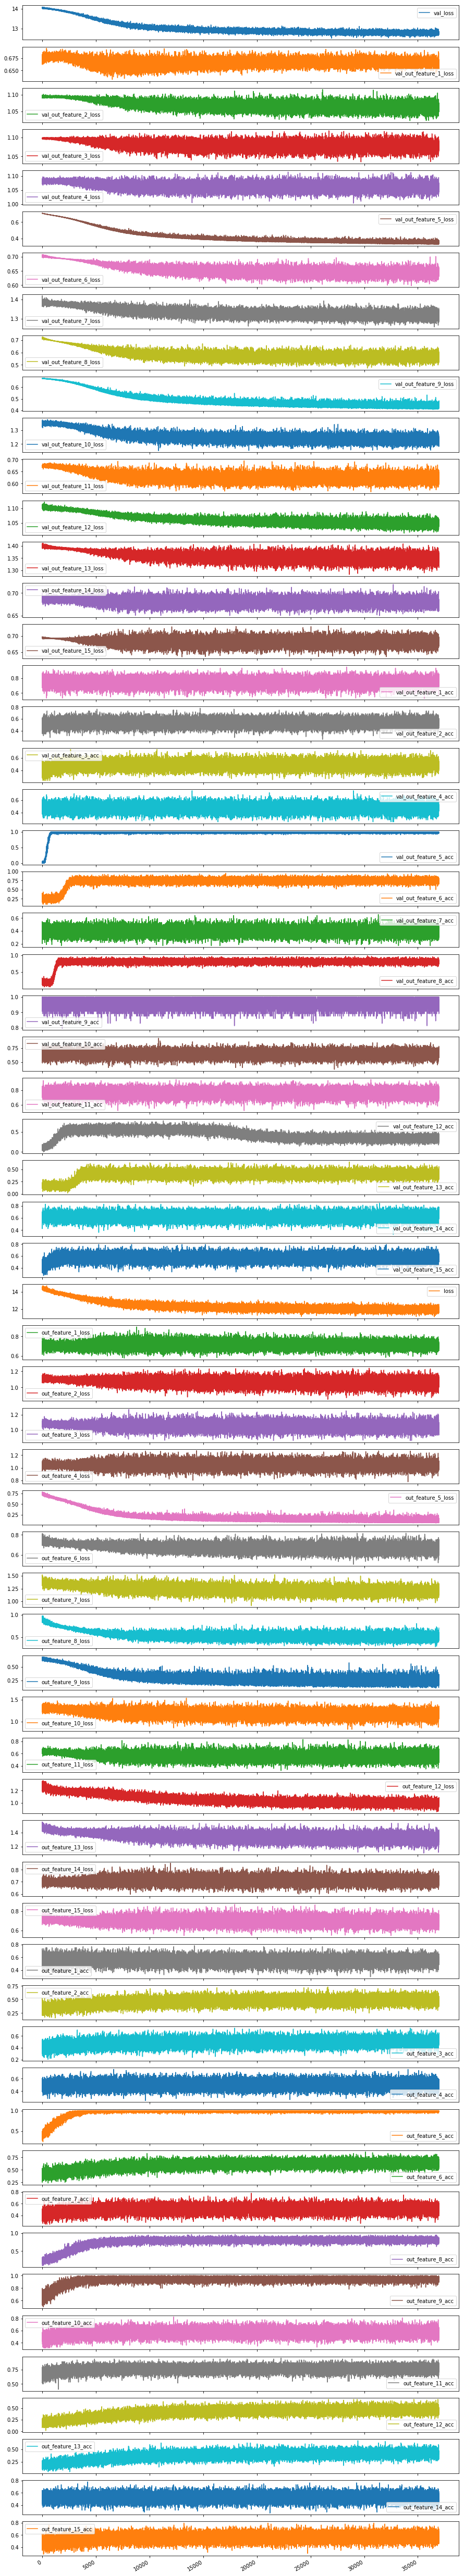

In [26]:
df_hist = pd.DataFrame(hist.history)
df_hist.plot(subplots=True, figsize=(15,100))
print(df_hist['val_loss'].min())
df_hist[df_hist['val_loss']<9.75]

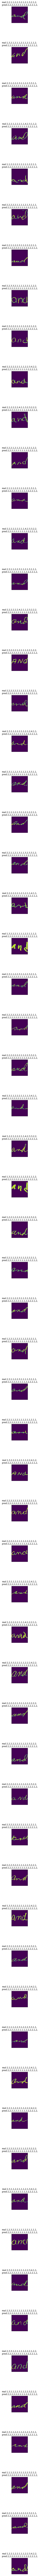

In [27]:
# human_features.load_weights('human_features_weights_v2.h5')
human_features.load_weights('weights/15-Multitask-LargeKernelTrainableEncoder-unseen.h5')
vx,vo=next(vg)
# print(len(vo))
fig = plt.figure(figsize=(80,200))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=1.51, wspace=0.05)
for i in range(64):
#     print(i, '\nPredicted:')
    
    real=''
    for f in range(15):
#         print(vo[i][f])
        real+=str(np.argmax(vo[f][i])+1)+','
    
    f_probs = human_features.predict(np.expand_dims(vx[i],0))
#     print(f_probs)
    pred=''
    for prob in f_probs:
#         print(prob)
        pred+=str(np.argmax(prob[0])+1)+','
    
    ax = fig.add_subplot(64, 1, i + 1, xticks=[], yticks=[])
    ax.imshow(vx[i].reshape((64,64)))
    ax.set_title('real:'+real+'\n pred:'+pred)
#     print('\n----------')
#     print('True:')
#     for op in o:
#         print(np.argmax(op[i]),end=',')
        
#     print('\n++++++',i,'++++++')

In [28]:
# print(df_hist.columns)
for i in range(1,16):
    print(df_hist['val_out_feature_{0}_acc'.format(i)].max())
# print(np.mean([df_hist['val_out_feature_1_acc'].max(), df_hist['val_out_feature_2_acc'].max(),
#        df_hist['val_out_feature_3_acc'].max(), df_hist['val_out_feature_4_acc'].max(),
#        df_hist['val_out_feature_5_acc'].max(), df_hist['val_out_feature_6_acc'].max(),
#        df_hist['val_out_feature_7_acc'].max(), df_hist['val_out_feature_8_acc'].max()]))
# df_hist[df_hist['val_acc']>10.2]

0.953125
0.78125
0.734375
0.75
1.0
0.953125
0.65625
0.984375
1.0
0.921875
0.953125
0.78125
0.65625
0.84375
0.796875


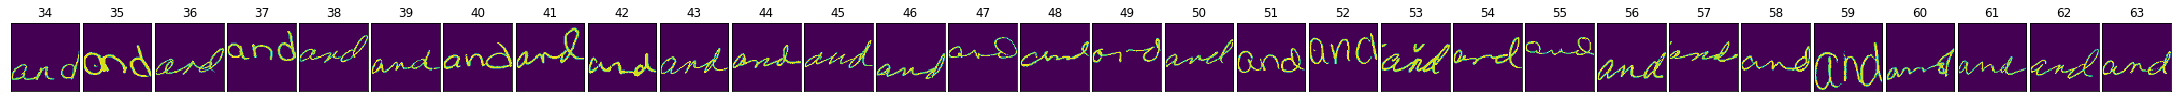

In [29]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(30):
    ax = fig.add_subplot(1, 30, i + 1, xticks=[], yticks=[])
    ax.imshow(inputs[64-30:64][i].reshape((64,64)))
    ax.set_title(i+34)

In [30]:
# plt.imshow(inputs[10].reshape((64,64)))
# plt.subplots_adjust(hspace = 0.1)
# for i in range(1,9):
#     visualize_model = Model(human_features.input, human_features.get_layer('dense_layer_'+str(i)).output)
#     vis_out = visualize_model.predict(np.expand_dims(inputs[10],0))[0]
#     vis_out = np.rollaxis(a=vis_out, start=0, axis=2)
#     f,ax = plt.subplots(8,8)
#     f.subplots_adjust(hspace = .00, wspace=.02, top=0.95)
#     f.set_size_inches(15,15)
#     f.suptitle('dense_layer_'+str(i), fontsize=15)
# #     f.subplots_adjust(hspace = 0.1)
# #     plt.title('dense_layer_'+str(i))
#     print(vis_out.shape)
#     for r in range(8):
#         for c in range (8):
#             ax[r,c].imshow(vis_out[c+r*8])
#             ax[r,c].axis('off')
#     break

In [31]:
csv_data.var()

pen_pressure      0.241190
letter_spacing    0.481638
size              0.475689
dimension         0.464579
is_lowercase      0.014808
is_continuous     0.222378
slantness         0.866958
tilt              0.152430
entry_stroke_a    0.053592
staff_of_a        0.862689
formation_n       0.176950
staff_of_d        0.409782
exit_stroke_d     1.054210
word_formation    0.245240
constancy         0.239313
dtype: float64

# Evaluation

In [32]:
pred_flat = []
for i in range(1,len(feature_lengths)+1):
    pred_flat.append(human_features.get_layer('flatten_'+str(i)).output)
human_features_eval = Model(inputs=human_features.input, outputs=pred_flat)

In [33]:
test_g = datagen(len(val_images)*5,image_path=val_path,vshift=(-10,10), list_of_writers=val_images)
test_x,test_y = next(test_g)

In [34]:
pred_y=human_features_eval.predict(test_x)

In [35]:
pred_y=np.array(pred_y)

In [36]:
pred_y[:,0,:].shape

(15, 512)

Text(0.5, 1.0, 'Right Input')

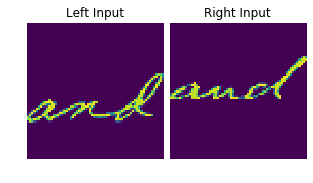

In [37]:
test_im_normal = test_x[0]#255.0-cv2.imread('../Handwriting/cleaned_AND_data_64x64/0301c_num2.png',0)
test_im_shifted = test_x[1]#255.0-cv2.imread('../Handwriting/cleaned_AND_data_64x64/0301c_num1.png',0)
f,ax = plt.subplots(1,2)
f.subplots_adjust(hspace = .00, wspace=.05)
f.set_size_inches(5,1*3)
ax[0].imshow(test_im_normal.reshape((64,64)))
ax[0].axis('off')

ax[1].imshow(test_im_shifted.reshape((64,64)))
ax[1].axis('off')
ax[0].set_title('Left Input')
ax[1].set_title('Right Input')

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm_notebook

In [39]:
l = pred_y[:,0,:]
r = pred_y[:,1,:]

0.994034

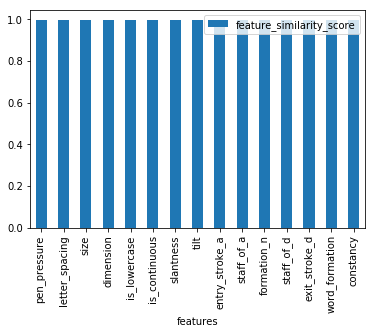

In [40]:
features = csv_data.keys()[1:]
feature_similarity_score=cosine_similarity(l,r).diagonal()
df_feat_sim_score = pd.DataFrame(columns=['features','feature_similarity_score'])
df_feat_sim_score['features']=features
df_feat_sim_score['feature_similarity_score']=feature_similarity_score
df_feat_sim_score.plot.bar(x='features')
df_feat_sim_score['feature_similarity_score'].mean()

In [41]:
class_preds = human_features.predict(test_x[:2])

In [42]:
for i in range(len(test_x[:2])):
    for f in range(15):
        print(np.argmax(class_preds[f][i]),end=',')
    print('')

1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,


In [43]:
csv_data.var()

pen_pressure      0.241190
letter_spacing    0.481638
size              0.475689
dimension         0.464579
is_lowercase      0.014808
is_continuous     0.222378
slantness         0.866958
tilt              0.152430
entry_stroke_a    0.053592
staff_of_a        0.862689
formation_n       0.176950
staff_of_d        0.409782
exit_stroke_d     1.054210
word_formation    0.245240
constancy         0.239313
dtype: float64